# Credit Analysis using EDA

## 1 Problem Statement

The case study involves a consumer finance company, which is in the business of providing loans to consumers and earning from interest payments. An important goal of the company is to identify consumers who are likely to repay their loans and those that are likely to default in order to address two business risks:<br>
(i)  risk of business loss by rejecting consumers who are likely to repay loans, and<br>
(ii) risk of financial loss by approving consumers who are likely to default.

The given datasets contain information regarding (i) applicant profiles and payment difficulties, and (ii) information about previous loans.

The goal of EDA is to identify the factors which indicate whether an applicant is likely to repay or default on a loan.

## 2 Approach to Analysis

Analysis is done in the following manner:
1. Inspection, cleaning and analysis of application_data.csv
2. Inspection and cleaning of previous_application.csv followed by merging with application_data.csv and subsequent analysis

## 3 Cleaning & Analysis of application_data.csv

### 3.1 Data Loading & Inspection

In [5]:
# Importing libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Loading data
df1 = pd.read_csv('application_data.csv')
df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [7]:
# Inspecting shape of the data
df1.shape

(307511, 122)

In [8]:
# Checking data types and other meta-data
df1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [9]:
# Calculating descriptive statistics
df1.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

### 3.2 Data Cleaning

#### 3.2.1 Checking and fixing header and footer rows

In [10]:
df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [11]:
df1.tail()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
307506                         NaN                        NaN   
307507                         NaN                        NaN   
307508                         0.0                        1.0   
307509                         0.0                        0.0   
307510                         0.0                        2.0   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
307506                        NaN                         NaN  
307507                        NaN                         NaN  
307508                        0.0                         1.0  
307509                        0.0                         0.0  
307510                        0.0                         1.0  

[5 rows x 122 columns]

No changes to top and bottom rows are required since they have no anomalies.

#### 3.2.2 Fixing missing values

In [12]:
# Checking percentage of missing values in every column
null_per = df1.isnull().sum()/len(df1)*100
null_per.sort_values(ascending=False)

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

In [13]:
# Removing columns with more than 50% missing values 
cols_rem = null_per[null_per>50].index

In [14]:
df1.drop(columns=cols_rem,inplace=True)

In [15]:
# Checking percentage of missing values again
null_per = df1.isnull().sum()/len(df1)*100
null_per.sort_values(ascending=False)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
                                  ...    
NAME_HOUSING_TYPE                0.000000
NAME_FAMILY_STATUS               0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_INCOME_TYPE                 0.000000
SK_ID_CURR                       0.000000
Length: 81, dtype: float64

Missing values in remaining columns are retained because imputation is not necessary for the purpose of this EDA. In case of imputation, numeric variables can be imputed with the median and categorical variables with the mode.

#### 3.2.3 Removing duplicates

Since each row corresponds to one applicant, duplicate rows should be removed to avoid skewing of statistics.

In [16]:
# Checking for duplicate rows
df1[df1.duplicated()]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_2, EXT_SOURCE_3, YEARS_BEGINEXPLUATATION_AVG, FLOORSMAX_AVG, YEARS_BEGINEXPLUATATION_MODE, FLOORSMAX_MODE, YEARS_BEGINEXPLUATATION_MEDI, FLOORSMAX_MEDI, TOTALAREA_MODE, EMERGENCYSTATE_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_7, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_10, FLAG_DOCUMENT_11, FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, FLAG_DOCUMENT_16, FLAG_DOCUMENT_17, FLAG_DOCUMENT_18, FLAG_DOCUMENT_19, FLAG_DOCUMENT_20, FLAG_DOCUMENT_21, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR]
Index: []

[0 rows x 81 columns]

There are no duplicate rows and no action is required.

#### 3.2.4 Validating and standardising data

In [17]:
# Printing descriptive statistics of all numeric columns to identify invalid data
des = df1.describe()
cols = des.columns

for x in cols:
    print(des[x],end='\n\n')

count    307511.000000
mean     278180.518577
std      102790.175348
min      100002.000000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      456255.000000
Name: SK_ID_CURR, dtype: float64

count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05


In [18]:
# Descriptive statistics show that columns starting with DAYS have negative values
# Fixing negatives by converting to absolute value
negs = [x for x in cols if x.startswith('DAYS')]
for x in negs:
    df1[x] = df1[x].abs()

df1[negs]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0             9461            637             3648.0             2120   
1            16765           1188             1186.0              291   
2            19046            225             4260.0             2531   
3            19005           3039             9833.0             2437   
4            19932           3038             4311.0             3458   
...            ...            ...                ...              ...   
307506        9327            236             8456.0             1982   
307507       20775         365243             4388.0             4090   
307508       14966           7921             6737.0             5150   
307509       11961           4786             2562.0              931   
307510       16856           1262             5128.0              410   

        DAYS_LAST_PHONE_CHANGE  
0                       1134.0  
1                        828.0  
2                        815.0  
3                        617.0  
4                       1106.0  
...                        ...  
307506                   273.0  
307507                     0.0  
307508                  1909.0  
307509                   322.0  
307510                   787.0  

[307511 rows x 5 columns]

Thus, negative values are successfully fixed.

In [19]:
# Descriptive statistics show that DAYS_EMPLOYED has a maximum value of 365243 (about 1000 years), which is absurd

# Checking rows in which DAYS_EMPLOYED > max(DAYS_BIRTH)
df1[df1['DAYS_EMPLOYED']>df1['DAYS_BIRTH'].max()][['DAYS_EMPLOYED','DAYS_BIRTH']]

DAYS_EMPLOYED  DAYS_BIRTH
8              365243       20099
11             365243       20417
23             365243       24827
38             365243       23920
43             365243       23548
...               ...         ...
307469         365243       22414
307483         365243       24911
307487         365243       23125
307505         365243       24384
307507         365243       20775

[55374 rows x 2 columns]

In [20]:
# Analysis shows that the absurd values are probably placeholders for unemployed people. Imputing NaN where DAYS_EMPLOYED = 365243
df1['DAYS_EMPLOYED'].replace(365243,np.NaN,inplace=True)

In [21]:
# Checking rows in which DAYS_EMPLOYED > max(DAYS_BIRTH) again
df1[df1['DAYS_EMPLOYED']>df1['DAYS_BIRTH'].max()][['DAYS_EMPLOYED','DAYS_BIRTH']]

Empty DataFrame
Columns: [DAYS_EMPLOYED, DAYS_BIRTH]
Index: []

Thus, missing valus in the DAYS_EMPLOYED column are successfully imputed.

In [22]:
# Printing unique values of all categorical columns to identify invalid data
cat_cols = df1.columns.difference(cols)
cat_cols

Index(['CODE_GENDER', 'EMERGENCYSTATE_MODE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE',
       'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'WEEKDAY_APPR_PROCESS_START'],
      dtype='object')

In [23]:
for x in cat_cols:
    print(df1[x].value_counts(),end='\n\n')

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          112

In [24]:
# Dropping rows in which CODE_GENDER is XNA or NAME_FAMILY_STATUS is Unknown because number of observations are small
df1 = df1[~((df1['CODE_GENDER']=='XNA') | (df1['NAME_FAMILY_STATUS']=='Unknown'))]
df1.shape

(307505, 81)

In [25]:
# Imputing 'Unknown' to 'XNA' entries in ORGANIZATION_TYPE
df1['ORGANIZATION_TYPE'].replace('XNA','Unknown',inplace=True)
df1['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
Unknown                   55374
Self-employed             38412
Other                     16683
Medicine                  11192
Business Entity Type 2    10552
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6879
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3277
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [26]:
# Printing all series in the DataFrame after sorting to identify invalid data
for x in df1.columns:
    print(df1[x].sort_values(),end='\n\n')

0         100002
1         100003
2         100004
3         100006
4         100007
           ...  
307506    456251
307507    456252
307508    456253
307509    456254
307510    456255
Name: SK_ID_CURR, Length: 307505, dtype: int64

153756    0
200745    0
200746    0
200747    0
200748    0
         ..
279526    1
203832    1
25759     1
125545    1
0         1
Name: TARGET, Length: 307505, dtype: int64

0              Cash loans
199752         Cash loans
199753         Cash loans
199754         Cash loans
199755         Cash loans
               ...       
164822    Revolving loans
195100    Revolving loans
129065    Revolving loans
129075    Revolving loans
218733    Revolving loans
Name: NAME_CONTRACT_TYPE, Length: 307505, dtype: object

153756    F
184147    F
184148    F
184149    F
184150    F
         ..
200863    M
200861    M
200860    M
70396     M
0         M
Name: CODE_GENDER, Length: 307505, dtype: object

0         N
184040    N
184041    N
184042    N
184043    N
    

18410     Advertising
126297    Advertising
187816    Advertising
184885    Advertising
212934    Advertising
             ...     
199894        Unknown
199893        Unknown
199886        Unknown
199916        Unknown
153756        Unknown
Name: ORGANIZATION_TYPE, Length: 307505, dtype: object

24022     8.173617e-08
163598    1.315956e-06
186074    5.002109e-06
177315    5.600338e-06
230344    5.939651e-06
              ...     
305775             NaN
306208             NaN
306235             NaN
307029             NaN
307387             NaN
Name: EXT_SOURCE_2, Length: 307505, dtype: float64

101531    0.000527
265092    0.000527
197422    0.000527
103388    0.000527
102949    0.000527
            ...   
307484         NaN
307501         NaN
307504         NaN
307506         NaN
307507         NaN
Name: EXT_SOURCE_3, Length: 307505, dtype: float64

91023     0.0
85188     0.0
234984    0.0
114716    0.0
145875    0.0
         ... 
307497    NaN
307499    NaN
307502    NaN
307503    

In [27]:
# Some variables have unusual values, but these are retained because they are quite possible. Examples include CNT_CHILDREN = 19 and CNT_FAM_MEMBERS = 20

In [28]:
# Imputing 'Unknown' to missing values in OCCUPATION_TYPE
df1['OCCUPATION_TYPE'].replace(np.NaN,'Unknown',inplace=True)
df1['OCCUPATION_TYPE'].value_counts()

Unknown                  96389
Laborers                 55186
Sales staff              32102
Core staff               27569
Managers                 21370
Drivers                  18603
High skill tech staff    11380
Accountants               9812
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2092
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

#### 3.2.5 Binning of continuous variables

The continuous variables AMT_INCOME_TOTAL, DAYS_BIRTH and DAYS_EMPLOYED are grouped into categorical bins for simpler analysis.

In [29]:
for (x,y) in zip(['INCOME_GROUP','AGE_GROUP','EMPLOYMENT_EXPERIENCE'],['AMT_INCOME_TOTAL','DAYS_BIRTH','DAYS_EMPLOYED']):
    df1[x] = pd.qcut(df1[y],q=5,labels=['Very Low','Low','Moderate','High','Very High'])

In [30]:
df1.drop(columns=['AMT_INCOME_TOTAL','DAYS_BIRTH','DAYS_EMPLOYED'],inplace=True)
df1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSM

### 3.3 Data Analysis

#### 3.3.1 Analysis of Outliers

In [31]:
# Listing numerical variables that can have an impact on TARGET by inspection
num_vars = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_CHILDREN', 'DEF_30_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'DEF_60_CNT_SOCIAL_CIRCLE', 'CNT_FAM_MEMBERS', 'AMT_CREDIT', 'EXT_SOURCE_3', 'REGION_POPULATION_RELATIVE', 'EXT_SOURCE_2']
len(num_vars)

11

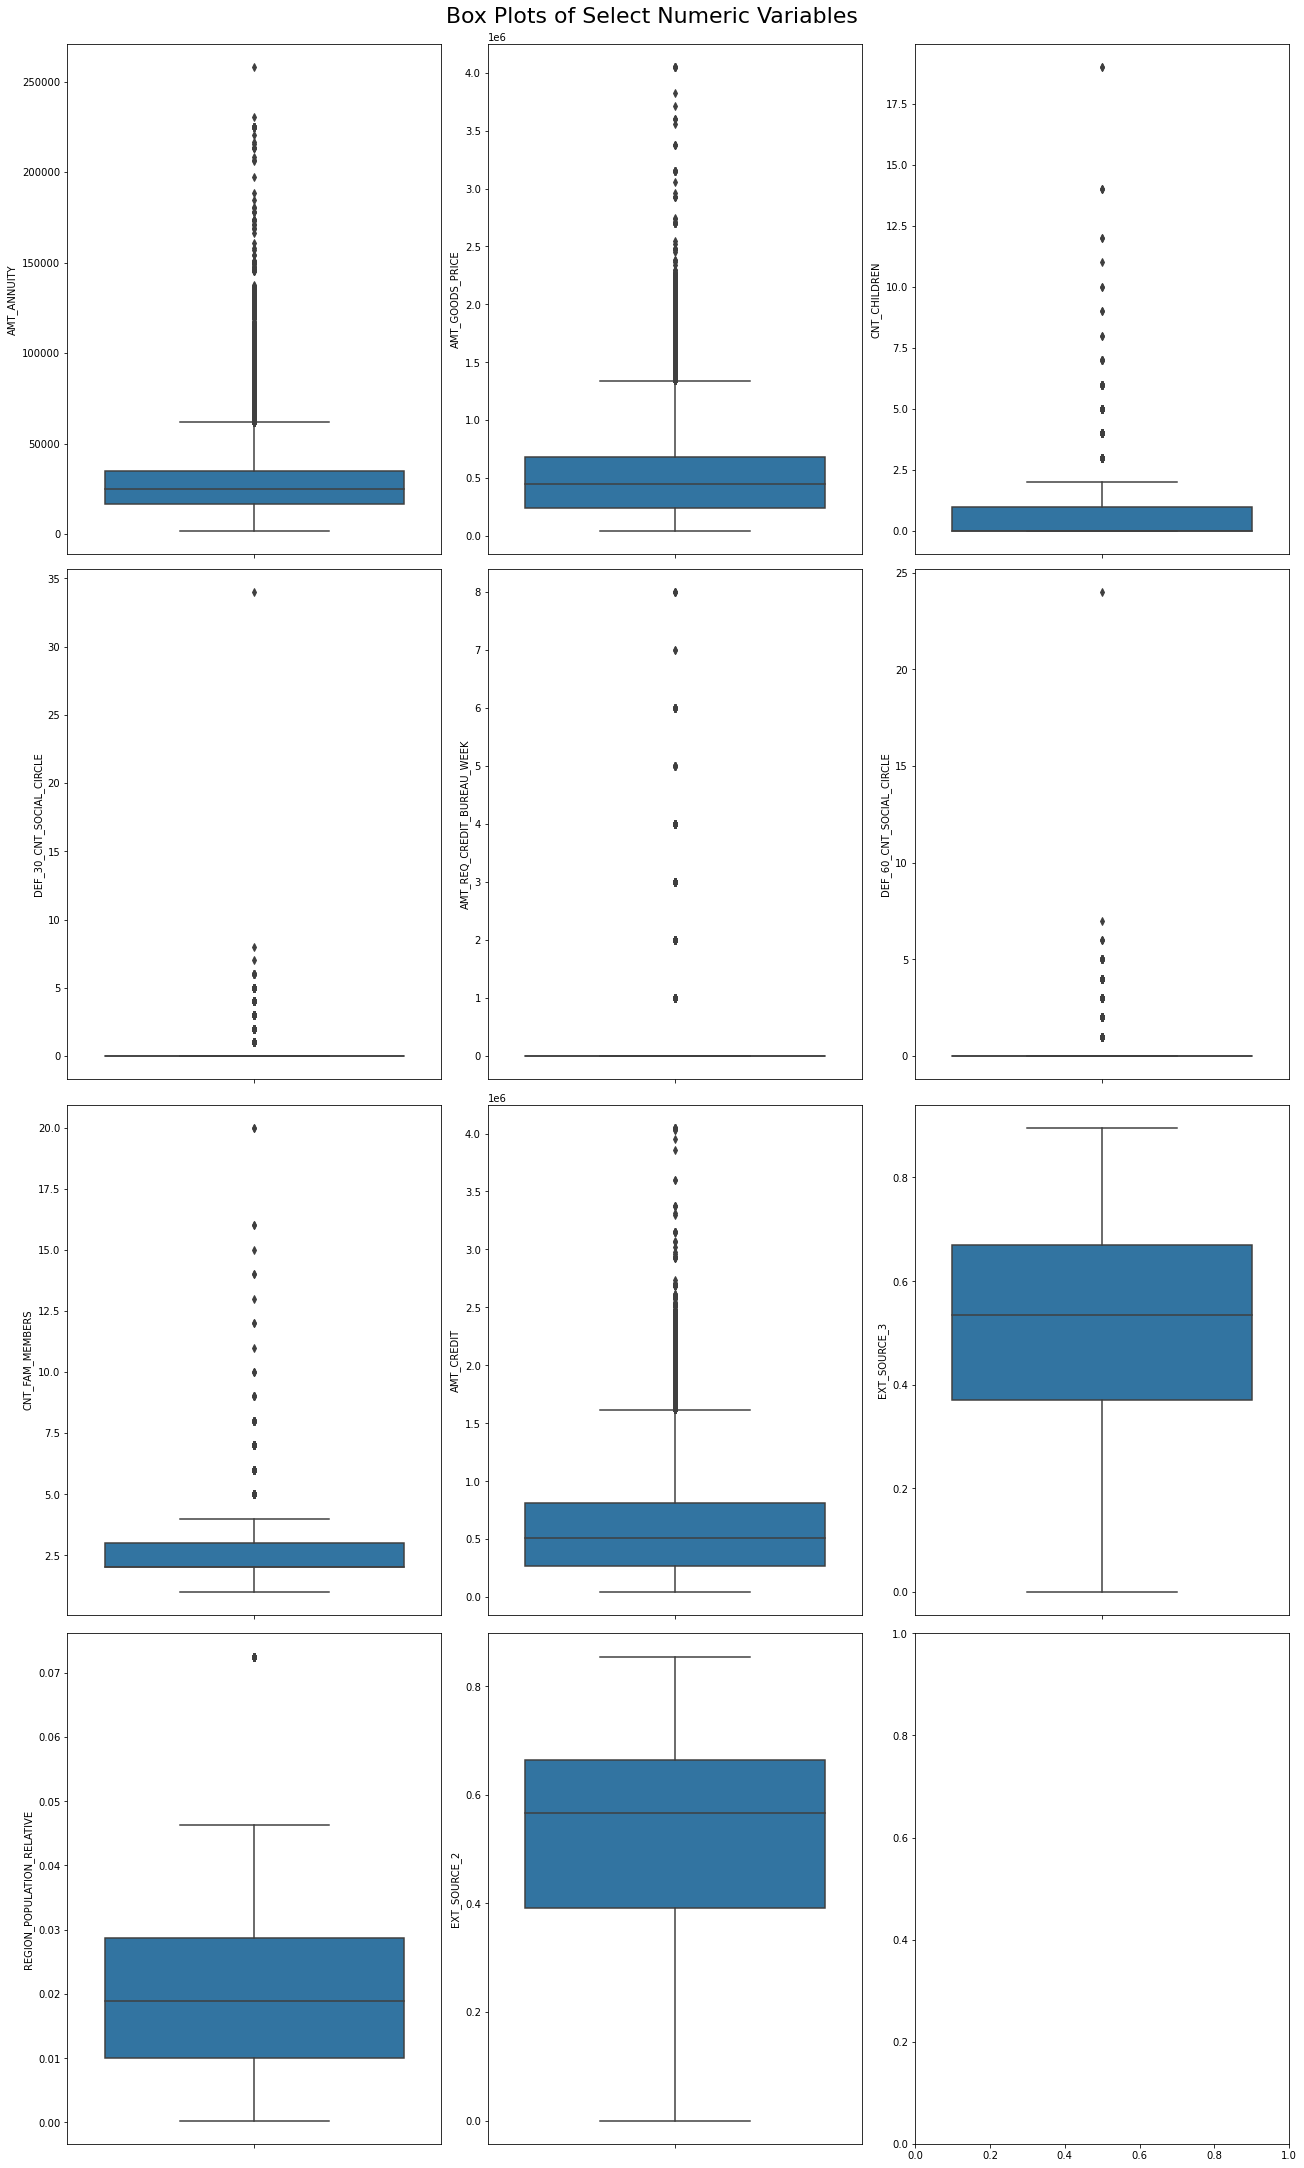

In [32]:
# Plotting box plots for the above numerical variables
fig, axs = plt.subplots(4,3,figsize=[18,30],constrained_layout=True)
for i in range(len(num_vars)):
    sns.boxplot(y=df1[num_vars[i]],ax=axs[i//3,i%3])
fig.suptitle('Box Plots of Select Numeric Variables',fontsize=22)
fig.show()

As seen above, multiple variables have outliers, some of which are elaborated below:
1. AMT_ANNUITY has its upper whisker around 65,000, but a number of higher values uptil 250,000 which are clearly outliers. The higher values likely correspond to high value loans with high annuity payments.
2. AMT_GOODS_PRICE has its upper whisker around 1,500,000 but there are a number of higher values even beyond 4,000,000 which are clearly outliers. The outliers likely correspond to big ticket purchases by high income individuals.
3. Most applicants have less than 2.5 children (CNT_CHILDREN), but there are outliers all the way up to 17.5. Although high, the outliers are possible and sometimes seen in rural areas or joint families.
4. DEF_30_CNT_SOCIAL_CIRCLE stands for the number of defaulters in the client's social circle defaulted on 30 DPD. Most applicants have no defaulters in their social circles, but the number goes as high as 35 in some cases. These individuals may be at risk of default.
5. AMT_CREDIT has its upper whisker around 1,500,000, but there are a number of higher values even beyond 4,000,000 which are clearly outliers. The higher values likely correspond to loans for big ticket purchases.

The outliers can be addressed in the following ways:
1. Removal
2. Retention
3. Imputation (capping with a maximum or imputing with another value)

Outliers are retained without changes in this analysis because the values are plausible.

#### 3.3.2 Analysis of the variable TARGET and segmentation

In [33]:
# Checking percentage of clients with and without payment difficulties
imbalance = round(df1['TARGET'].value_counts(normalize=True)*100,2)
imbalance

0    91.93
1     8.07
Name: TARGET, dtype: float64

In [34]:
# Calculating percentage of imbalance
round(imbalance[1]/imbalance[0]*100,2)

8.78

As per the above calculations, 8.07% of clients have payment difficulties while 91.93% do not. The percentage of imbalance is 8.78%.

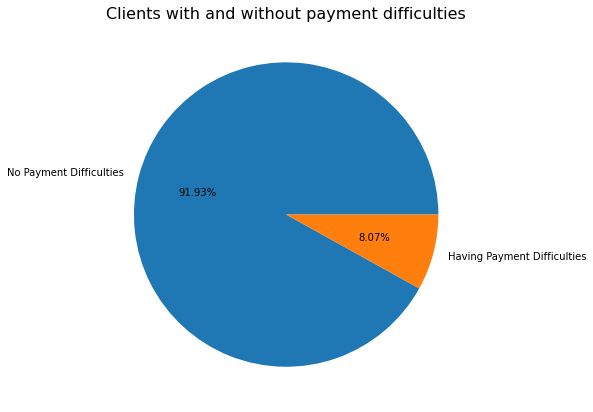

In [35]:
# Plotting a pie chart of the percentage of clients with and without payment difficulties
fig,ax = plt.subplots(figsize=[7,7])
ax.pie(imbalance,labels=['No Payment Difficulties','Having Payment Difficulties'],autopct=lambda x: str(round(x,2))+'%')
ax.set_title('Clients with and without payment difficulties',fontsize=16)
fig.show()

In [36]:
# Segmenting dataset df1 into two datasets, one for each value of TARGET
target1 = df1[df1['TARGET']==1]
target0 = df1[df1['TARGET']==0]

In [37]:
# Verifying the segments
print(target1['TARGET'].value_counts())
print(target0['TARGET'].value_counts())

1    24825
Name: TARGET, dtype: int64
0    282680
Name: TARGET, dtype: int64


#### 3.3.3 Univariate Analysis of Select Categorical Variables

In [38]:
# Listing categorical variables that can have an impact on TARGET by inspection
cat_vars = ['INCOME_GROUP','AGE_GROUP','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE']

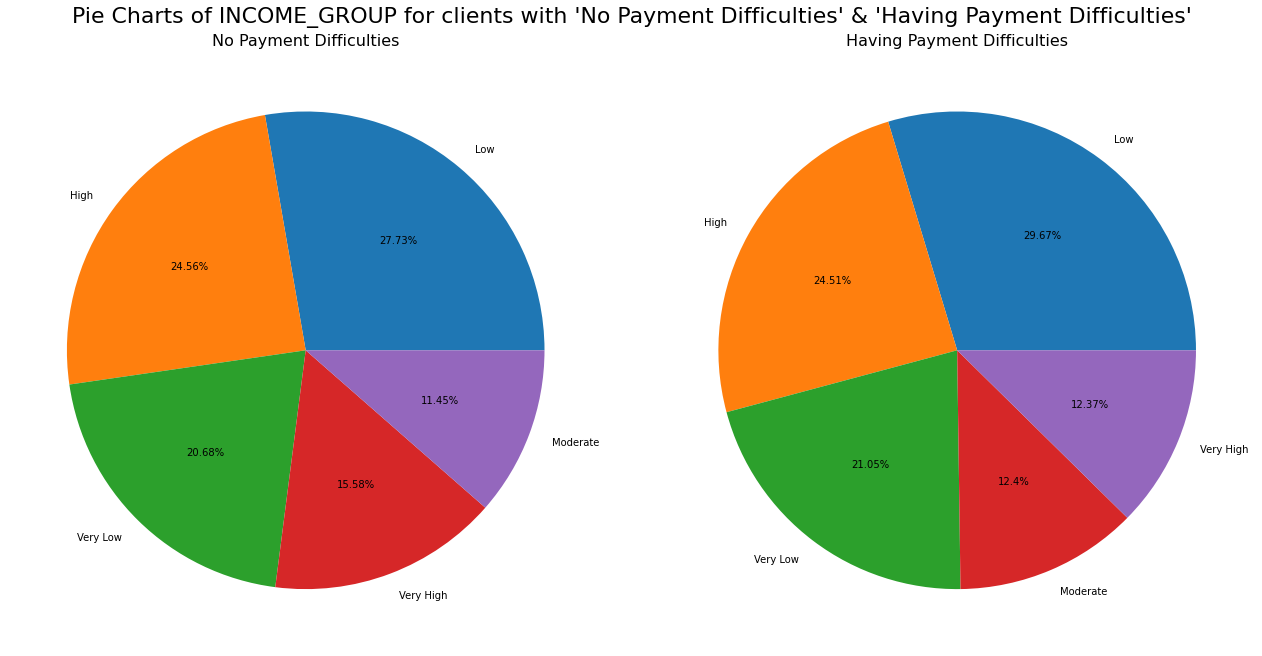

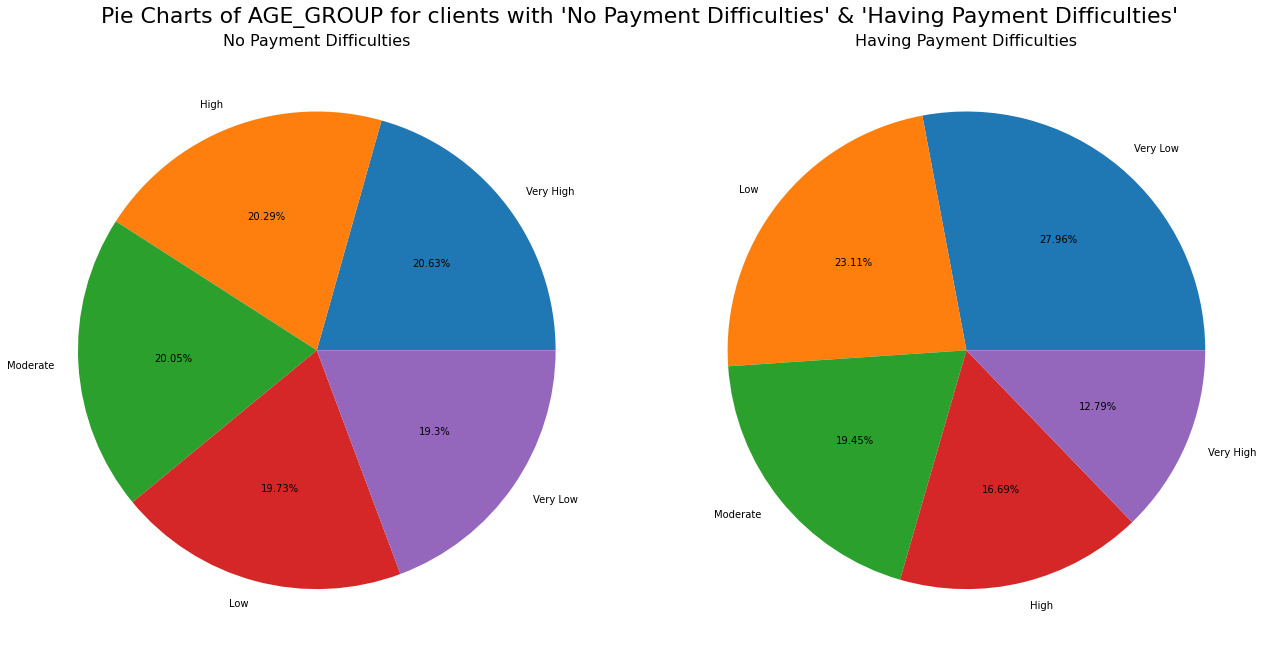

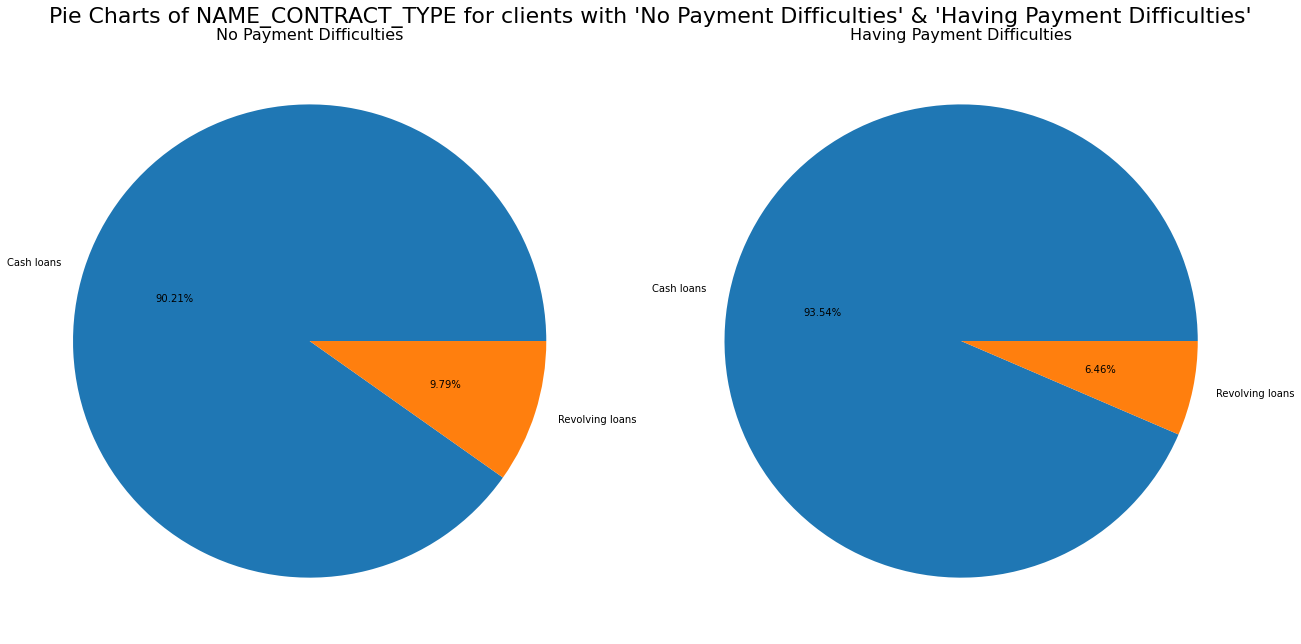

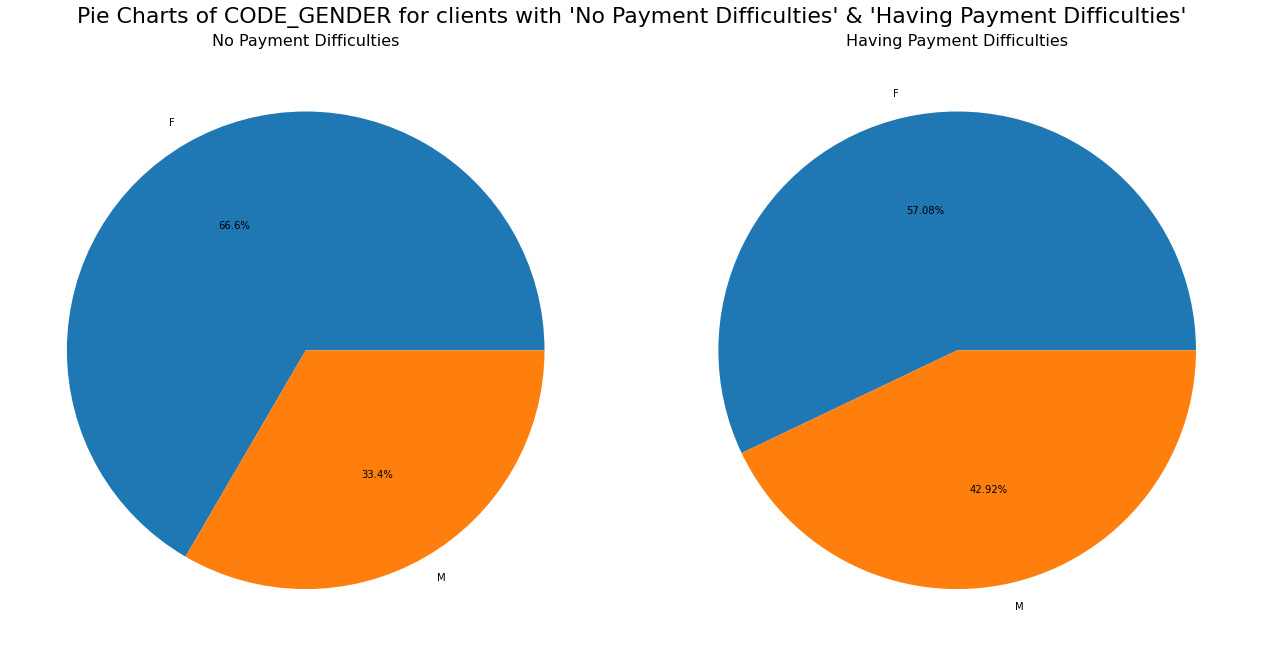

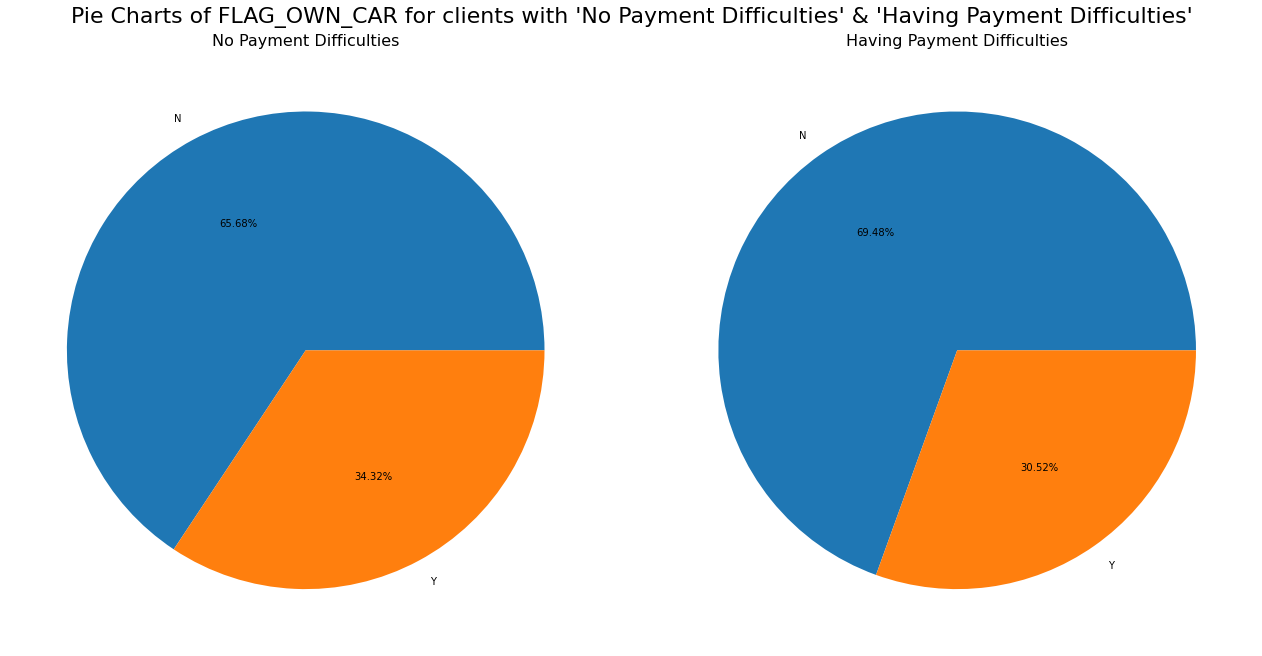

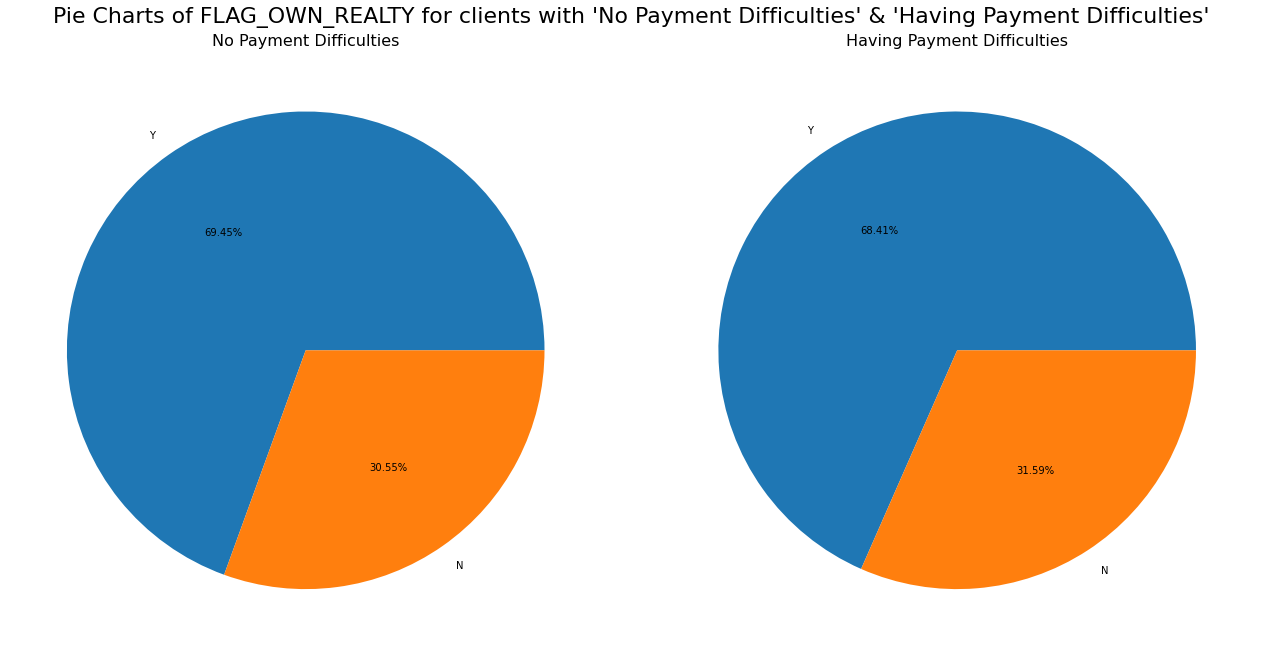

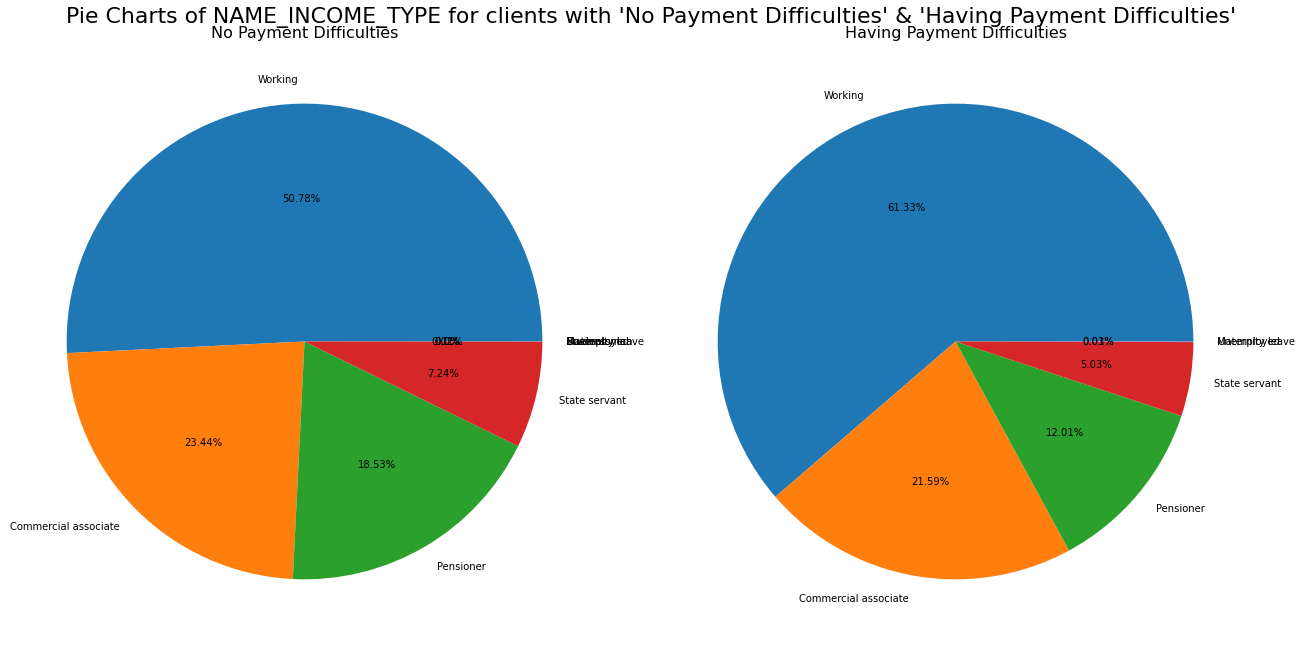

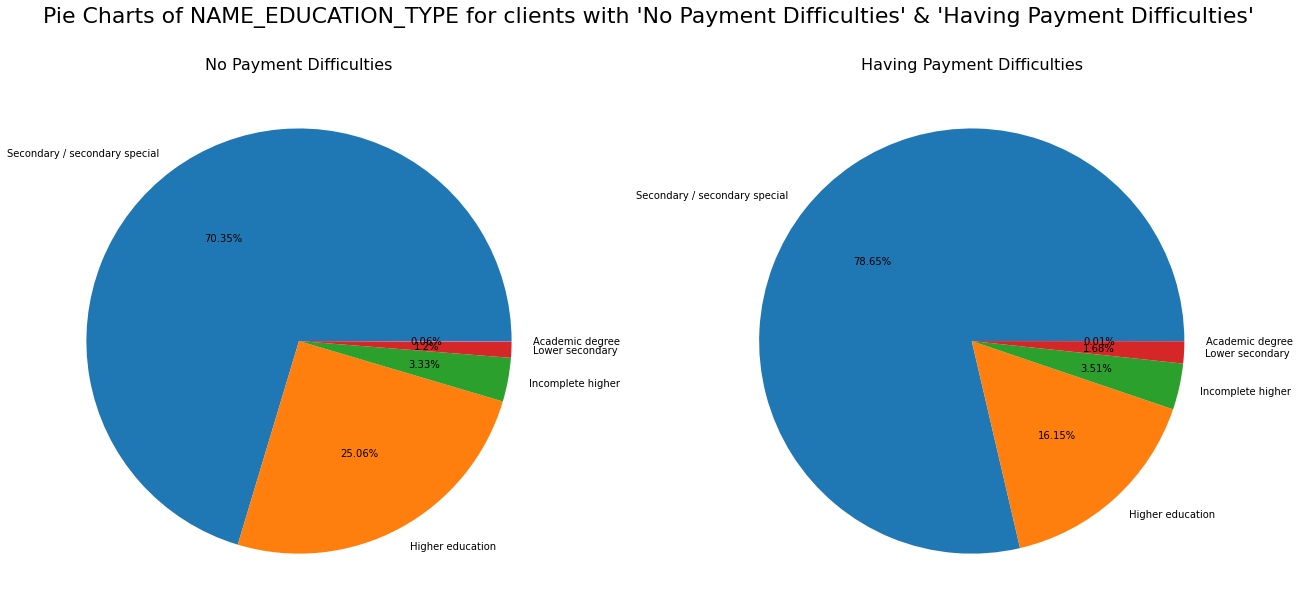

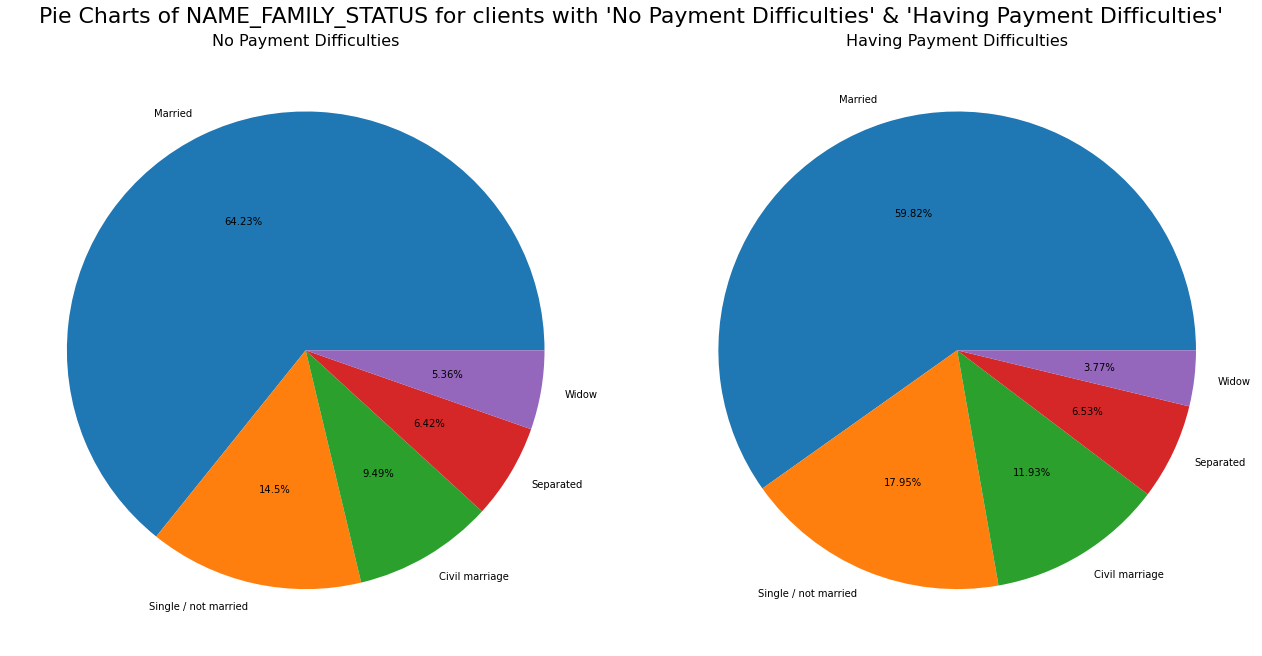

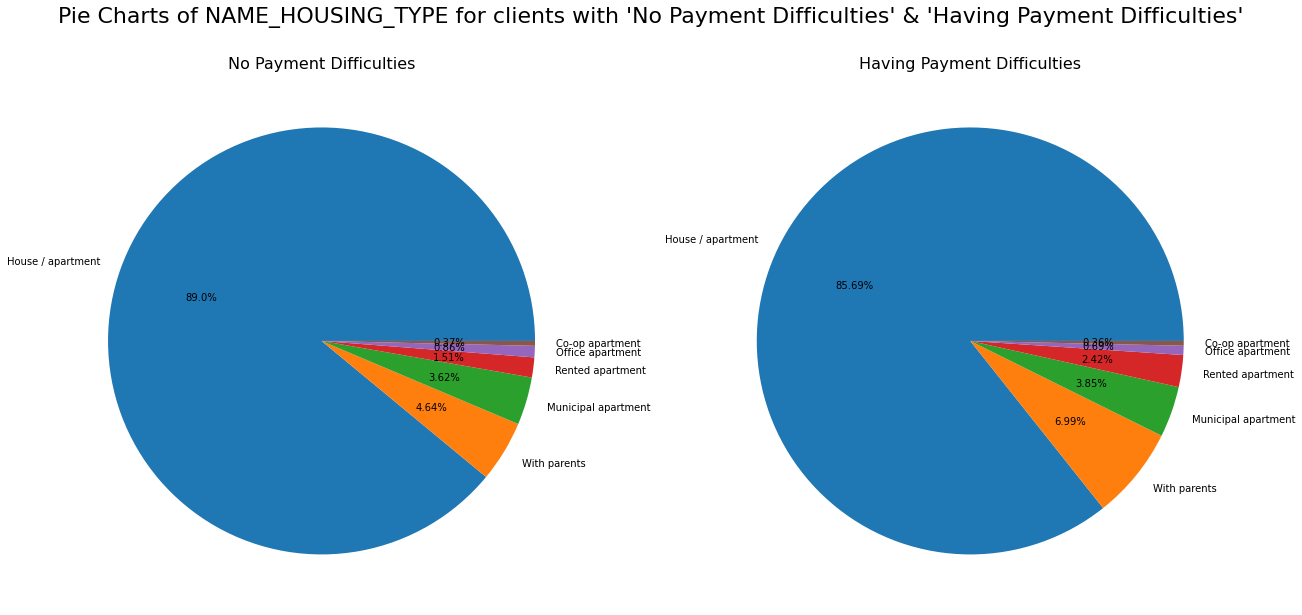

In [39]:
# Creating pie charts for the above categorical variables except the last two
for x in cat_vars[:-2]:    
    fig,axs = plt.subplots(1,2,figsize=[18,9],constrained_layout=True)
    fig.suptitle('Pie Charts of '+x+' for clients with \'No Payment Difficulties\' & \'Having Payment Difficulties\'',fontsize=22)
    
    t0 = target0[x].value_counts(normalize=True)*100
    axs[0].pie(t0.values,labels=t0.index,autopct=lambda x: str(round(x,2))+'%')
    axs[0].set_title('No Payment Difficulties',fontsize=16)
    
    t1 = target1[x].value_counts(normalize=True)*100
    axs[1].pie(t1.values,labels=t1.index,autopct=lambda x: str(round(x,2))+'%')
    axs[1].set_title('Having Payment Difficulties',fontsize=16)
    
    fig.show()

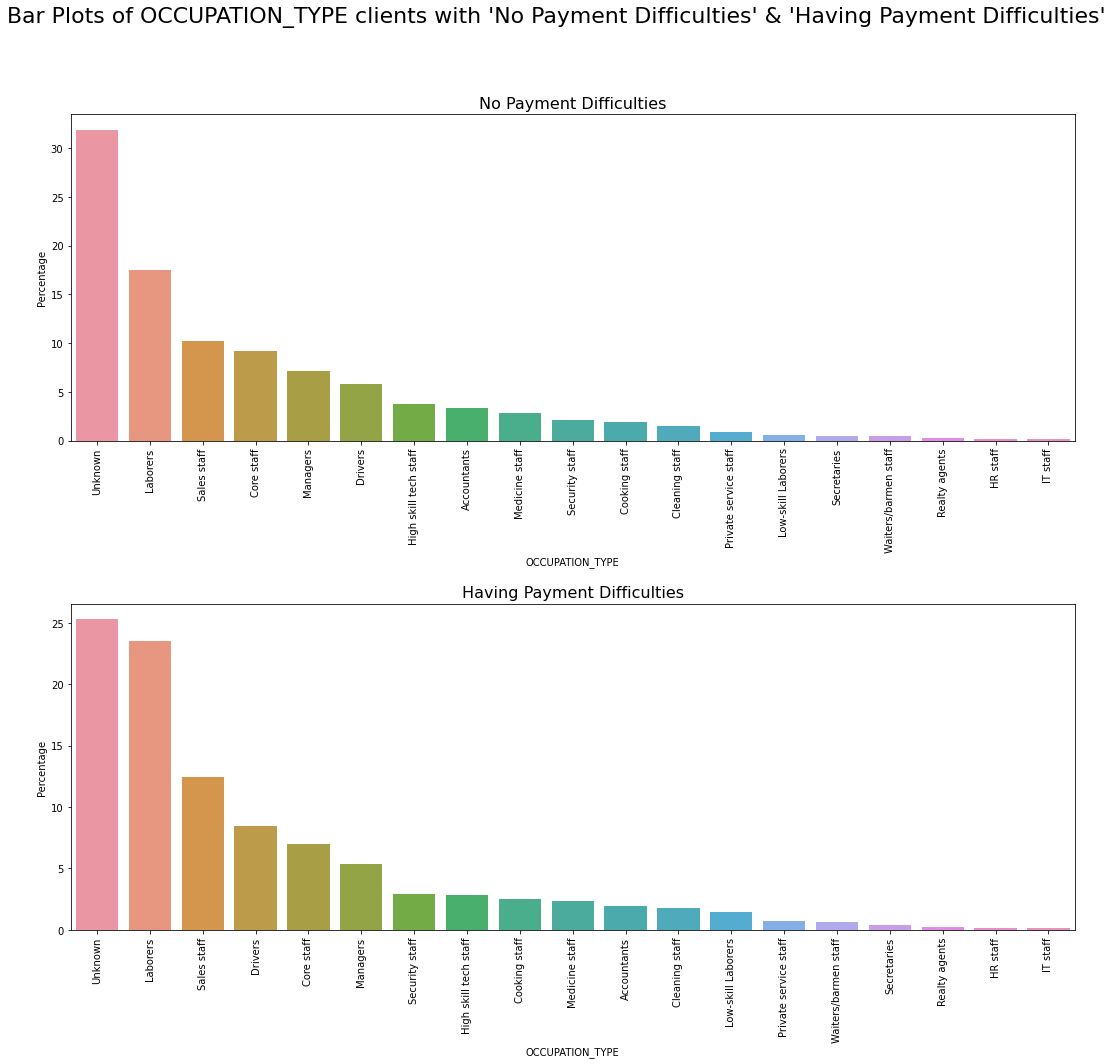

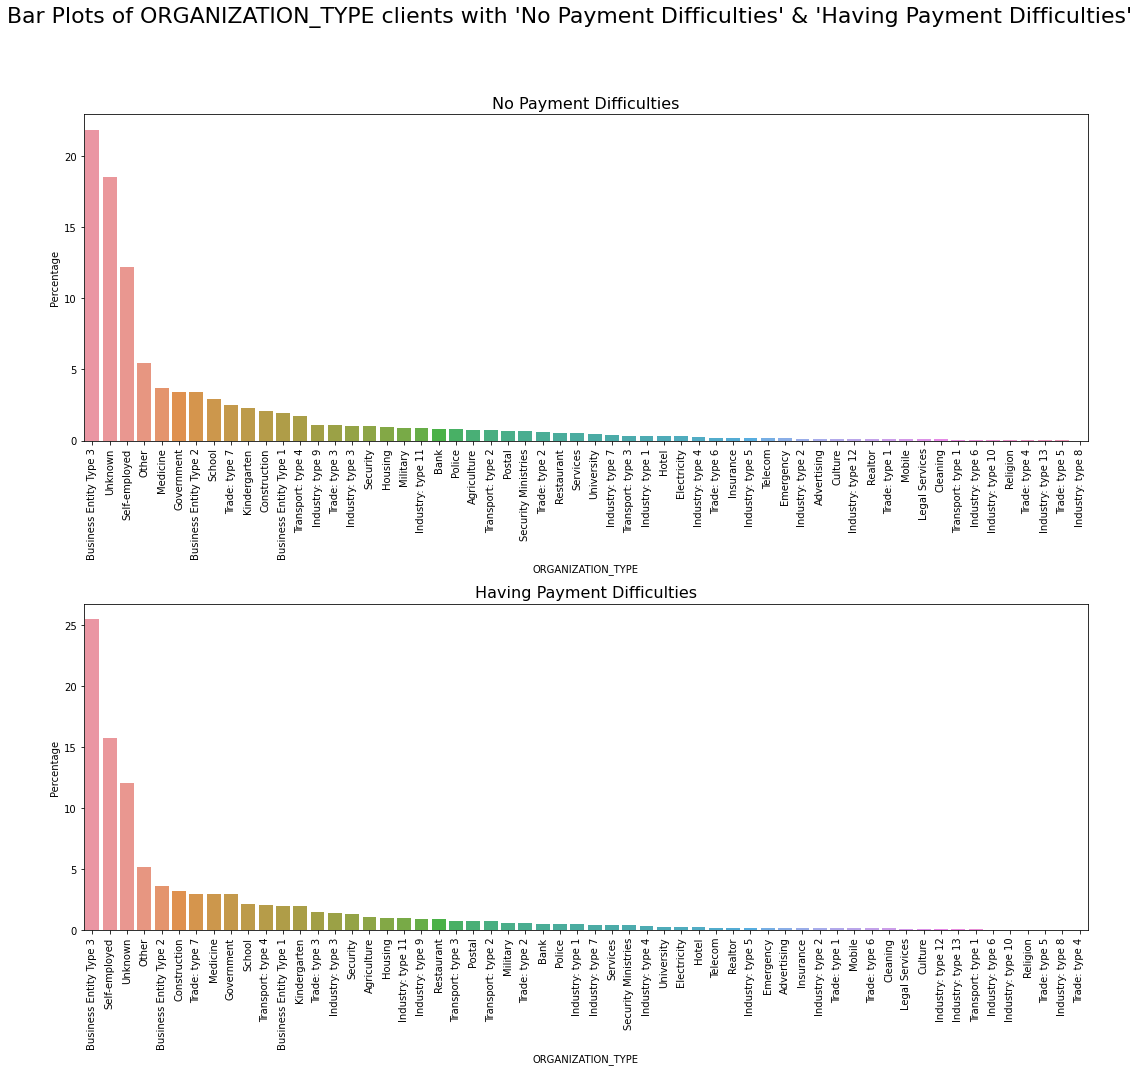

In [40]:
# Creating bar charts for the last two categorical variables
for x in cat_vars[-2:]:    
    fig,axs = plt.subplots(2,1,figsize=[18,15],constrained_layout=True)
    fig.suptitle('Bar Plots of '+x+' clients with \'No Payment Difficulties\' & \'Having Payment Difficulties\'',fontsize=22)
    
    t0 = target0[x].value_counts(normalize=True)*100
    sns.barplot(t0.index,t0.values,ax=axs[0])
    axs[0].set_xlabel(x)
    axs[0].set_ylabel('Percentage')
    axs[0].set_title('No Payment Difficulties',fontsize=16)
    axs[0].set_xticklabels(t0.index,rotation=90.0)

    t1 = target1[x].value_counts(normalize=True)*100
    sns.barplot(t1.index,t1.values,ax=axs[1])
    axs[1].set_xlabel(x)
    axs[1].set_ylabel('Percentage')
    axs[1].set_title('Having Payment Difficulties',fontsize=16)
    axs[1].set_xticklabels(t1.index,rotation=90.0)
    
    fig.subplots_adjust(hspace=0.5)
    fig.show()

__Insights__

1. For the variable INCOME_GROUP, the percentage of 'Very Low', 'Low' and 'Moderate' income clients is slightly higher in the category 'Having Payment Difficulties', compared to the category 'No Payment Difficulties'.
2. For the variable AGE_GROUP, the percentage of 'Very Low' and 'Low' age group clients is quite high in the category 'Having Payment Difficulties', accounting for 51.07% of clients, compared to the category 'No Payment Difficulties' in which they account for 39.03% of clients.
3. For the variable NAME_CONTRACT_TYPE, the percentage of 'Cash Loans' is higher in the category 'Having Payment Difficulties', compared to the category 'No Payment Difficulties'.
4. For the variable CODE_GENDER, the percentage of males (M) is higher in the category 'Having Payment Difficulties', compared to the category 'No Payment Difficulties' and the percentage of females (F) is lower.
5. For the variable FLAG_OWN_CAR, the percentage of clients not owing cars (N) is higher in the category 'Having Payment Difficulties', compared to the category 'No Payment Difficulties'. Thus, clients who have payment difficulties are less likely to own cars.
6. For the variable FLAG_OWN_REALTY, the percentage of clients not owing realty (N) is slightly higher in the category 'Having Payment Difficulties', compared to the category 'No Payment Difficulties'. Thus, clients who have payment difficulties are less likely to own realty.
7. For the variable NAME_INCOME_TYPE, the percentage of 'Working' is higher and 'Commercial Associate', 'Pensioner' and 'State servant' are lower in the category 'Having Payment Difficulties', compared to the category 'No Payment Difficulties'.
8. For the variable NAME_EDUCATION_TYPE, the percentage of 'Secondary / secondary special' is higher and 'Higher education' and 'Academic degree' are lower in the category 'Having Payment Difficulties', compared to the category 'No Payment Difficulties'. This is as per expectations where clients with higher education have lower payment difficulties.
9. For the variable NAME_FAMILY_STATUS, the percentage of 'Married' is lower and 'Single / not married', 'Civil marriage' and 'Separated' are higher in the category 'Having Payment Difficulties', compared to the category 'No Payment Difficulties'.
10. For the variable NAME_HOUSING_TYPE, the percentage of clients with their own 'House / apartment' is lower and the percentage of 'With parents', 'Municipal apartment' and 'Rented apartment' are higher in the category 'Having Payment Difficulties', compared to the category 'No Payment Difficulties'.
11. For the variable OCCUPATION_TYPE, the percentages of 'Laborers' and 'Sales staff' are higher and 'Managers', 'Accountants', etc. are lower in the category 'Having Payment Difficulties', compared to the category 'No Payment Difficulties'.
12. For the variable ORGANIZATION_TYPE, the percentages of 'Business Entity Type 3', 'Self-employed', etc. are higher and 'Other', 'Medicine', 'Government' etc. are lower in the category 'Having Payment Difficulties', compared to the category 'No Payment Difficulties'.

#### 3.3.4 Univariate Analysis of Select Numeric Variables

In [41]:
# Listing numerical variables that can have an impact on TARGET by inspection
num_vars = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_CHILDREN', 'DEF_30_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'CNT_FAM_MEMBERS', 'AMT_CREDIT', 'EXT_SOURCE_3', 'REGION_POPULATION_RELATIVE', 'EXT_SOURCE_2']

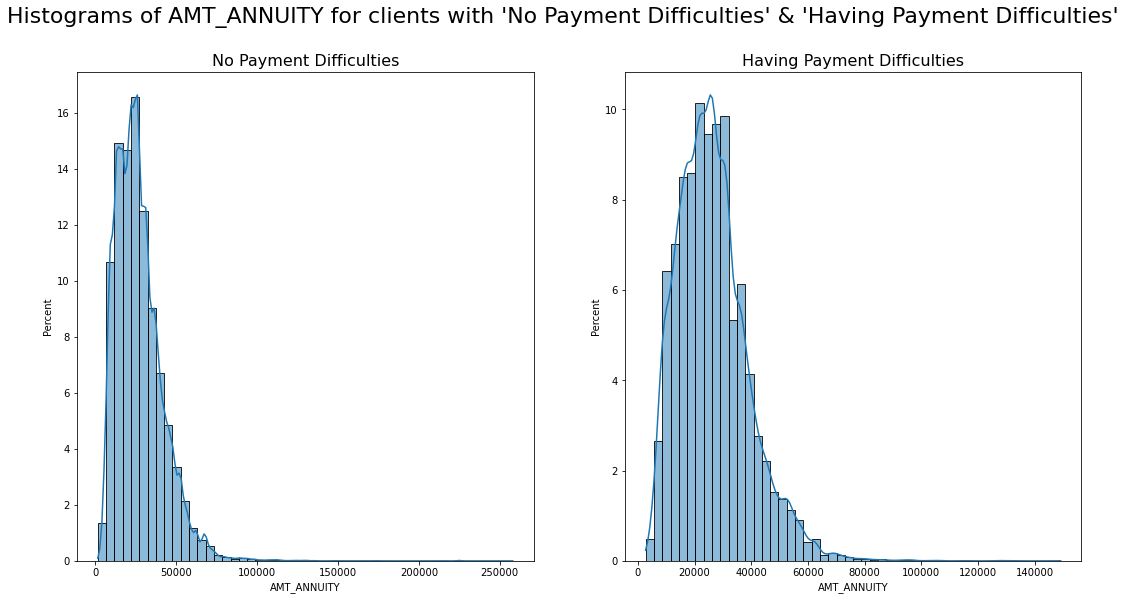

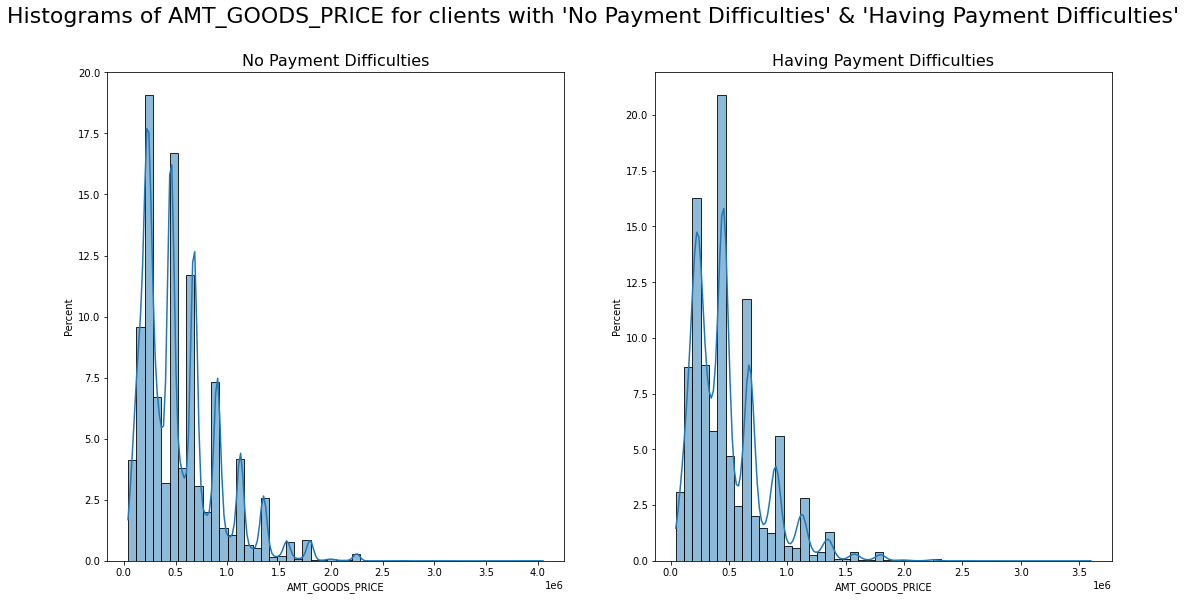

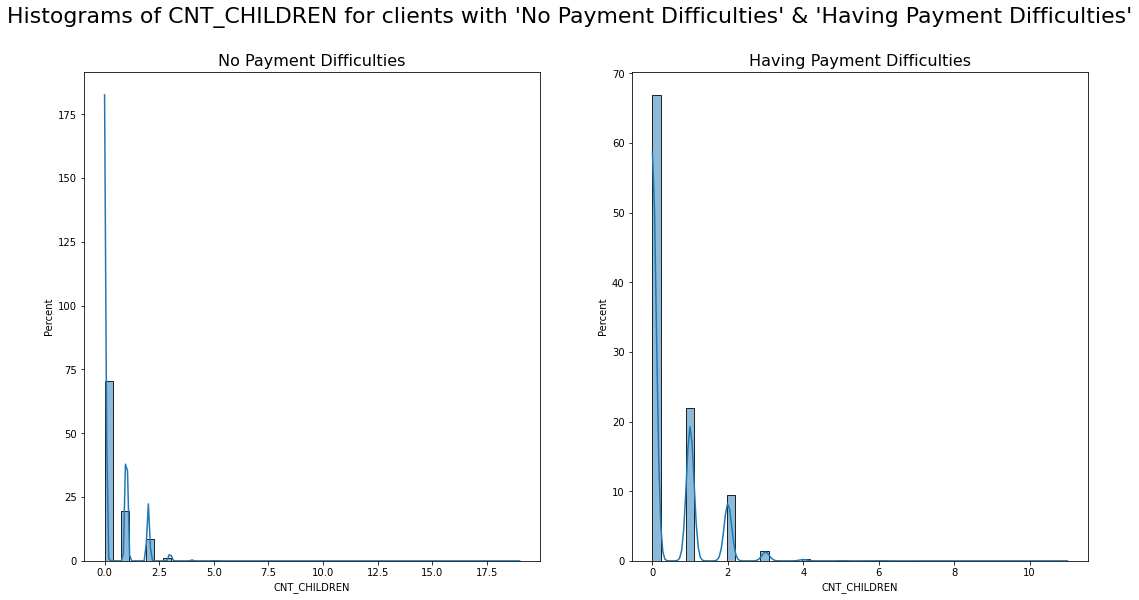

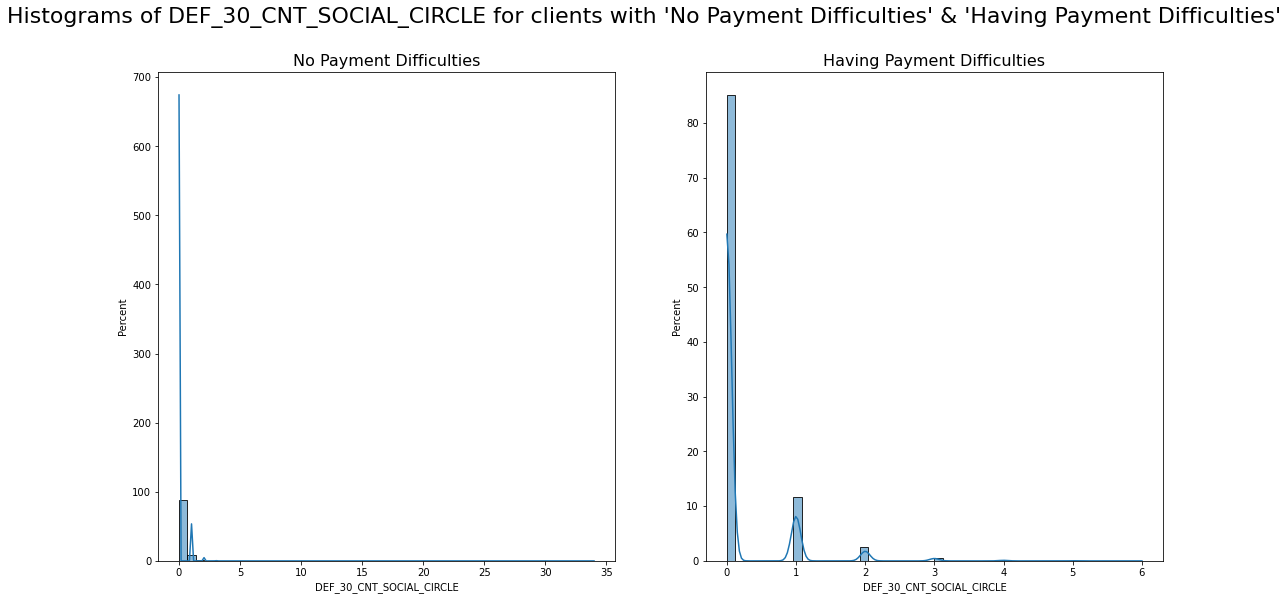

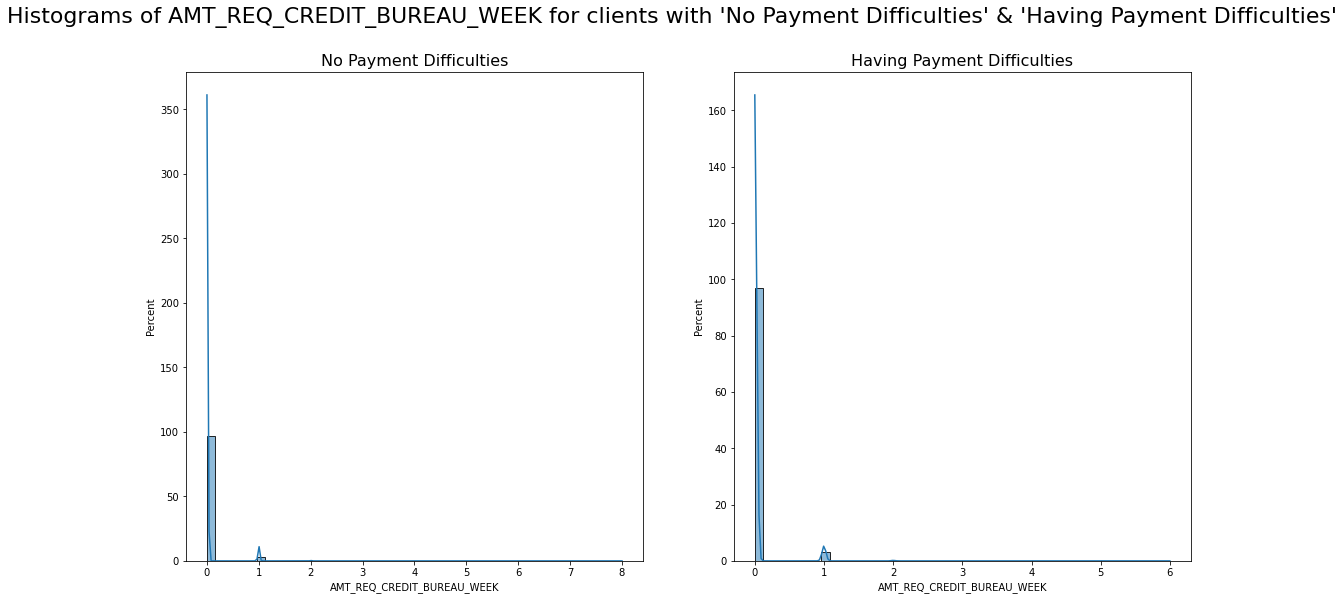

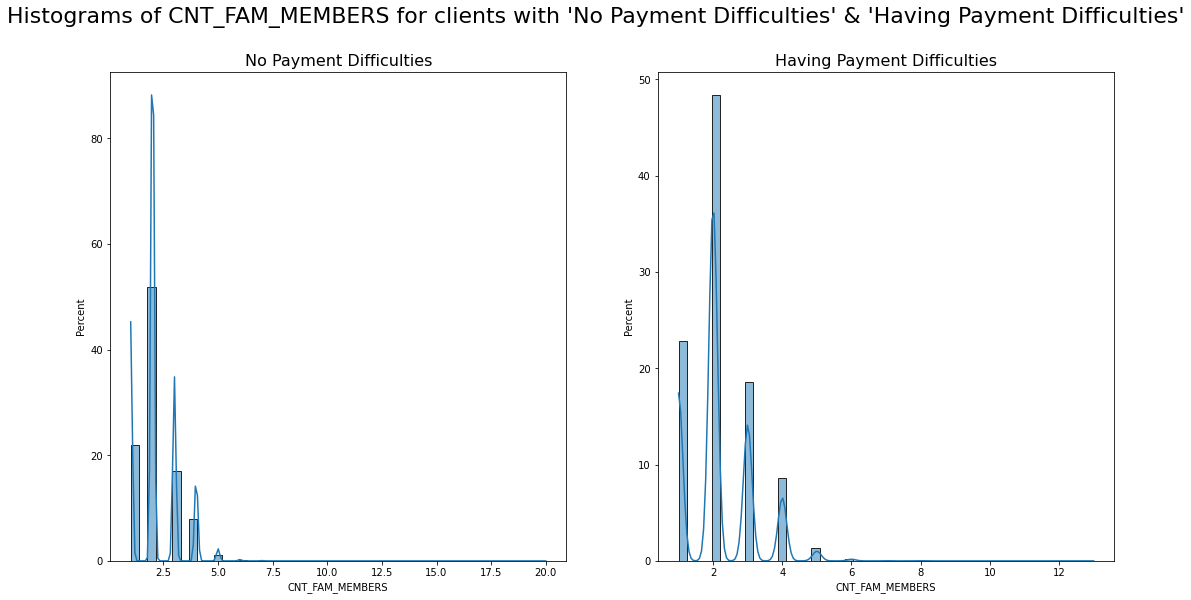

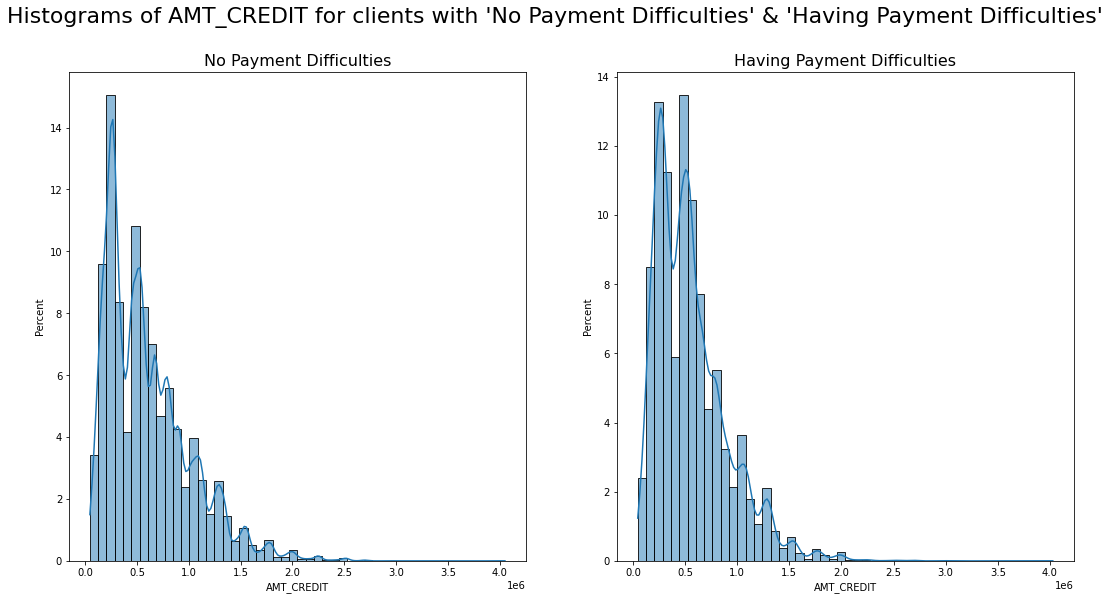

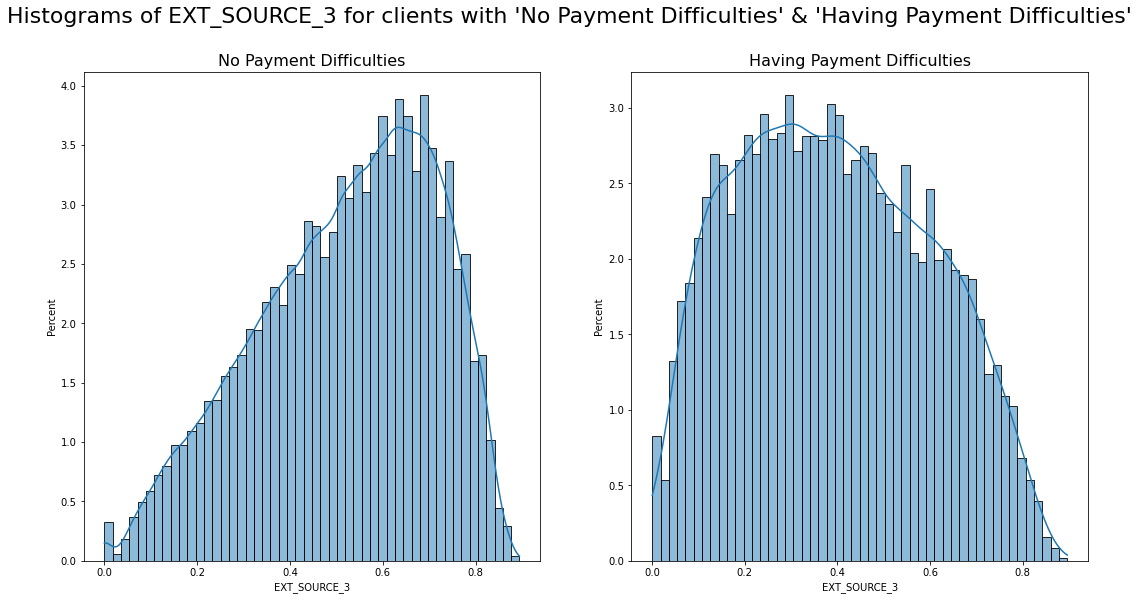

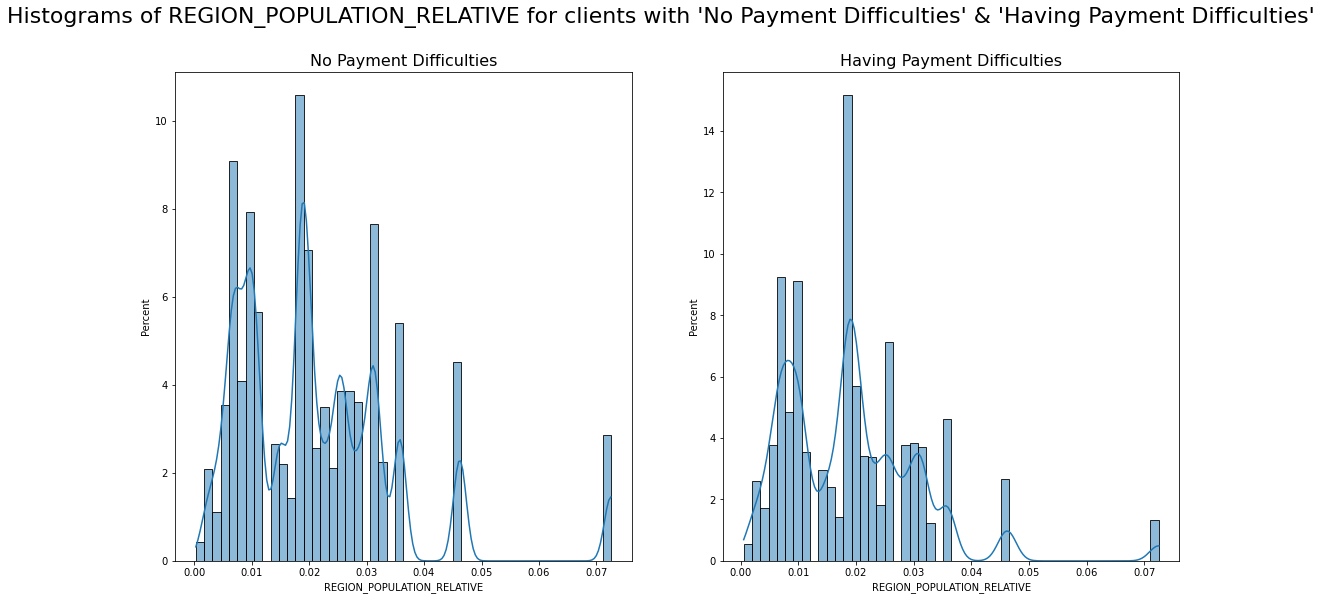

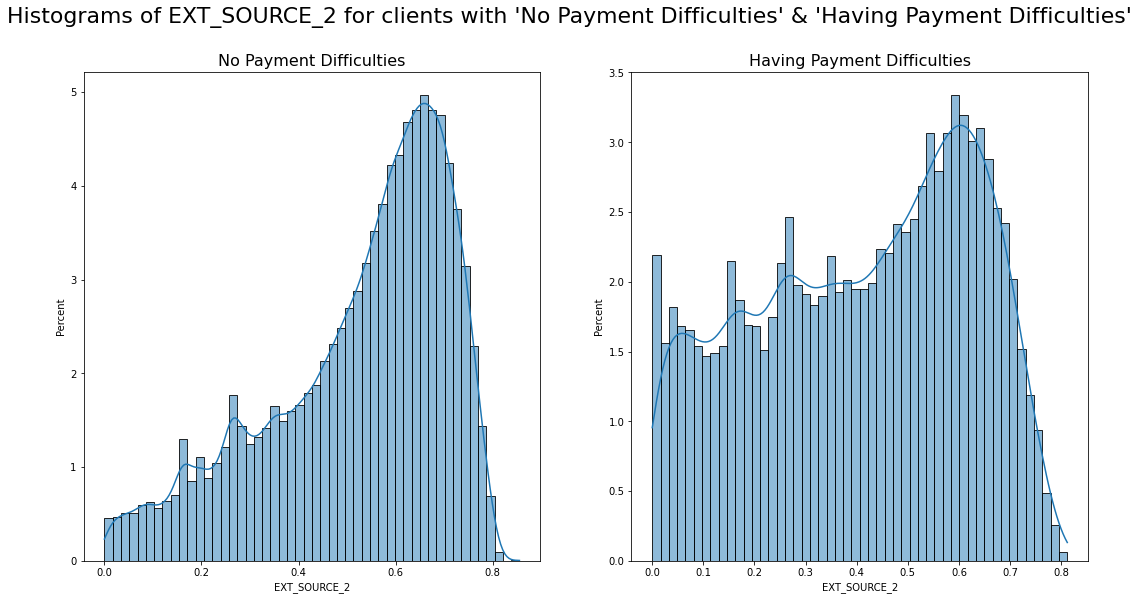

In [42]:
# Creating histograms for the above numeric variables
for x in num_vars:
    fig,axs = plt.subplots(1,2,figsize=[18,9],constrained_layout=True)
    fig.suptitle('Histograms of '+x+' for clients with \'No Payment Difficulties\' & \'Having Payment Difficulties\'',fontsize=22)
    
    sns.histplot(data=target0,x=x,stat='percent',bins=50,ax=axs[0],kde=True)
    axs[0].set_title('No Payment Difficulties',fontsize=16)
    
    sns.histplot(data=target1,x=x,stat='percent',bins=50,ax=axs[1],kde=True)
    axs[1].set_title('Having Payment Difficulties',fontsize=16)
    
    fig.subplots_adjust(hspace=0.35)
    fig.show()

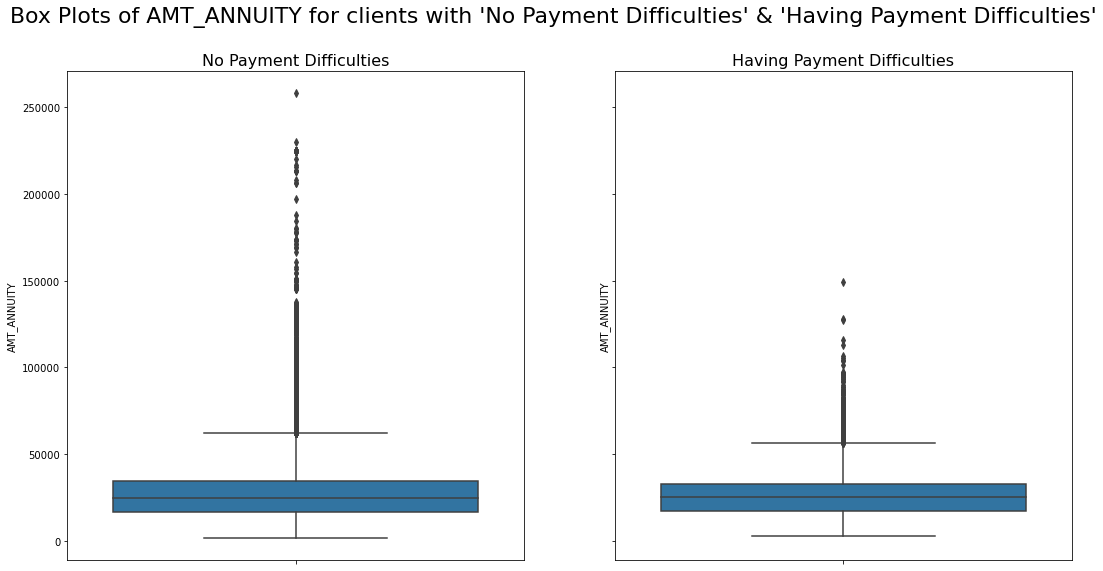

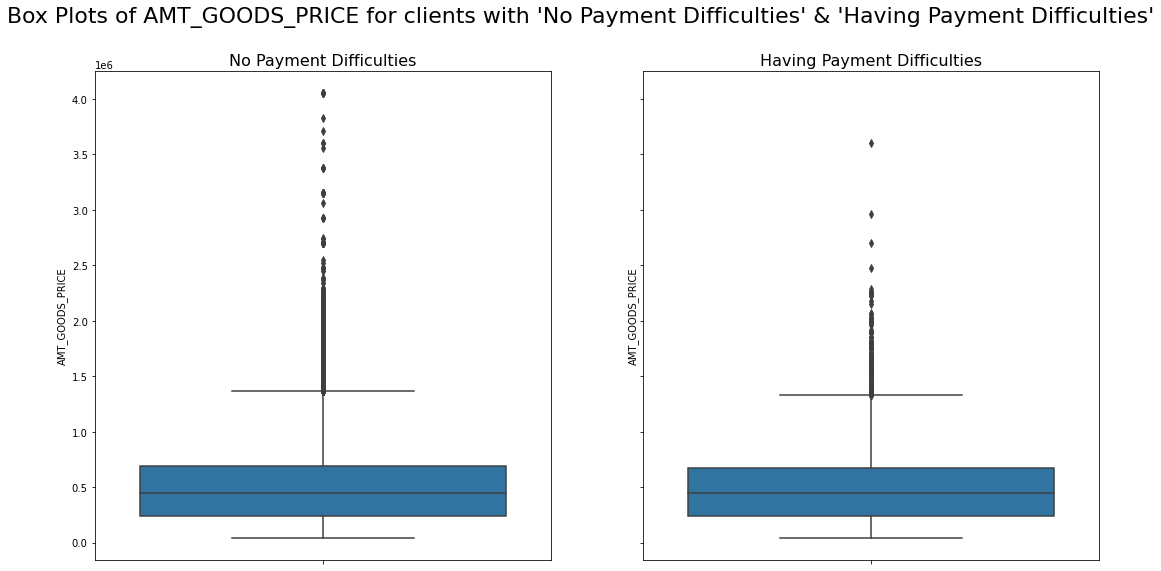

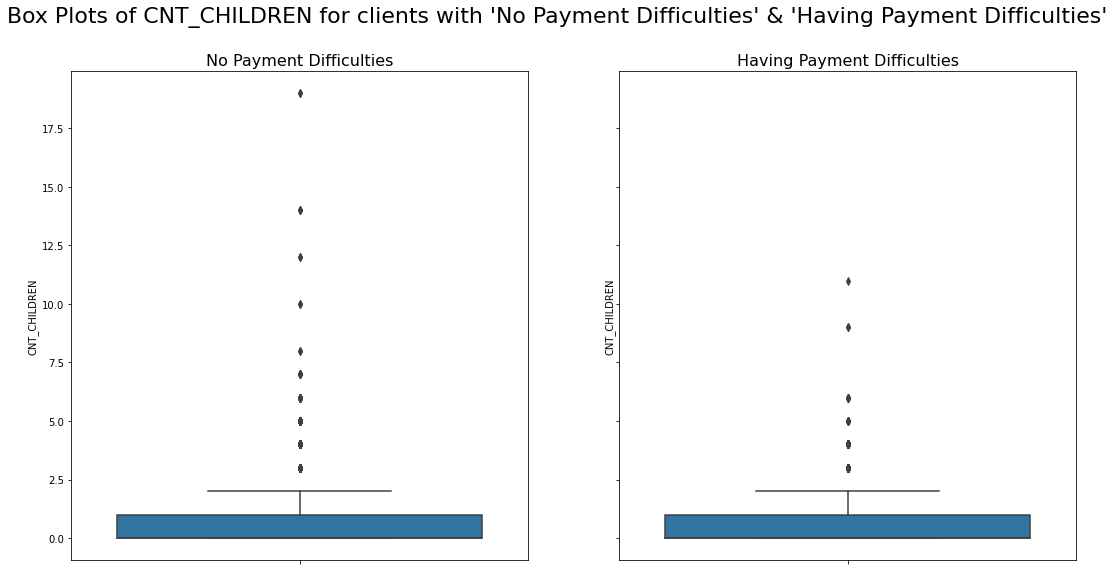

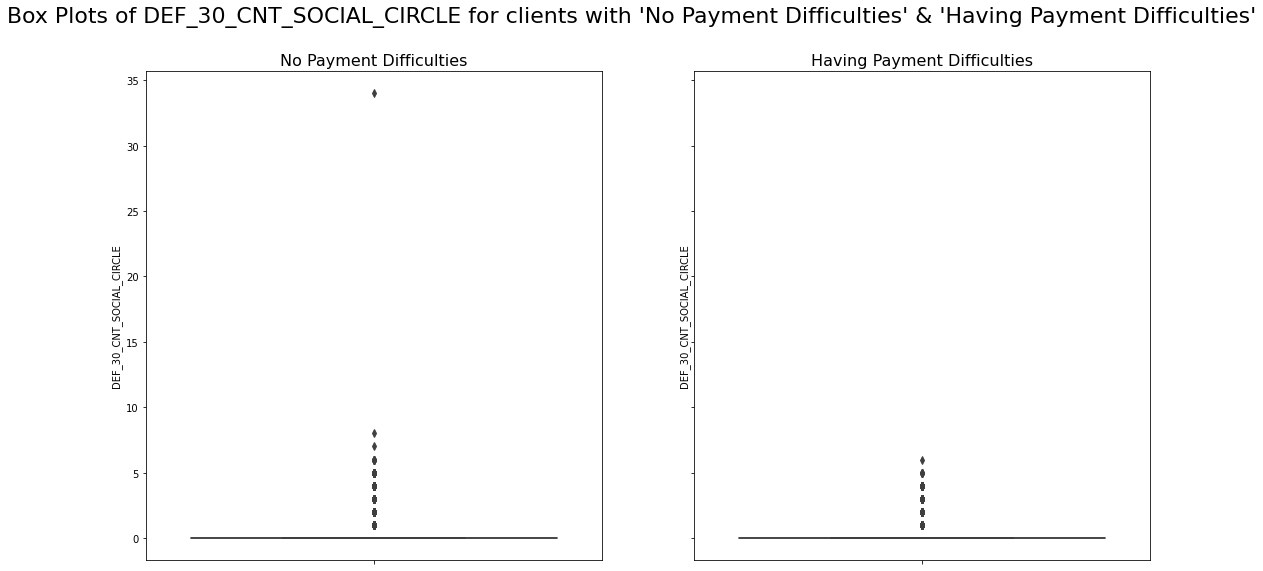

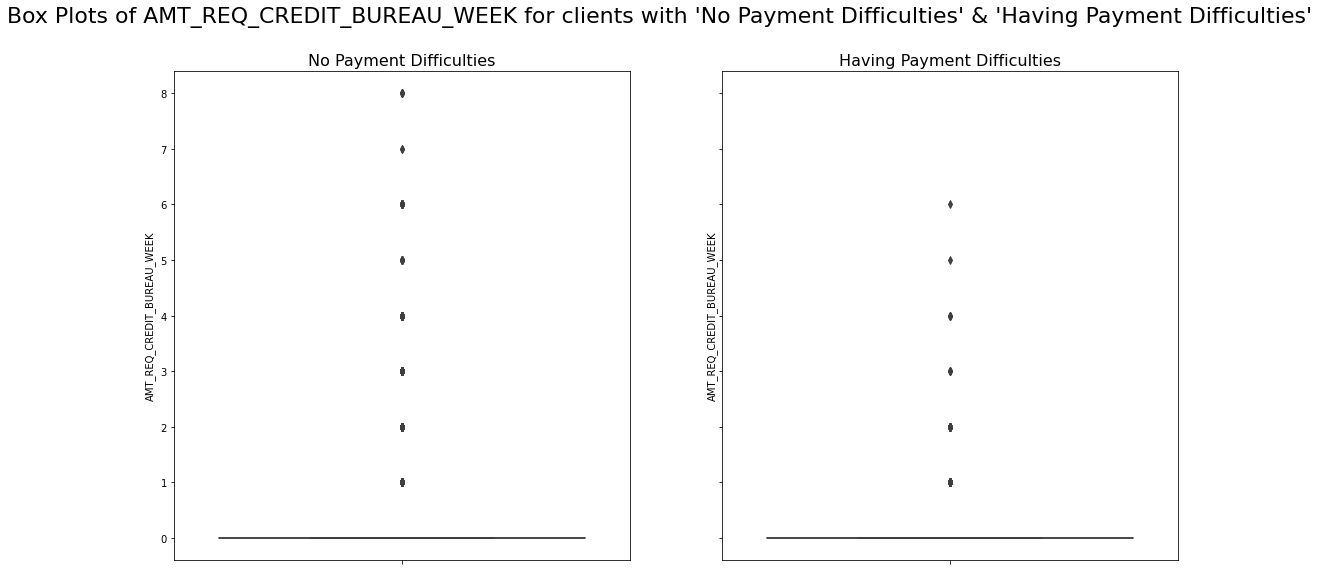

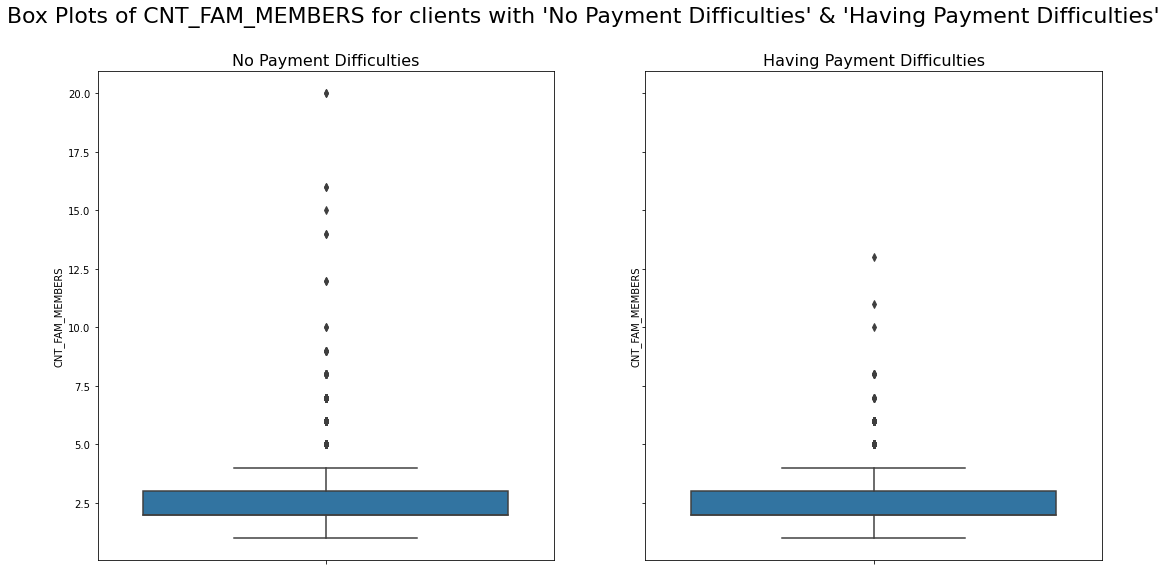

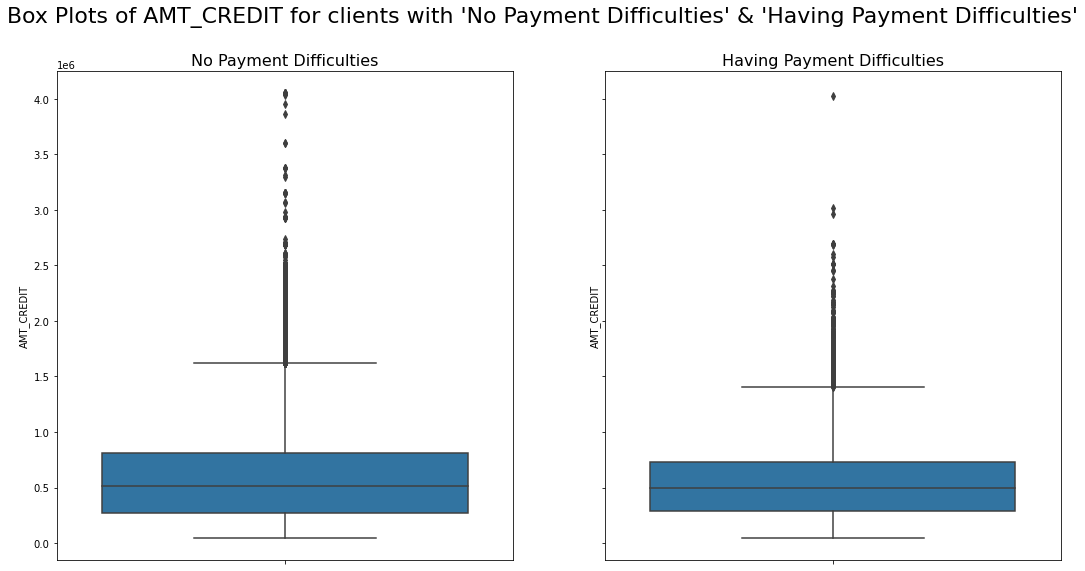

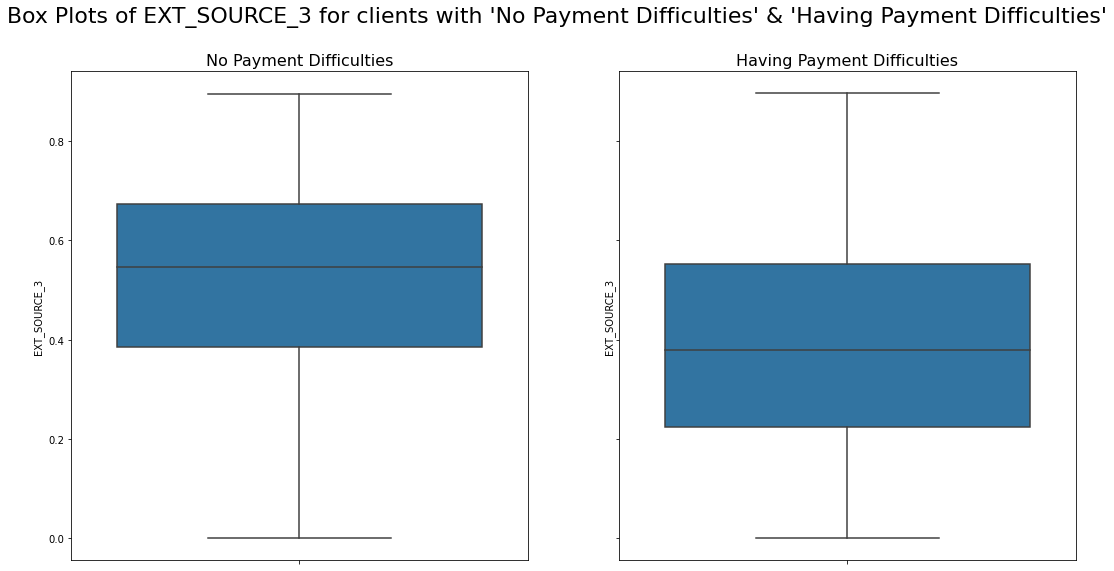

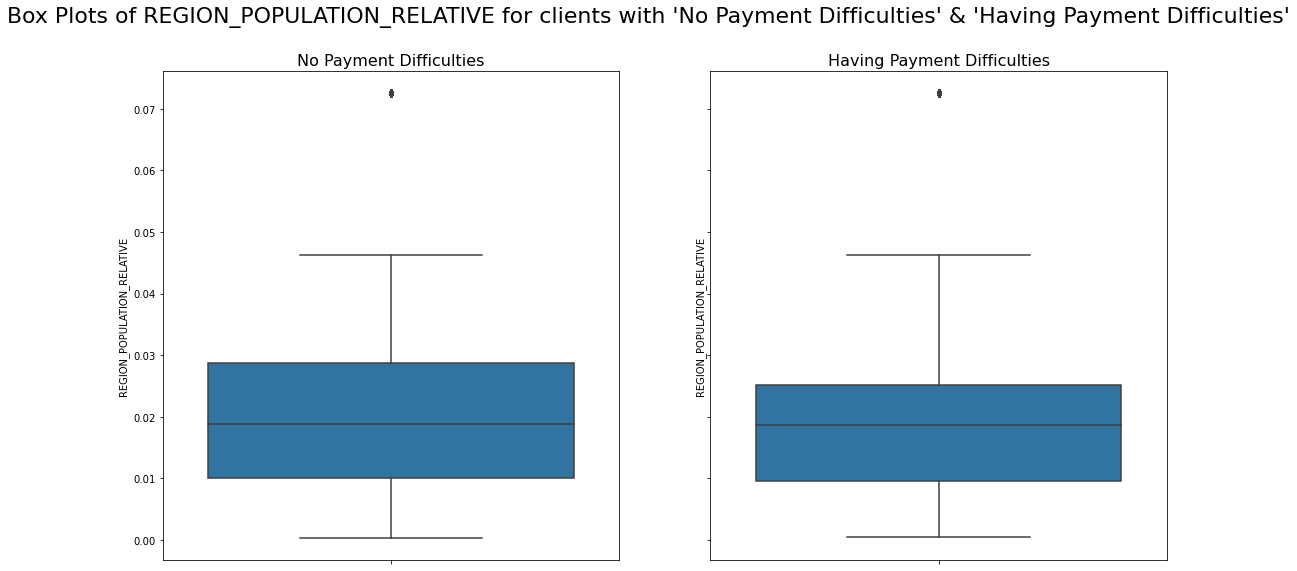

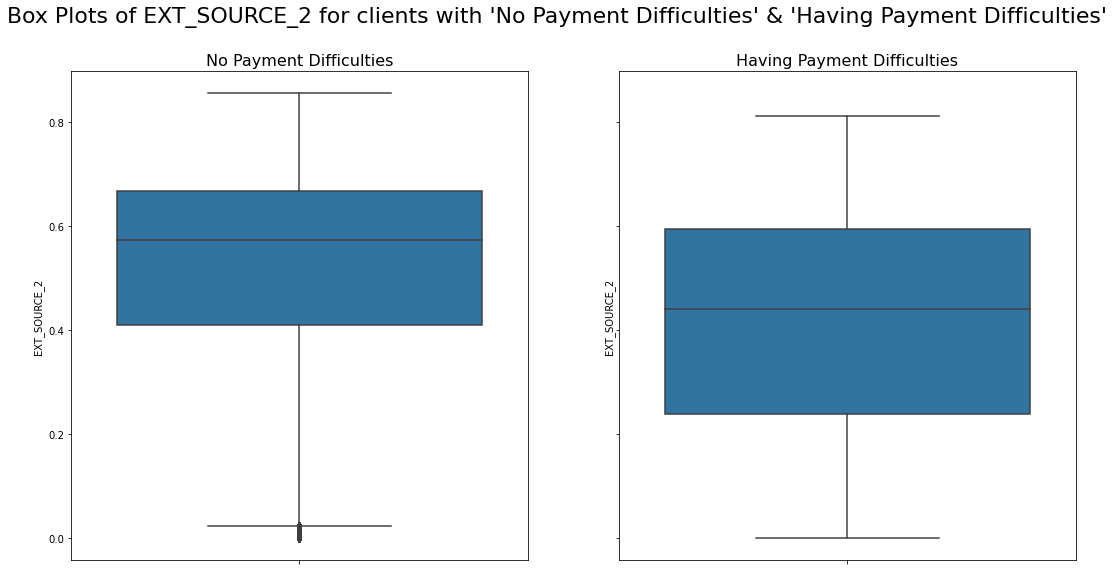

In [43]:
# Creating boxplots for the above numeric variables
for x in num_vars:
    fig,axs = plt.subplots(1,2,figsize=[18,9],constrained_layout=True,sharey=True)
    fig.suptitle('Box Plots of '+x+' for clients with \'No Payment Difficulties\' & \'Having Payment Difficulties\'',fontsize=22)
    
    sns.boxplot(data=target0,y=x,ax=axs[0])
    axs[0].set_title('No Payment Difficulties',fontsize=16)
    
    sns.boxplot(data=target1,y=x,ax=axs[1])
    axs[1].set_title('Having Payment Difficulties',fontsize=16)
    
    fig.subplots_adjust(hspace=0.35)
    fig.show()

__Insights__

1. For the variable AMT_ANNUITY, the category 'Having Payment Difficulties' has slightly lower values with a lower median and IQR than the category 'No Payment Difficulties'.
2. For the variable AMT_GOODS_PRICE, the category 'Having Payment Difficulties' has slightly lower values with a lower median and IQR than the category 'No Payment Difficulties'.
3. The variables CNT_CHILDREN, DEF_30_CNT_SOCIAL_CIRCLE, AMT_REQ_CREDIT_BUREAU_WEEK0 and CNT_FAM_MEMBERS have similar distributions for the categories 'Having Payment Difficulties' and 'No Payment Difficulties'.
4. For the variable AMT_CREDIT, the category 'Having Payment Difficulties' has slightly lower values and median than the category 'No Payment Difficulties'.
5. For the variable EXT_SOURCE_3, the category 'Having Payment Difficulties' has significantly lower scores, median and quartiles than the category 'No Payment Difficulties'. Thus, lower values are strong indicators of default.
6. For the variable REGION_POPULATION_RELATIVE, the category 'Having Payment Difficulties' has slightly lower values, median and quartiles than the category 'No Payment Difficulties'. Thus, lower values are indicators of default.
7. For the variable EXT_SOURCE_2, the category 'Having Payment Difficulties' has significantly lower scores, median and quartiles than the category 'No Payment Difficulties'. Thus, lower values are strong indicators of default.

#### 3.3.5 Bivariate & Multivariate Analysis

##### 3.3.5.1 Numeric - Numeric Analysis

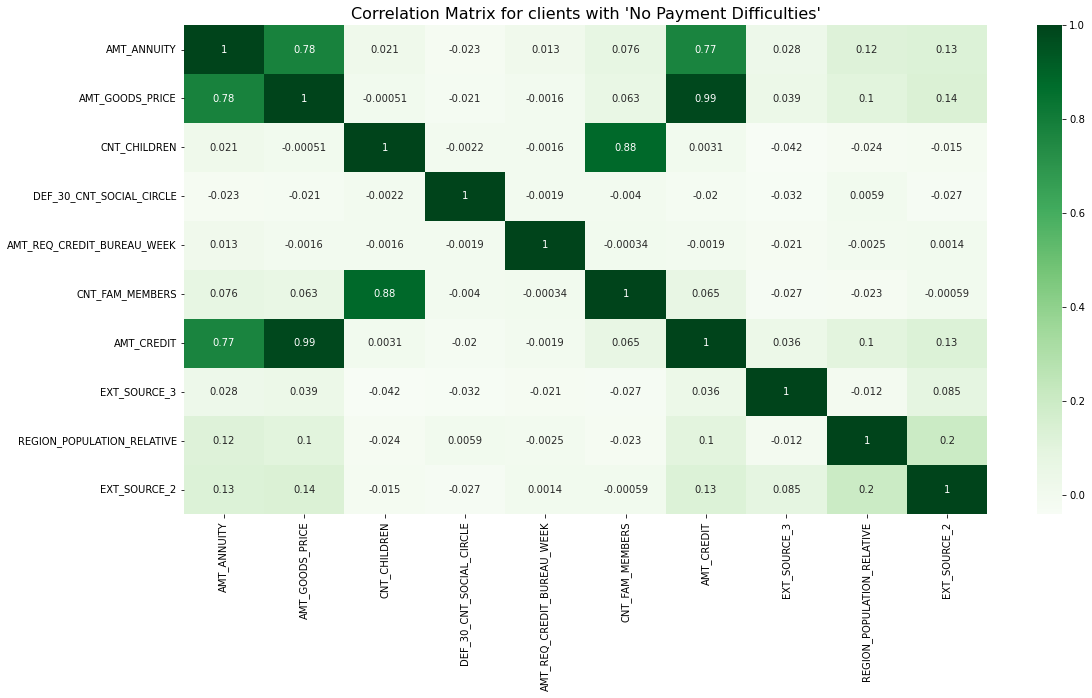

In [44]:
# Creating a correlation matrix for the relevant numeric variables identified above for clients having 'No Payment Difficulties'
corr0 = target0[num_vars].corr()
fig,ax = plt.subplots(figsize=[18,9])
sns.heatmap(corr0,cmap='Greens',annot=True)
ax.set_title('Correlation Matrix for clients with \'No Payment Difficulties\'',fontsize=16)
fig.show()

As seen above, the variable pairs with the highest correlations are
1. AMT_CREDIT & AMT_GOODS_PRICE = 0.99
2. CNT_FAM_MEMBERS & CNT_CHILDREN = 0.88
3. AMT_GOODS_PRICE & AMT_ANNUITY = 0.78
4. AMT_CREDIT & AMT_ANNUITY = 0.77
5. EXT_SOURCE_2 & REGION_POPULATION_RELATIVE = 0.2

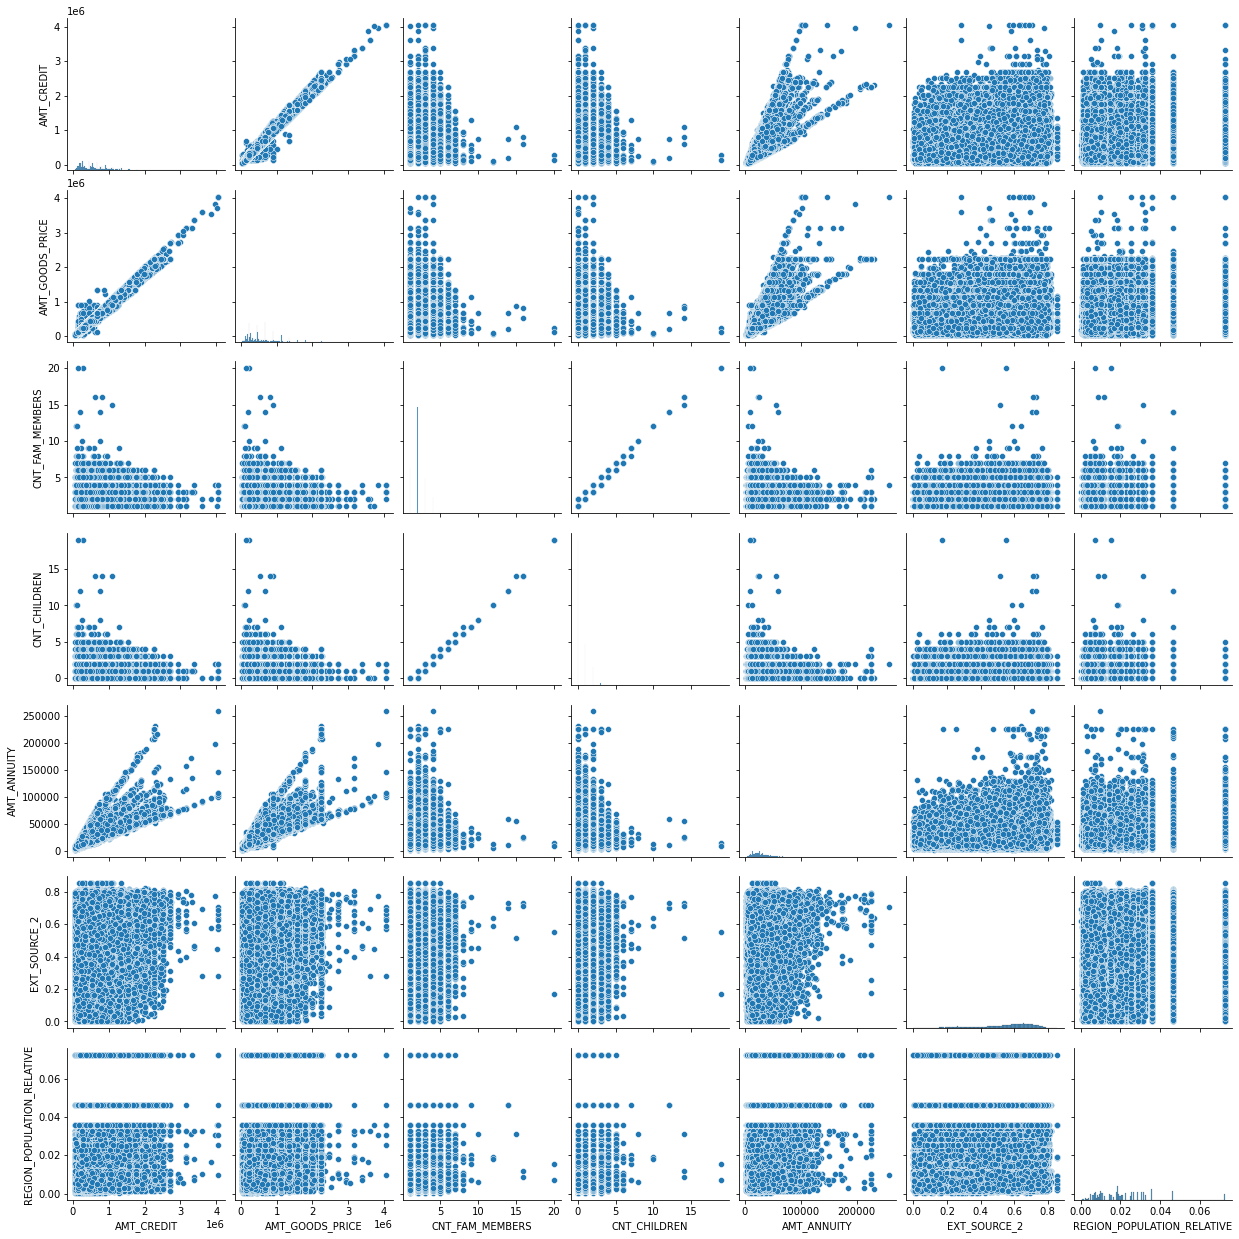

In [45]:
# Creating a pair plot of the variables with the highest correlations
sns.pairplot(target0[['AMT_CREDIT','AMT_GOODS_PRICE','CNT_FAM_MEMBERS','CNT_CHILDREN','AMT_ANNUITY','EXT_SOURCE_2','REGION_POPULATION_RELATIVE']])
plt.show()

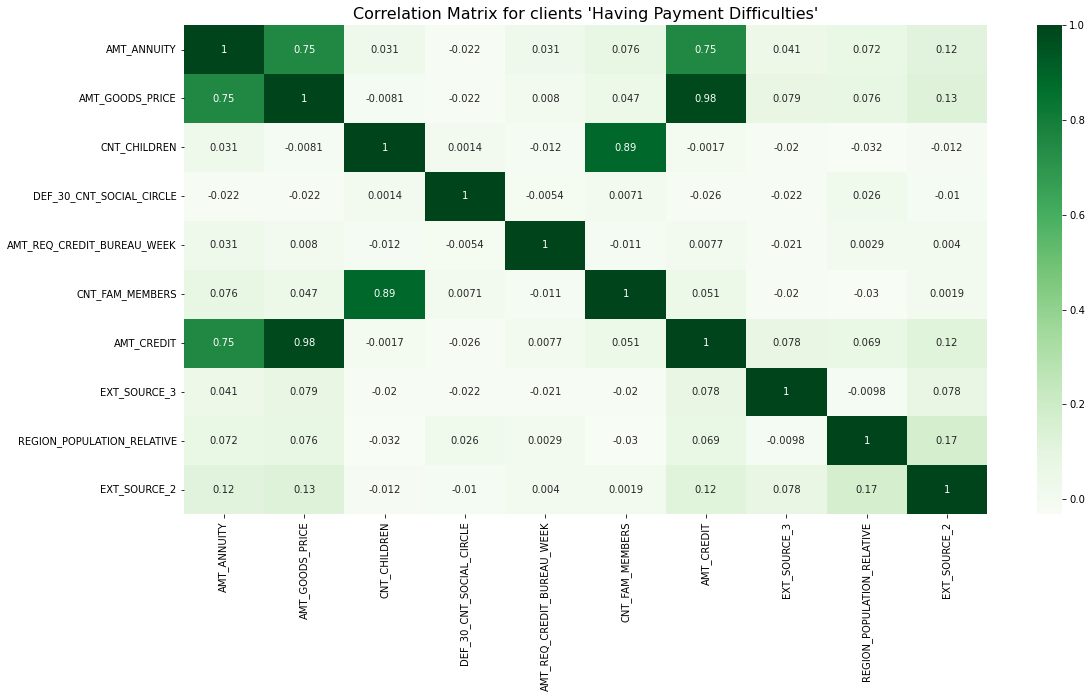

In [46]:
# Creating a correlation matrix for the relevant numeric variables identified above for clients 'Having Payment Difficulties'
corr1 = target1[num_vars].corr()
fig,ax = plt.subplots(figsize=[18,9])
sns.heatmap(corr1,cmap='Greens',annot=True)
ax.set_title('Correlation Matrix for clients \'Having Payment Difficulties\'',fontsize=16)
fig.show()

As seen above, the variable pairs with the highest correlations are
1. AMT_CREDIT & AMT_GOODS_PRICE = 0.98
2. CNT_FAM_MEMBERS & CNT_CHILDREN = 0.89
3. AMT_GOODS_PRICE & AMT_ANNUITY = 0.75
4. AMT_CREDIT & AMT_ANNUITY = 0.75
5. EXT_SOURCE_2 & REGION_POPULATION_RELATIVE = 0.17

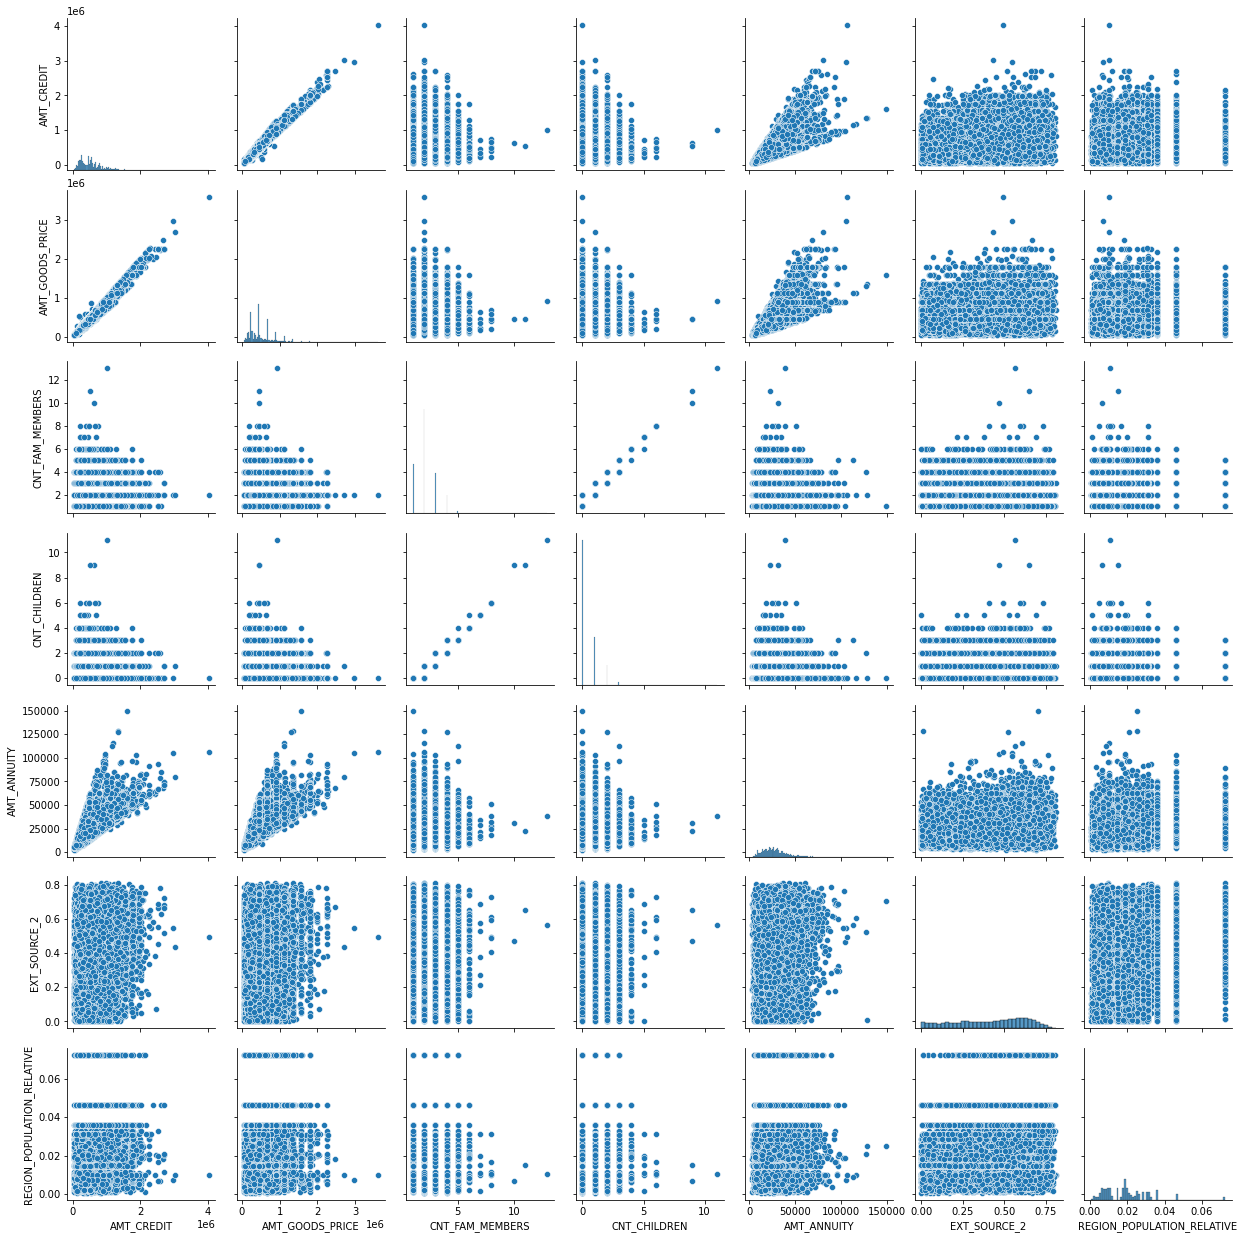

In [47]:
# Creating a pair plot of the variables with the highest correlations
sns.pairplot(target1[['AMT_CREDIT','AMT_GOODS_PRICE','CNT_FAM_MEMBERS','CNT_CHILDREN','AMT_ANNUITY','EXT_SOURCE_2','REGION_POPULATION_RELATIVE']])
plt.show()

__Insights__<br>
In both categories of clients with 'No Payment Difficulties' and 'Having Payment Difficulties',<br>
(i) the annuity amount has high positive correlation with the credit amount and the price of the good,  <br>
(ii) the amount of credit has high positive correlation with the price of the good, <br>
(iii) the number of children has high positive correlation with the number of family numbers (suggesting joint family), and <br>
(iv) living in a more densely populated region is mildly correlated with a high EXT_SOURCE_2 value.

However, correlations are overall lower in case of 'Having Payment Difficulties'.

##### 3.3.5.2 Numeric - Categorical Analysis

In [48]:
# Creating a pivot table to compare means of numeric variables for TARGET=0 and TARGET=1
df1.pivot_table(num_vars,'TARGET')

AMT_ANNUITY     AMT_CREDIT  AMT_GOODS_PRICE  \
TARGET                                                 
0       27163.694481  602650.964858    542738.506775   
1       26481.744290  557778.527674    488972.412554   

        AMT_REQ_CREDIT_BUREAU_WEEK  CNT_CHILDREN  CNT_FAM_MEMBERS  \
TARGET                                                              
0                         0.034316      0.412944         2.150145   
1                         0.034919      0.463807         2.181269   

        DEF_30_CNT_SOCIAL_CIRCLE  EXT_SOURCE_2  EXT_SOURCE_3  \
TARGET                                                         
0                       0.139133      0.523477      0.520972   
1                       0.191980      0.410935      0.390717   

        REGION_POPULATION_RELATIVE  
TARGET                              
0                         0.021021  
1                         0.019131

In [49]:
# Creating a pivot table to compare medians of numeric variables for TARGET=0 and TARGET=1
df1.pivot_table(num_vars,'TARGET',aggfunc='median')

AMT_ANNUITY  AMT_CREDIT  AMT_GOODS_PRICE  AMT_REQ_CREDIT_BUREAU_WEEK  \
TARGET                                                                         
0           24876.0    517788.0         450000.0                         0.0   
1           25263.0    497520.0         450000.0                         0.0   

        CNT_CHILDREN  CNT_FAM_MEMBERS  DEF_30_CNT_SOCIAL_CIRCLE  EXT_SOURCE_2  \
TARGET                                                                          
0                  0              2.0                       0.0      0.573902   
1                  0              2.0                       0.0      0.440381   

        EXT_SOURCE_3  REGION_POPULATION_RELATIVE  
TARGET                                            
0           0.546023                    0.018850  
1           0.379100                    0.018634

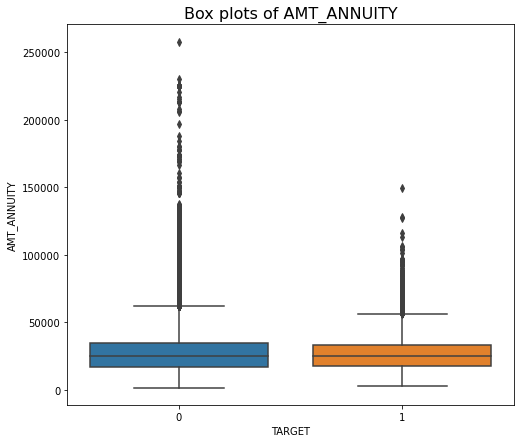

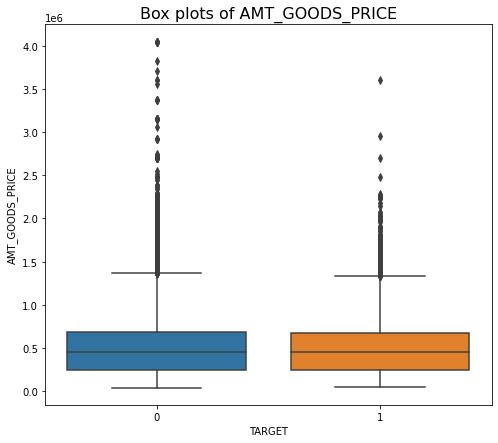

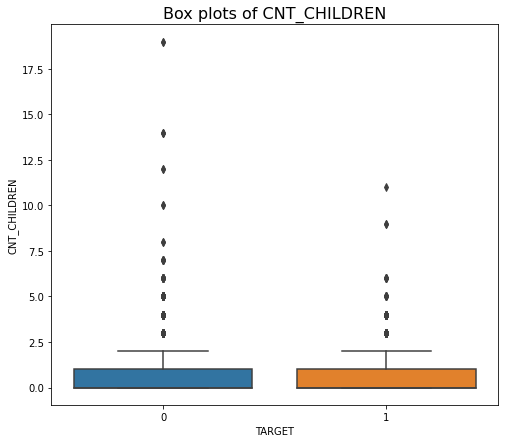

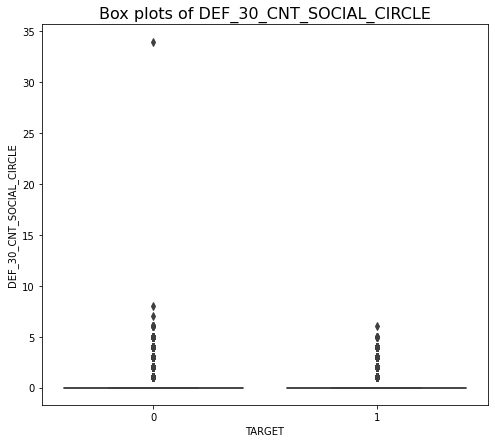

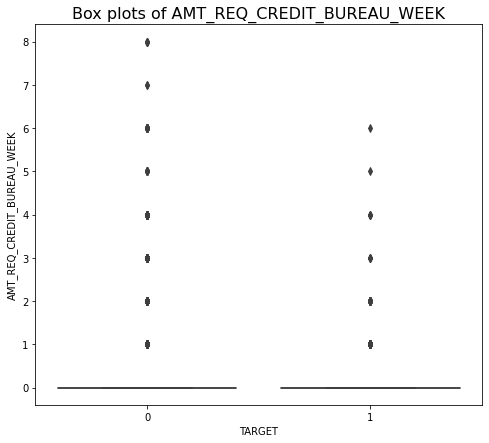

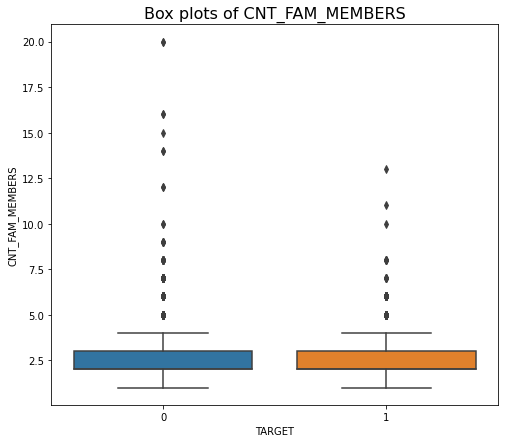

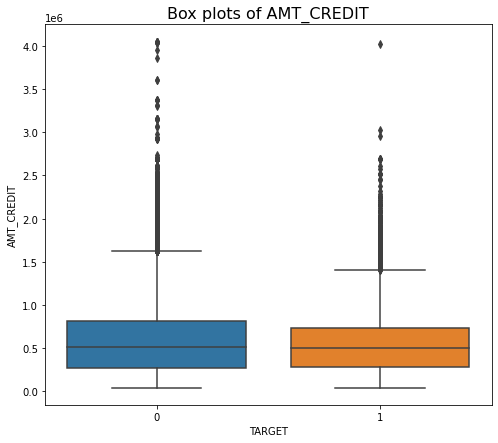

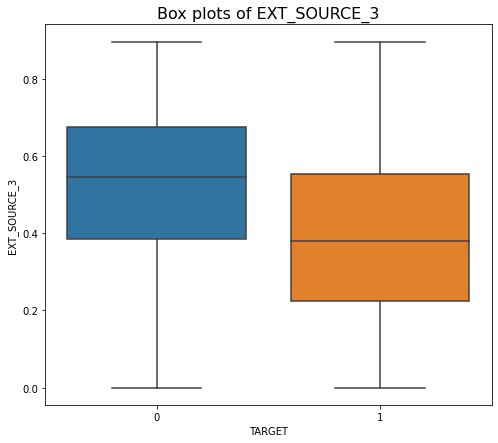

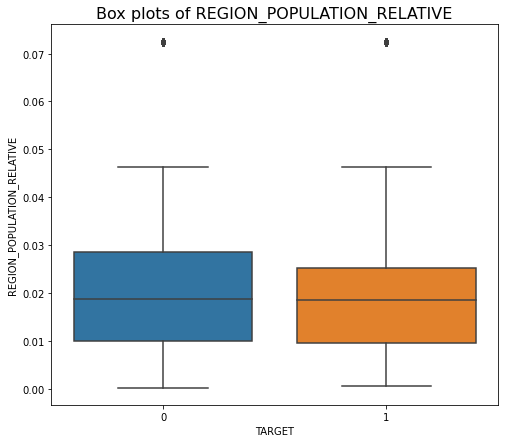

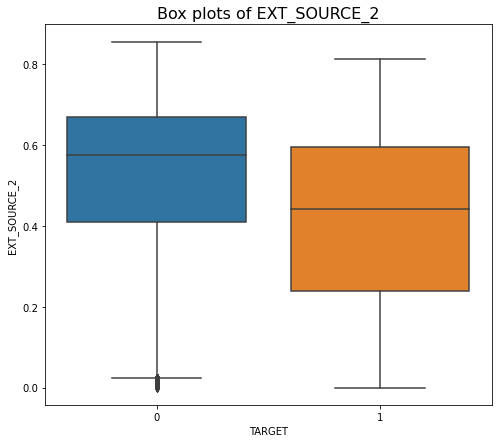

In [50]:
# Creating box plots for numeric-categorical analysis with the categorical variable TARGET
for x in num_vars:
    fig,ax = plt.subplots(figsize=[8,7])
    sns.boxplot(x='TARGET',y=x,data=df1,ax=ax)
    ax.set_title('Box plots of '+x,fontsize=16)
    fig.show()

__Insights__

1. Analysis of AMT_ANNUITY indicates that clients having payment difficulties have lower annuity amounts compared to those without payment difficulties, contrary to expectations. This is probably because loans are disbursed after adjusting for repayment capacity.
2. Analysis of AMT_CREDIT indicates that clients having payment difficulties have smaller loans compared to those without payment difficulties, contrary to expectations. This is probably because loans are disbursed after adjusting for repayment capacity.
3. Analysis of AMT_GOODS_PRICE indicates that the price of the good is a poor indicator of loan repayment capacity because statistics are similar for both categories.
4. Analysis of EXT_SOURCE_2 & EXT_SOURCE_3 imply that lower scores indicate higher likelihood of having payment difficulties.
5. Analysis of REGION_POPULATION_RELATIVE implies that living in a region with a lower score increases likelihood of having payment difficulties.

##### 3.3.5.3 Categorical - Categorical Analysis

Categorical - categorical analysis is done by calculating rates of default for relevant categorical variables

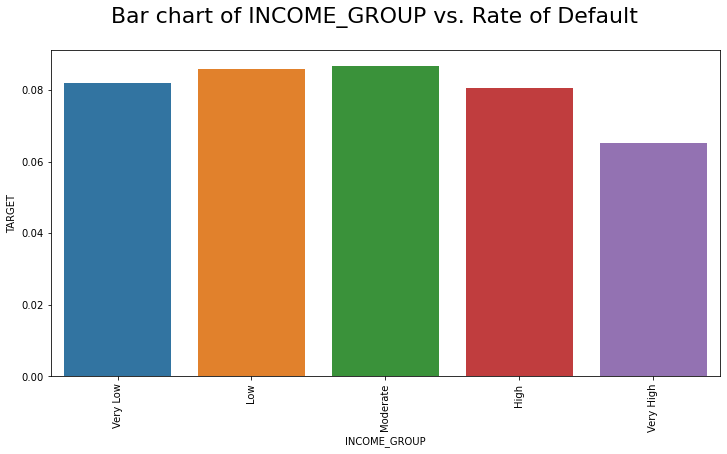

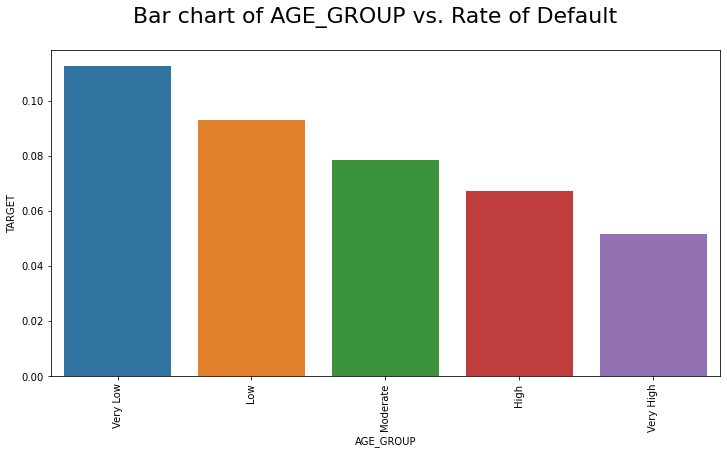

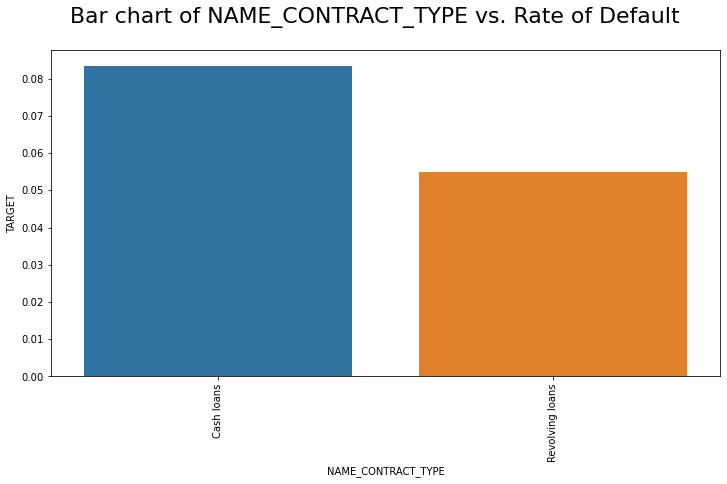

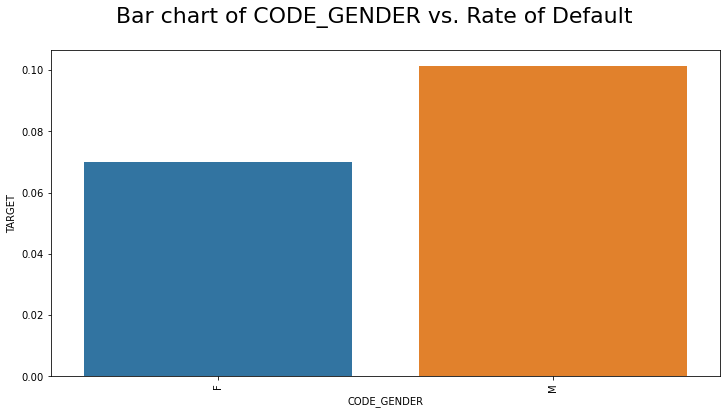

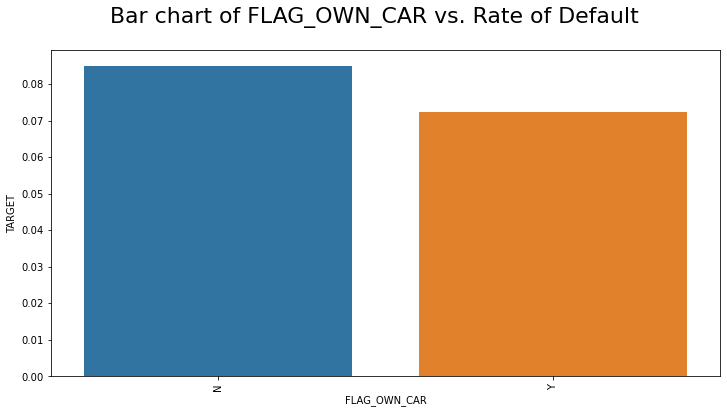

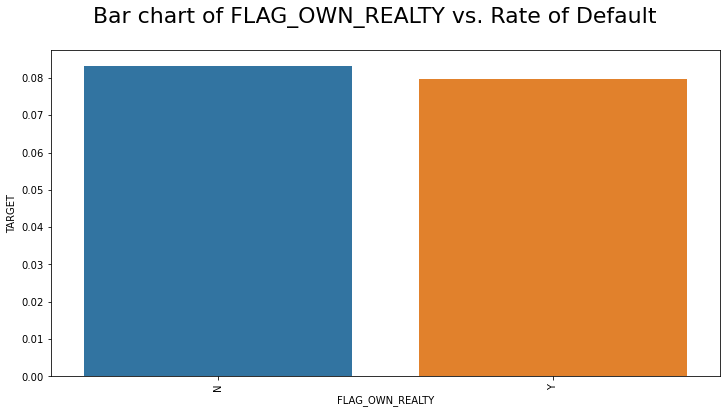

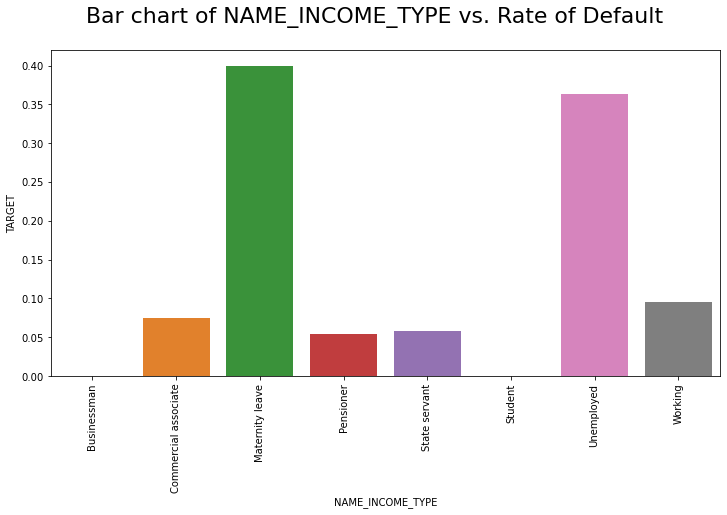

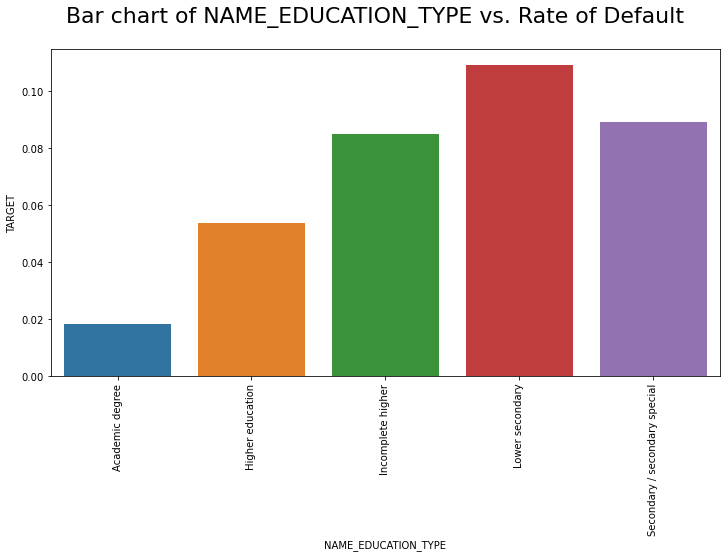

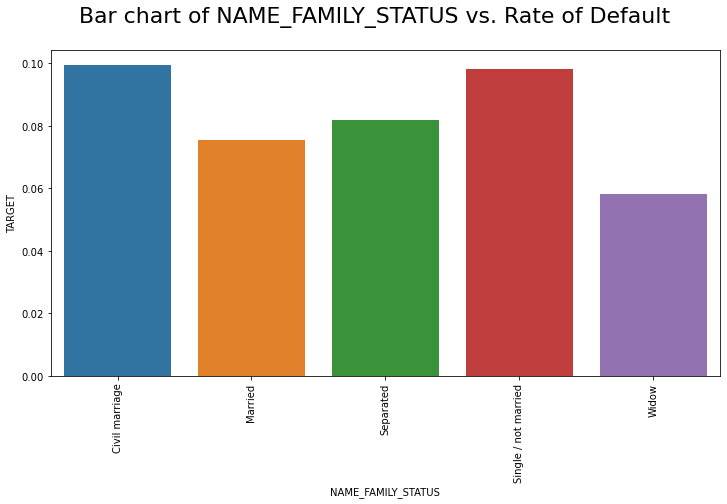

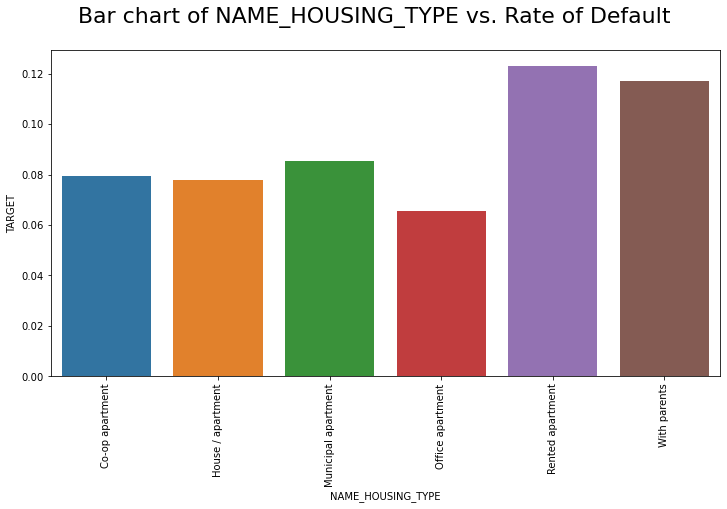

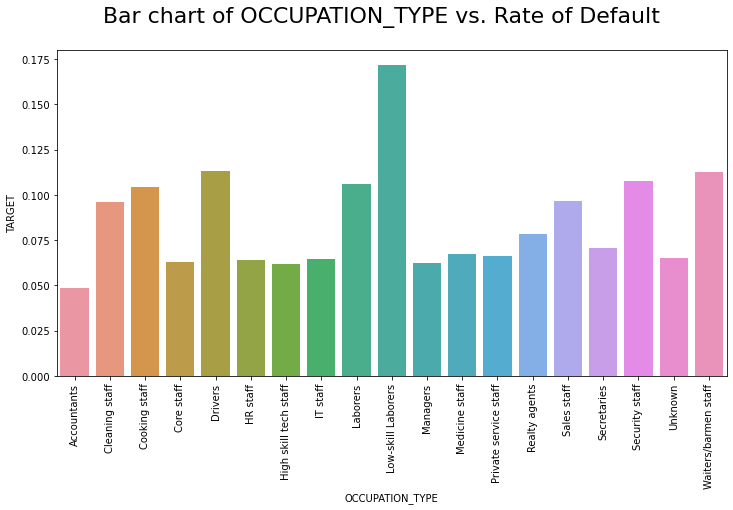

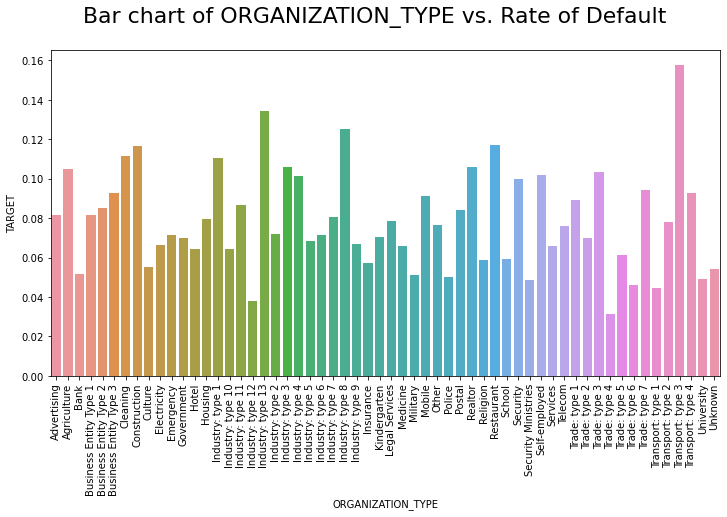

In [51]:
for x in cat_vars:
    fig,ax = plt.subplots(figsize=[12,6])
    fig.suptitle('Bar chart of '+x+' vs. Rate of Default',fontsize=22)
    
    pvt = df1.pivot_table(values='TARGET',index=x)
    sns.barplot(pvt.index,pvt['TARGET'])
    ax.set_xticklabels(pvt.index,rotation=90.0)
    
    fig.show()

#### 3.3.6 Correlations

__Top 10 correlations for clients with 'No Payment Difficulties'__

In [52]:
#Taking correlations of numeric variables
corr0 = target0.corr().unstack().reset_index()
corr0

level_0                     level_1         0
0                     SK_ID_CURR                  SK_ID_CURR  1.000000
1                     SK_ID_CURR                      TARGET       NaN
2                     SK_ID_CURR                CNT_CHILDREN -0.000707
3                     SK_ID_CURR                  AMT_CREDIT -0.000349
4                     SK_ID_CURR                 AMT_ANNUITY  0.000062
...                          ...                         ...       ...
4220  AMT_REQ_CREDIT_BUREAU_YEAR   AMT_REQ_CREDIT_BUREAU_DAY -0.003797
4221  AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_WEEK  0.019087
4222  AMT_REQ_CREDIT_BUREAU_YEAR   AMT_REQ_CREDIT_BUREAU_MON -0.004900
4223  AMT_REQ_CREDIT_BUREAU_YEAR   AMT_REQ_CREDIT_BUREAU_QRT  0.074658
4224  AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_YEAR  1.000000

[4225 rows x 3 columns]

In [53]:
# Removing entries where level_0 = level_1
corr0 = corr0[corr0['level_0']!=corr0['level_1']].sort_values(by=0,ascending=False)
corr0

level_0                      level_1         0
2246      OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE  0.998508
2374      OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE  0.998508
1852                 FLOORSMAX_AVG               FLOORSMAX_MEDI  0.997018
2108                FLOORSMAX_MEDI                FLOORSMAX_AVG  0.997018
2042  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG  0.993582
...                            ...                          ...       ...
4104     AMT_REQ_CREDIT_BUREAU_QRT                   FLAG_MOBIL       NaN
4134     AMT_REQ_CREDIT_BUREAU_QRT              FLAG_DOCUMENT_2       NaN
4161    AMT_REQ_CREDIT_BUREAU_YEAR                       TARGET       NaN
4169    AMT_REQ_CREDIT_BUREAU_YEAR                   FLAG_MOBIL       NaN
4199    AMT_REQ_CREDIT_BUREAU_YEAR              FLAG_DOCUMENT_2       NaN

[4160 rows x 3 columns]

In [54]:
# Isolating top 10 correlations
corr0.iloc[0:20,:][np.array([True,False]*10)]

level_0                       level_1         0
2246      OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE  0.998508
1852                 FLOORSMAX_AVG                FLOORSMAX_MEDI  0.997018
2042  YEARS_BEGINEXPLUATATION_MEDI   YEARS_BEGINEXPLUATATION_AVG  0.993582
1982                FLOORSMAX_MODE                FLOORSMAX_MEDI  0.988152
328                AMT_GOODS_PRICE                    AMT_CREDIT  0.987253
1850                 FLOORSMAX_AVG                FLOORSMAX_MODE  0.985602
1912  YEARS_BEGINEXPLUATATION_MODE   YEARS_BEGINEXPLUATATION_AVG  0.971032
2044  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE  0.962064
1057          REGION_RATING_CLIENT   REGION_RATING_CLIENT_W_CITY  0.950148
977                CNT_FAM_MEMBERS                  CNT_CHILDREN  0.878570

__Top 10 correlations for clients 'Having Payment Difficulties'__

In [55]:
#Taking correlations of numeric variables
corr1 = target1.corr().unstack().reset_index()
corr1

level_0                     level_1         0
0                     SK_ID_CURR                  SK_ID_CURR  1.000000
1                     SK_ID_CURR                      TARGET       NaN
2                     SK_ID_CURR                CNT_CHILDREN -0.005144
3                     SK_ID_CURR                  AMT_CREDIT -0.001290
4                     SK_ID_CURR                 AMT_ANNUITY -0.007578
...                          ...                         ...       ...
4220  AMT_REQ_CREDIT_BUREAU_YEAR   AMT_REQ_CREDIT_BUREAU_DAY  0.001239
4221  AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_WEEK  0.016838
4222  AMT_REQ_CREDIT_BUREAU_YEAR   AMT_REQ_CREDIT_BUREAU_MON -0.002559
4223  AMT_REQ_CREDIT_BUREAU_YEAR   AMT_REQ_CREDIT_BUREAU_QRT  0.101756
4224  AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_YEAR  1.000000

[4225 rows x 3 columns]

In [56]:
# Removing entries where level_0 = level_1
corr1 = corr1[corr1['level_0']!=corr1['level_1']].sort_values(by=0,ascending=False)
corr1

level_0                       level_1         0
2246     OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE  0.998269
2374     OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE  0.998269
1852                FLOORSMAX_AVG                FLOORSMAX_MEDI  0.997187
2108               FLOORSMAX_MEDI                 FLOORSMAX_AVG  0.997187
1786  YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_MEDI  0.996124
...                           ...                           ...       ...
4199   AMT_REQ_CREDIT_BUREAU_YEAR               FLAG_DOCUMENT_2       NaN
4201   AMT_REQ_CREDIT_BUREAU_YEAR               FLAG_DOCUMENT_4       NaN
4207   AMT_REQ_CREDIT_BUREAU_YEAR              FLAG_DOCUMENT_10       NaN
4209   AMT_REQ_CREDIT_BUREAU_YEAR              FLAG_DOCUMENT_12       NaN
4214   AMT_REQ_CREDIT_BUREAU_YEAR              FLAG_DOCUMENT_17       NaN

[4160 rows x 3 columns]

In [57]:
# Isolating top 10 correlations
corr1.iloc[0:20,:][np.array([True,False]*10)]

level_0                       level_1         0
2246      OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE  0.998269
1852                 FLOORSMAX_AVG                FLOORSMAX_MEDI  0.997187
1786   YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_MEDI  0.996124
2110                FLOORSMAX_MEDI                FLOORSMAX_MODE  0.989195
1978                FLOORSMAX_MODE                 FLOORSMAX_AVG  0.986594
200                     AMT_CREDIT               AMT_GOODS_PRICE  0.983103
1784   YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_MODE  0.980466
2044  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE  0.978073
1057          REGION_RATING_CLIENT   REGION_RATING_CLIENT_W_CITY  0.956637
145                   CNT_CHILDREN               CNT_FAM_MEMBERS  0.885484

Thus, correlations are generally higher for clients 'Having Payment Difficulties' compared to those with 'No Payment Difficulties'.

## 4 Cleaning & Analysis of previous_application.csv

### 4.1 Data Loading & Inspection

In [58]:
# Loading data
df2 = pd.read_csv('previous_application.csv')
df2.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [59]:
# Inspecting shape of the data
df2.shape

(1670214, 37)

In [60]:
# Checking data types and other meta-data
df2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [61]:
# Calculating descriptive statistics
df2.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115834    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

### 4.2 Data Cleaning

#### 4.2.1 Checking and fixing header and footer rows

In [62]:
df2.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [63]:
df2.tail()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
1670209         267295.5    311400.0               0.0         267295.5   
1670210          87750.0     64291.5           29250.0          87750.0   
1670211         105237.0    102523.5           10525.5         105237.0   
1670212         180000.0    191880.0               NaN         180000.0   
1670213         360000.0    360000.0               NaN         360000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  ...  \
1670209                  WEDNESDAY                       12  ...   
1670210                    TUESDAY                       15  ...   
1670211                     MONDAY                       12  ...   
1670212                  WEDNESDAY                        9  ...   
1670213                     SUNDAY                       10  ...   

         NAME_SELLER_INDUSTRY  CNT_PAYMENT  NAME_YIELD_GROUP  \
1670209             Furniture         30.0        low_normal   
1670210             Furniture         12.0            middle   
1670211  Consumer electronics         10.0        low_normal   
1670212                   XNA         12.0        low_normal   
1670213                   XNA         48.0            middle   

                 PRODUCT_COMBINATION  DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
1670209   POS industry with interest            365243.0         -508.0   
1670210   POS industry with interest            365243.0        -1604.0   
1670211  POS household with interest            365243.0        -1457.0   
1670212             Cash X-Sell: low            365243.0        -1155.0   
1670213          Cash X-Sell: middle            365243.0        -1163.0   

        DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
1670209                     362.0         -358.0           -351.0   
1670210                   -1274.0        -1304.0          -1297.0   
1670211                   -1187.0        -1187.0          -1181.0   
1670212                    -825.0         -825.0           -817.0   
1670213                     247.0         -443.0           -423.0   

        NFLAG_INSURED_ON_APPROVAL  
1670209                       0.0  
1670210                       0.0  
1670211                       0.0  
1670212                       1.0  
1670213                       0.0  

[5 rows x 37 columns]

No changes to top and bottom rows are required since they have no anomalies.

#### 4.2.2 Fixing missing values

In [64]:
# Checking percentage of missing values in every column
null_per = df2.isnull().sum()/len(df2)*100
null_per.sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [65]:
# Removing columns with more than 50% missing values 
cols_rem = null_per[null_per>50].index
df2.drop(columns=cols_rem,inplace=True)

In [66]:
# Checking percentage of missing values again
null_per = df2.isnull().sum()/len(df2)*100
null_per.sort_values(ascending=False)

NAME_TYPE_SUITE                49.119754
DAYS_FIRST_DRAWING             40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_APPLICATION                 0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_CURR      

Missing values in remaining columns are retained because imputation is not necessary for the purpose of this EDA. In case of imputation, numeric variables can be imputed with the median and categorical variables with the mode.

#### 4.2.3 Removing duplicates

Since each row corresponds to one applicant, duplicate rows should be removed to avoid skewing of statistics.

In [67]:
# Checking for duplicate rows
df2[df2.duplicated()]

Empty DataFrame
Columns: [SK_ID_PREV, SK_ID_CURR, NAME_CONTRACT_TYPE, AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, FLAG_LAST_APPL_PER_CONTRACT, NFLAG_LAST_APPL_IN_DAY, NAME_CASH_LOAN_PURPOSE, NAME_CONTRACT_STATUS, DAYS_DECISION, NAME_PAYMENT_TYPE, CODE_REJECT_REASON, NAME_TYPE_SUITE, NAME_CLIENT_TYPE, NAME_GOODS_CATEGORY, NAME_PORTFOLIO, NAME_PRODUCT_TYPE, CHANNEL_TYPE, SELLERPLACE_AREA, NAME_SELLER_INDUSTRY, CNT_PAYMENT, NAME_YIELD_GROUP, PRODUCT_COMBINATION, DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, DAYS_TERMINATION, NFLAG_INSURED_ON_APPROVAL]
Index: []

[0 rows x 33 columns]

There are no duplicate rows and no action is required.

In [68]:
# Printing descriptive statistics of all numeric columns to identify invalid data
des = df2.describe()
cols = des.columns

for x in cols:
    print(des[x],end='\n\n')

count    1.670214e+06
mean     1.923089e+06
std      5.325980e+05
min      1.000001e+06
25%      1.461857e+06
50%      1.923110e+06
75%      2.384280e+06
max      2.845382e+06
Name: SK_ID_PREV, dtype: float64

count    1.670214e+06
mean     2.783572e+05
std      1.028148e+05
min      1.000010e+05
25%      1.893290e+05
50%      2.787145e+05
75%      3.675140e+05
max      4.562550e+05
Name: SK_ID_CURR, dtype: float64

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05


In [69]:
# Descriptive statistics show that columns starting with DAYS have negative values
# Fixing negatives by converting to absolute value
negs = [x for x in cols if x.startswith('DAYS')]
for x in negs:
    df2[x] = df2[x].abs()

df2[negs]

DAYS_DECISION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
0                   73            365243.0            42.0   
1                  164            365243.0           134.0   
2                  301            365243.0           271.0   
3                  512            365243.0           482.0   
4                  781                 NaN             NaN   
...                ...                 ...             ...   
1670209            544            365243.0           508.0   
1670210           1694            365243.0          1604.0   
1670211           1488            365243.0          1457.0   
1670212           1185            365243.0          1155.0   
1670213           1193            365243.0          1163.0   

         DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  
0                            300.0           42.0              37.0  
1                            916.0       365243.0          365243.0  
2                             59.0       365243.0          365243.0  
3                            152.0          182.0             177.0  
4                              NaN            NaN               NaN  
...                            ...            ...               ...  
1670209                      362.0          358.0             351.0  
1670210                     1274.0         1304.0            1297.0  
1670211                     1187.0         1187.0            1181.0  
1670212                      825.0          825.0             817.0  
1670213                      247.0          443.0             423.0  

[1670214 rows x 6 columns]

In [70]:
# Descriptive statistics show that some columns starting with DAYS have a maximum value of 365243 (about 1000 years), which is absurd
# Imputing 365243 with NaN
for x in negs:
    df2[x].replace(365243,np.NaN,inplace=True)

In [71]:
df2[negs]

DAYS_DECISION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
0                   73                 NaN            42.0   
1                  164                 NaN           134.0   
2                  301                 NaN           271.0   
3                  512                 NaN           482.0   
4                  781                 NaN             NaN   
...                ...                 ...             ...   
1670209            544                 NaN           508.0   
1670210           1694                 NaN          1604.0   
1670211           1488                 NaN          1457.0   
1670212           1185                 NaN          1155.0   
1670213           1193                 NaN          1163.0   

         DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  
0                            300.0           42.0              37.0  
1                            916.0            NaN               NaN  
2                             59.0            NaN               NaN  
3                            152.0          182.0             177.0  
4                              NaN            NaN               NaN  
...                            ...            ...               ...  
1670209                      362.0          358.0             351.0  
1670210                     1274.0         1304.0            1297.0  
1670211                     1187.0         1187.0            1181.0  
1670212                      825.0          825.0             817.0  
1670213                      247.0          443.0             423.0  

[1670214 rows x 6 columns]

In [72]:
# Descriptive statistics show that the column 'SELLERPLACE_AREA' has some values equal to -1, which indicate missing values
# Imputing -1 with NaN
df2['SELLERPLACE_AREA'].replace(-1,np.NaN,inplace=True)

In [73]:
# Checking percentage of missing values in every column again
null_per = df2.isnull().sum()/len(df2)*100
null_per.sort_values(ascending=False)

DAYS_FIRST_DRAWING             96.245691
DAYS_TERMINATION               53.824121
DAYS_LAST_DUE                  52.944473
NAME_TYPE_SUITE                49.119754
DAYS_LAST_DUE_1ST_VERSION      45.918008
SELLERPLACE_AREA               45.663310
DAYS_FIRST_DUE                 42.731650
NFLAG_INSURED_ON_APPROVAL      40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
HOUR_APPR_PROCESS_START         0.000000
CHANNEL_TYPE                    0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_APPLICATION                 0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
NAME_PRODUCT_TYPE               0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [74]:
# Removing columns with more than 50% missing values 
cols_rem = null_per[null_per>50].index
df2.drop(columns=cols_rem,inplace=True)

In [75]:
# Checking percentage of missing values again
null_per = df2.isnull().sum()/len(df2)*100
null_per.sort_values(ascending=False)

NAME_TYPE_SUITE                49.119754
DAYS_LAST_DUE_1ST_VERSION      45.918008
SELLERPLACE_AREA               45.663310
DAYS_FIRST_DUE                 42.731650
NFLAG_INSURED_ON_APPROVAL      40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_CLIENT_TYPE                0.000000
NAME_SELLER_INDUSTRY            0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_YIELD_GROUP                0.000000
SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_PAYMENT_TYPE               0.000000
DAYS_DECISION                   0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_P

In [76]:
# Printing unique values of all categorical columns to identify invalid data
cat_cols = df2.columns.difference(cols)
cat_cols

Index(['CHANNEL_TYPE', 'CODE_REJECT_REASON', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CLIENT_TYPE', 'NAME_CONTRACT_STATUS',
       'NAME_CONTRACT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PAYMENT_TYPE',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'NAME_SELLER_INDUSTRY',
       'NAME_TYPE_SUITE', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'WEEKDAY_APPR_PROCESS_START'],
      dtype='object')

In [77]:
for x in cat_cols:
    print(df2[x].value_counts(),end='\n\n')

Credit and cash offices       719968
Country-wide                  494690
Stone                         212083
Regional / Local              108528
Contact center                 71297
AP+ (Cash loan)                57046
Channel of corporate sales      6150
Car dealer                       452
Name: CHANNEL_TYPE, dtype: int64

XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

Y    1661739
N       8475
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Paymen

The categorical variables have valid values and no changes are required.

### 4.3 Data Merging

After cleaning, previous_application.csv is merged with application_data.csv since the target variable is present only in the latter.

In [78]:
# Performing an inner join of df1 and df2
df3 = df1.merge(df2,on='SK_ID_CURR')

### 4.4 Data Analysis

#### 4.4.1 Analysis of Outliers

In [79]:
df3.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413646 entries, 0 to 1413645
Data columns (total 110 columns):
 #    Column                        Dtype   
---   ------                        -----   
 0    SK_ID_CURR                    int64   
 1    TARGET                        int64   
 2    NAME_CONTRACT_TYPE_x          object  
 3    CODE_GENDER                   object  
 4    FLAG_OWN_CAR                  object  
 5    FLAG_OWN_REALTY               object  
 6    CNT_CHILDREN                  int64   
 7    AMT_CREDIT_x                  float64 
 8    AMT_ANNUITY_x                 float64 
 9    AMT_GOODS_PRICE_x             float64 
 10   NAME_TYPE_SUITE_x             object  
 11   NAME_INCOME_TYPE              object  
 12   NAME_EDUCATION_TYPE           object  
 13   NAME_FAMILY_STATUS            object  
 14   NAME_HOUSING_TYPE             object  
 15   REGION_POPULATION_RELATIVE    float64 
 16   DAYS_REGISTRATION             float64 
 17   DAYS_ID_PUBLISH          

In [80]:
# Listing numerical variables that can have an impact on TARGET by inspection
num_vars = ['DAYS_DECISION','SELLERPLACE_AREA','CNT_PAYMENT','DAYS_FIRST_DUE']
len(num_vars)

4

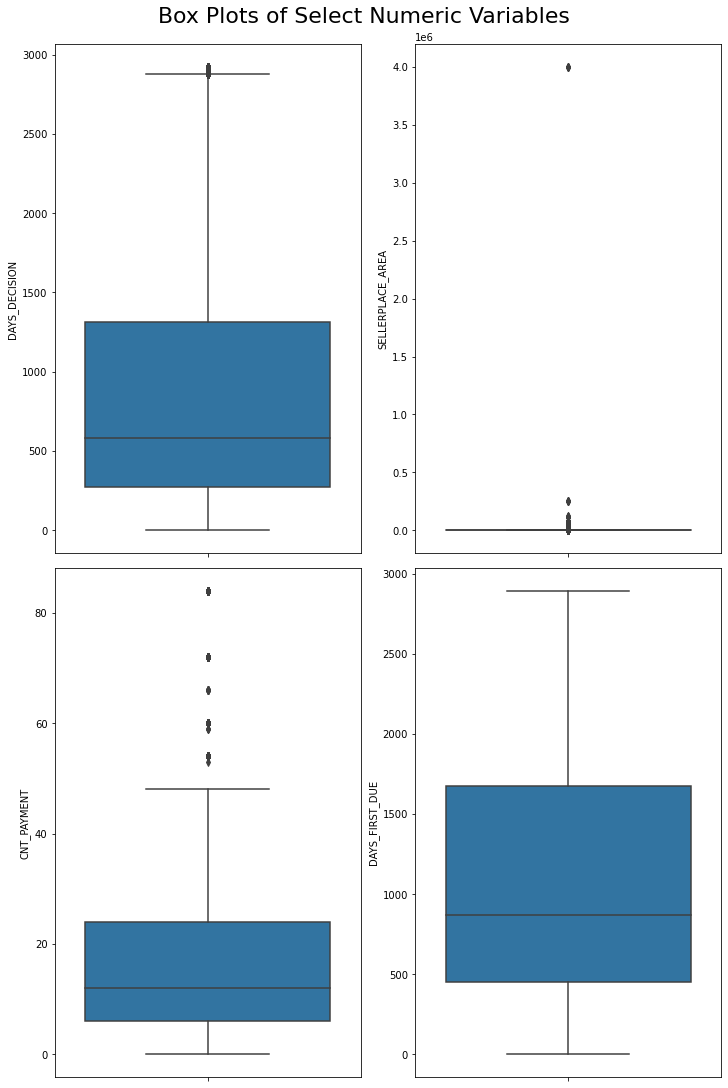

In [81]:
# Plotting box plots for the above numerical variables
fig, axs = plt.subplots(2,2,figsize=[10,15],constrained_layout=True)
for i in range(len(num_vars)):
    sns.boxplot(y=df3[num_vars[i]],ax=axs[i//2,i%2])
fig.suptitle('Box Plots of Select Numeric Variables',fontsize=22)
fig.show()

__Insights__

As seen above, some of the variables have outliers, which are elaborated below:
1. DAYS_DECISION has its upper whisker around 2900, but some higher values uptil 3000, which are outliers.
2. SELLERPLACE_AREA has most values near 0, but a few outliers reaching up to 4.
3. CNT_PAYMENT has its upper whisker around 50, but outliers up to 95. This indicates that some loans had very high terms.

The outliers can be addressed in the following ways:
1. Removal
2. Retention
3. Imputation (capping with a maximum or imputing with another value)

Outliers are retained without changes in this analysis because the values are plausible.

#### 4.4.2 Segmentation of the dataset

In [82]:
# Segmenting dataset df3 into two datasets, one for each value of TARGET
target1 = df3[df3['TARGET']==1]
target0 = df3[df3['TARGET']==0]

In [83]:
# Verifying the segments
print(target1['TARGET'].value_counts())
print(target0['TARGET'].value_counts())

1    122360
Name: TARGET, dtype: int64
0    1291286
Name: TARGET, dtype: int64


#### 4.4.3 Univariate Analysis of Select Categorical Variables

In [84]:
# Listing categorical variables that can have an impact on TARGET by inspection
cat_vars = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION']

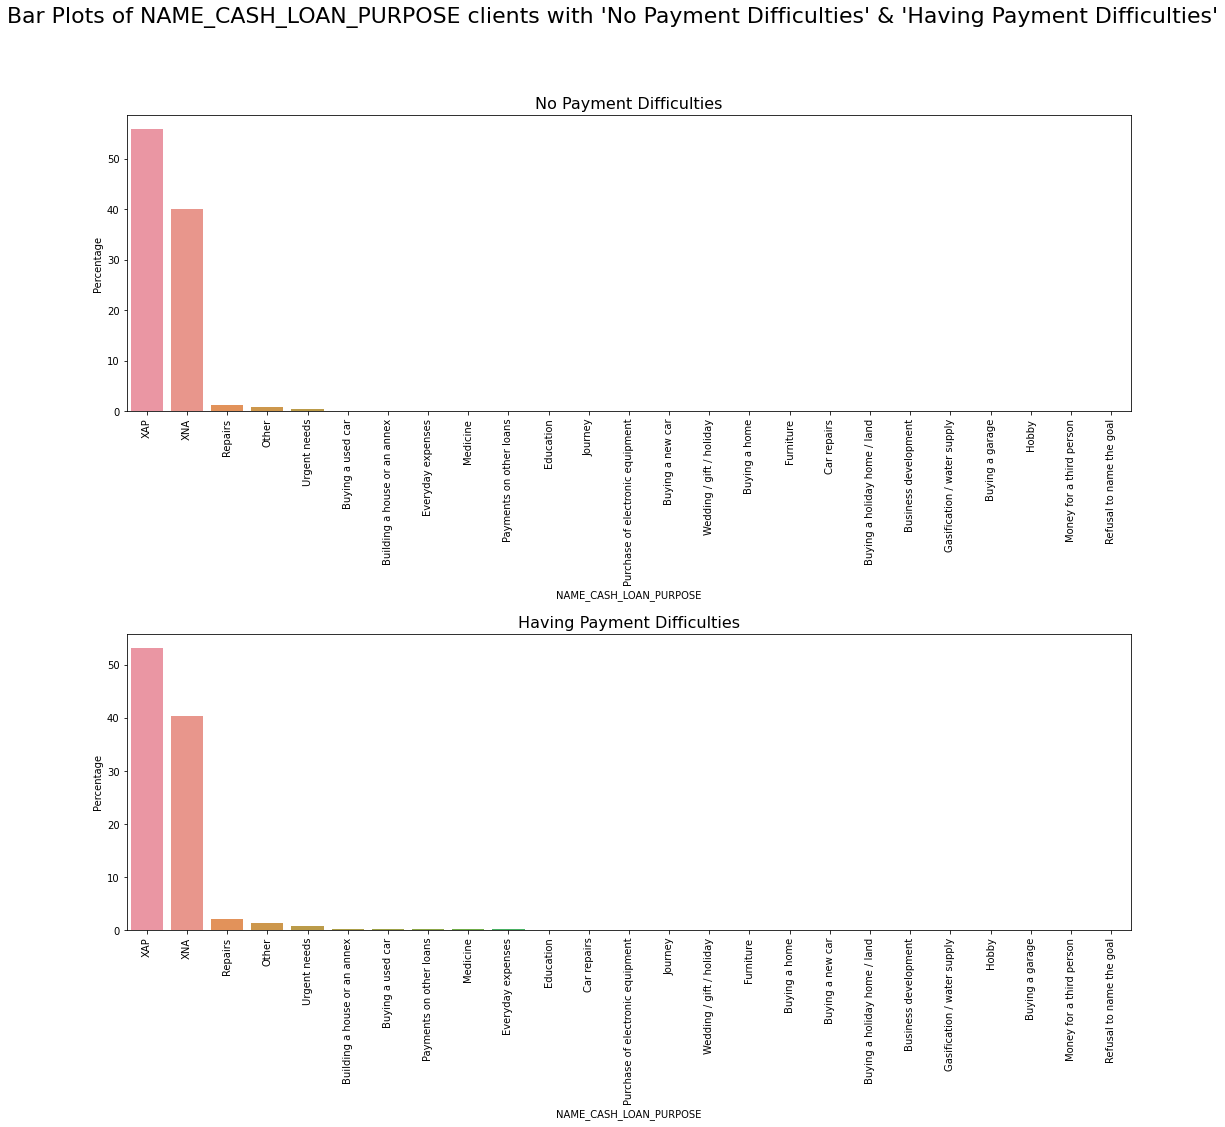

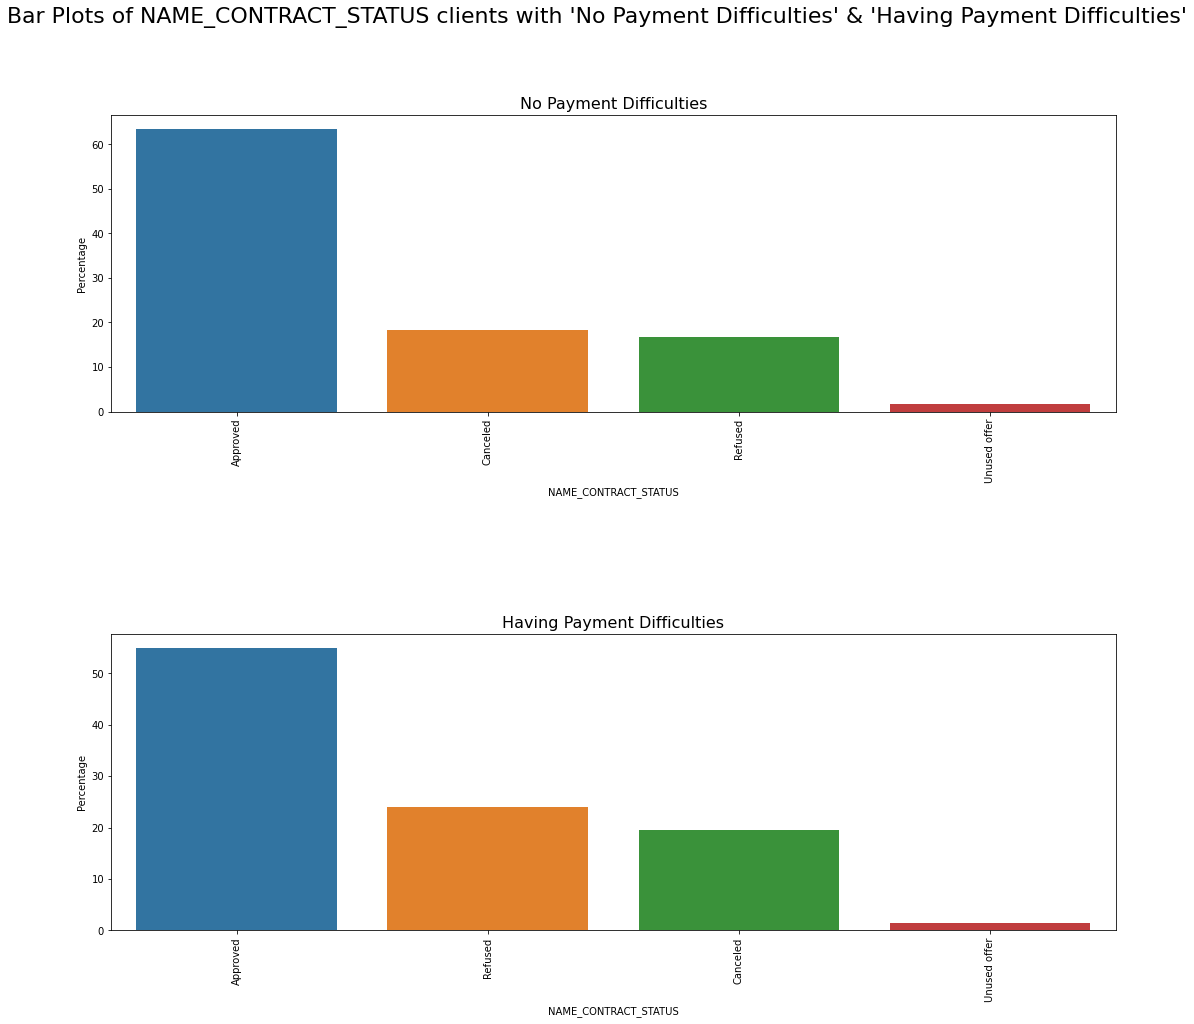

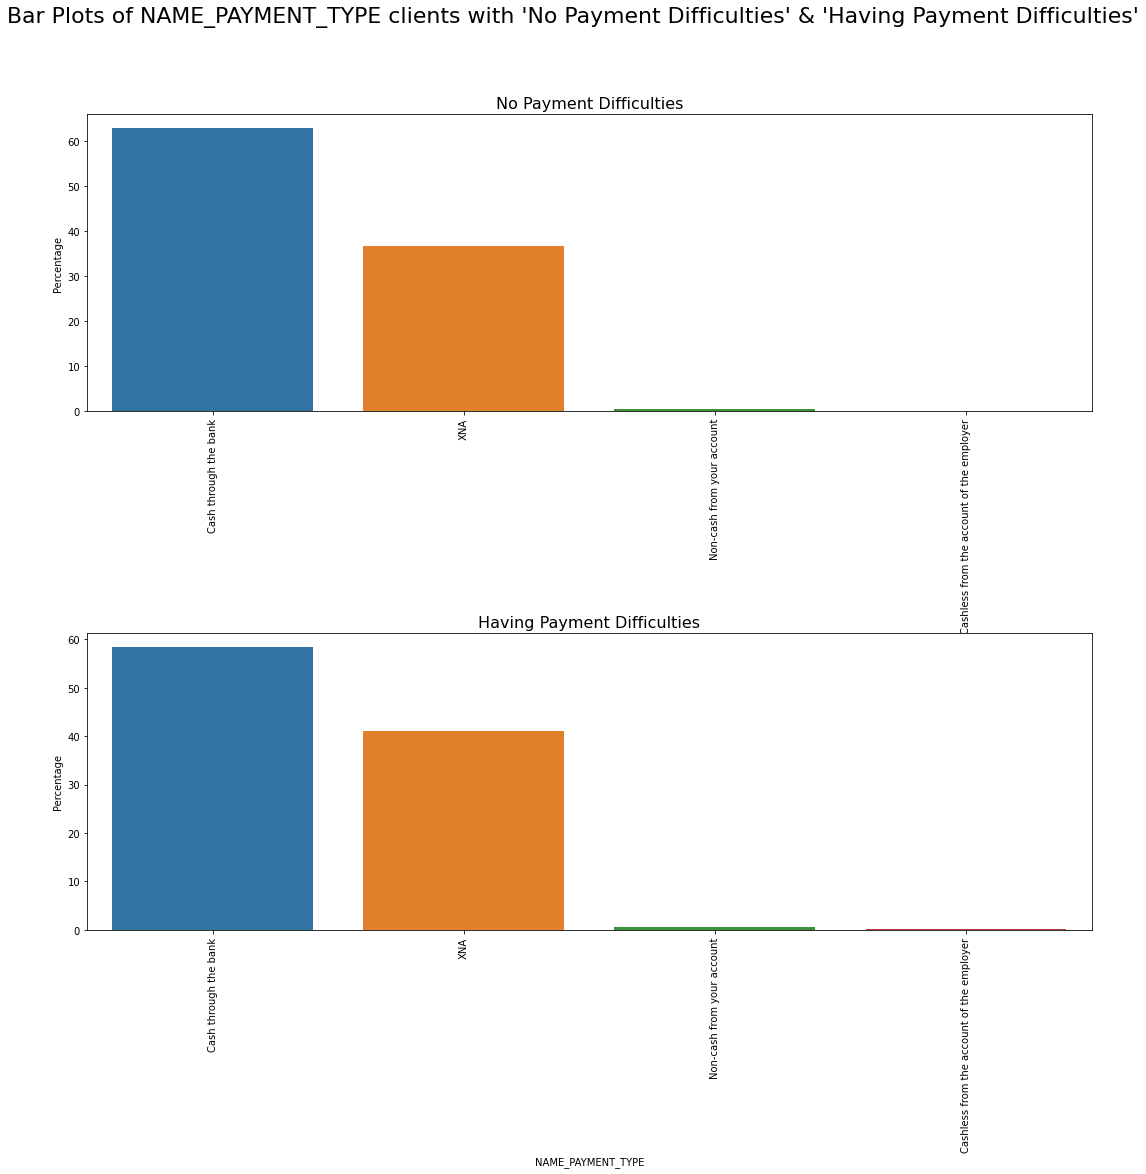

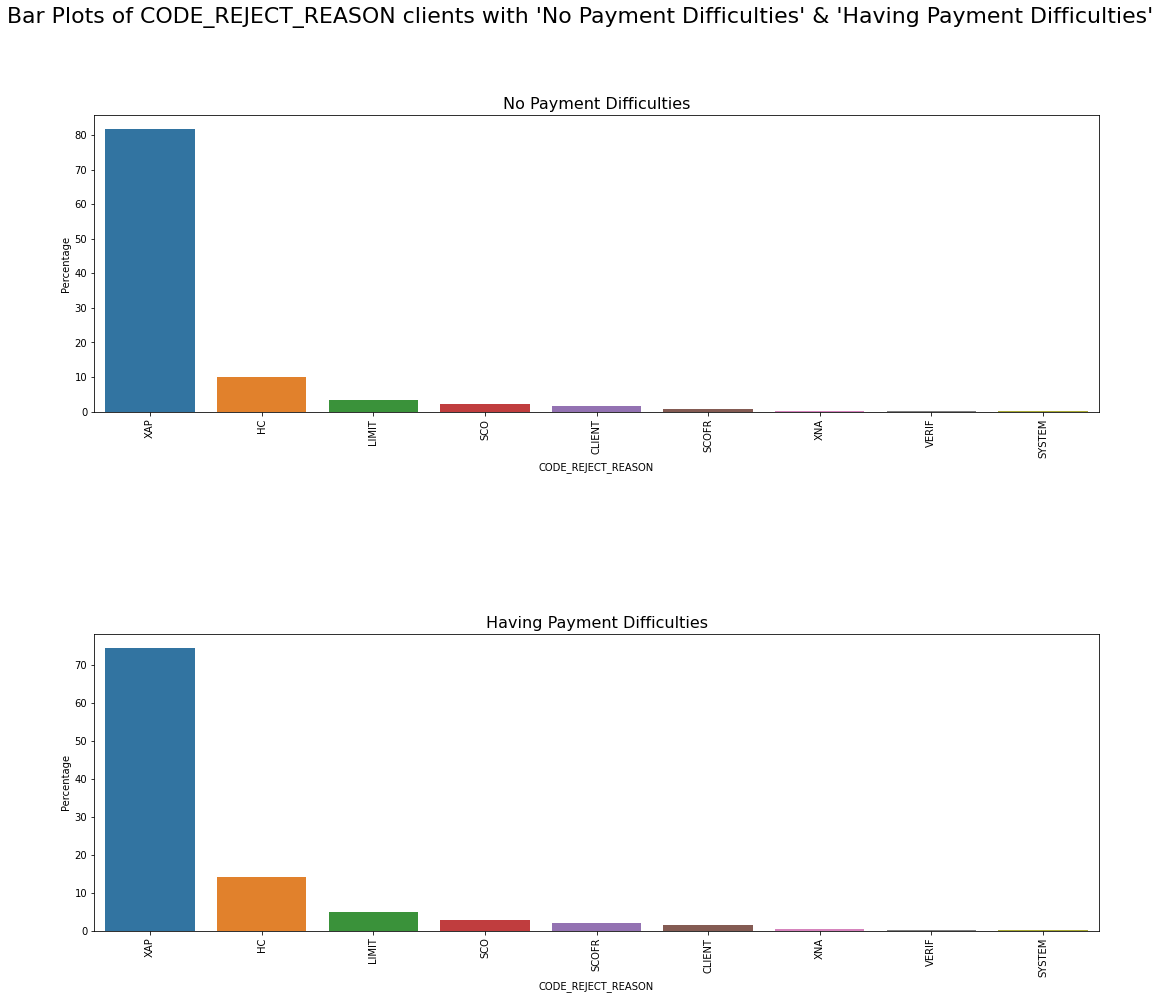

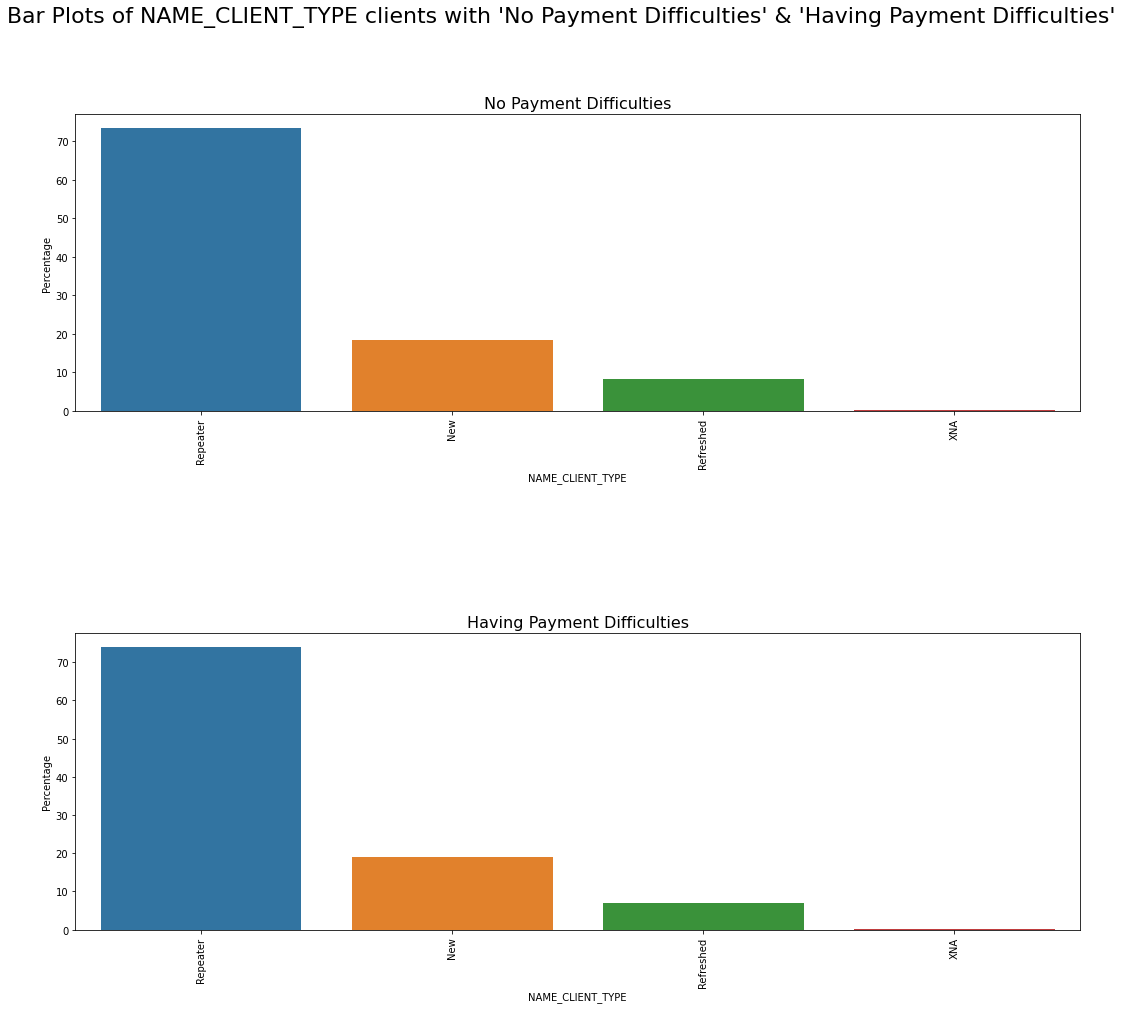

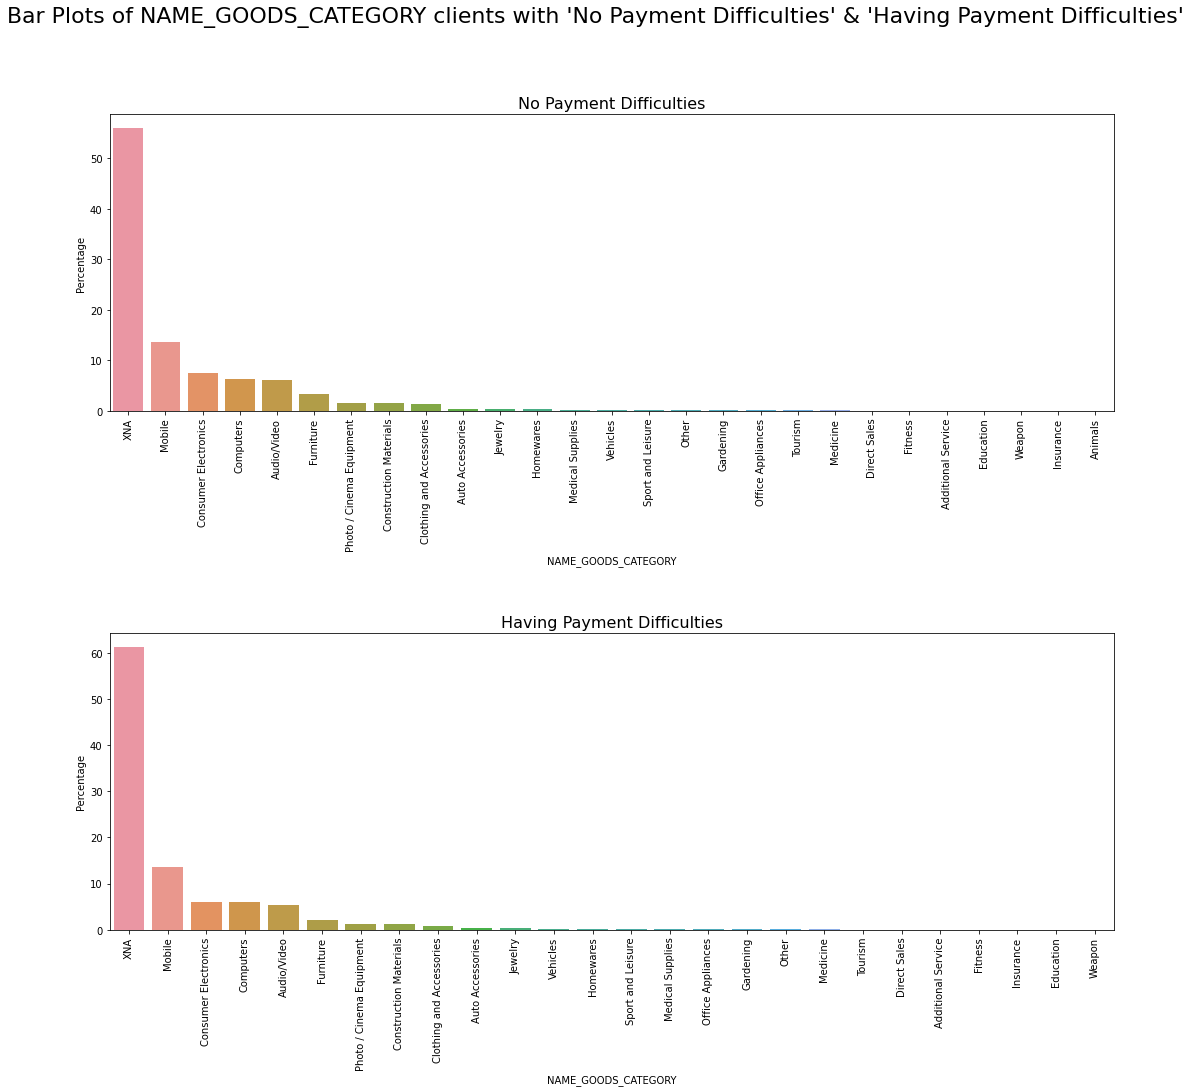

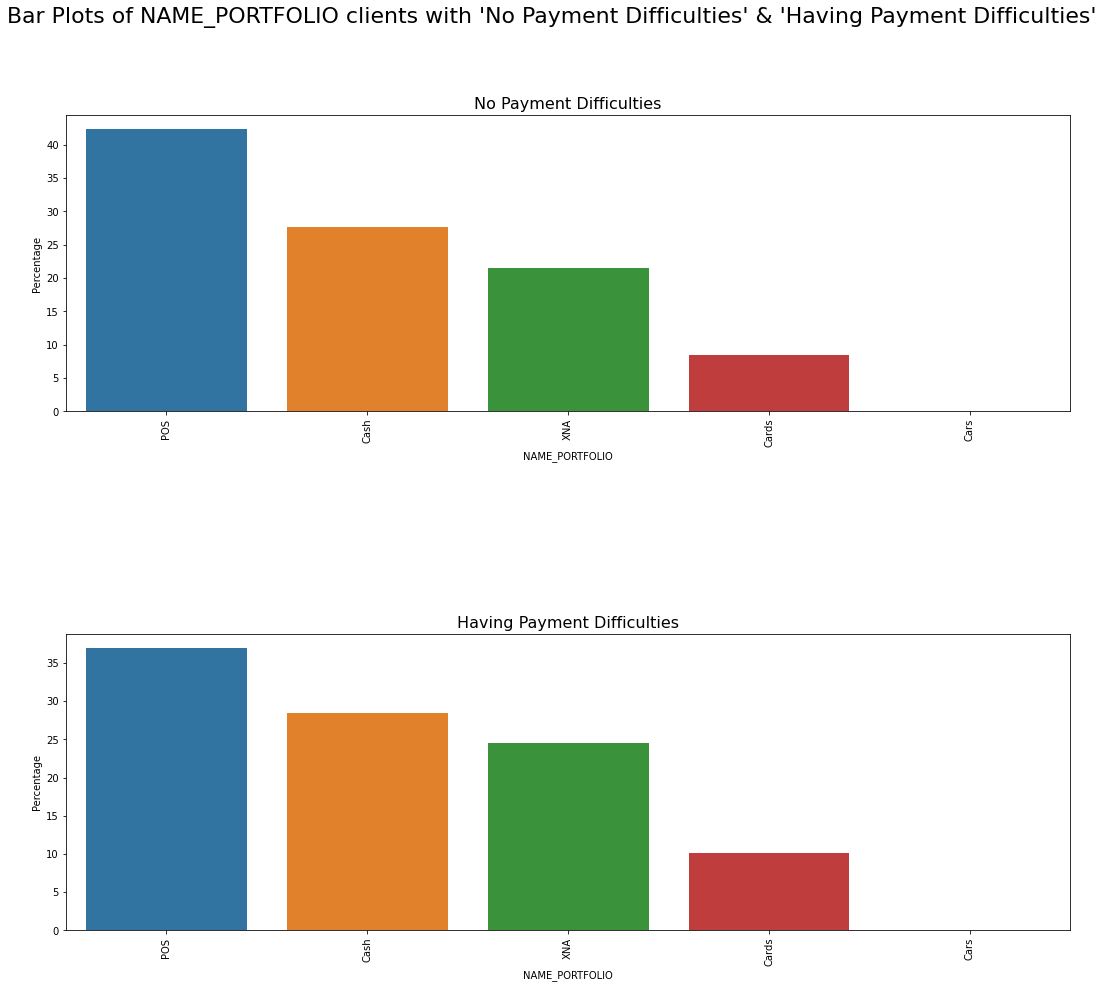

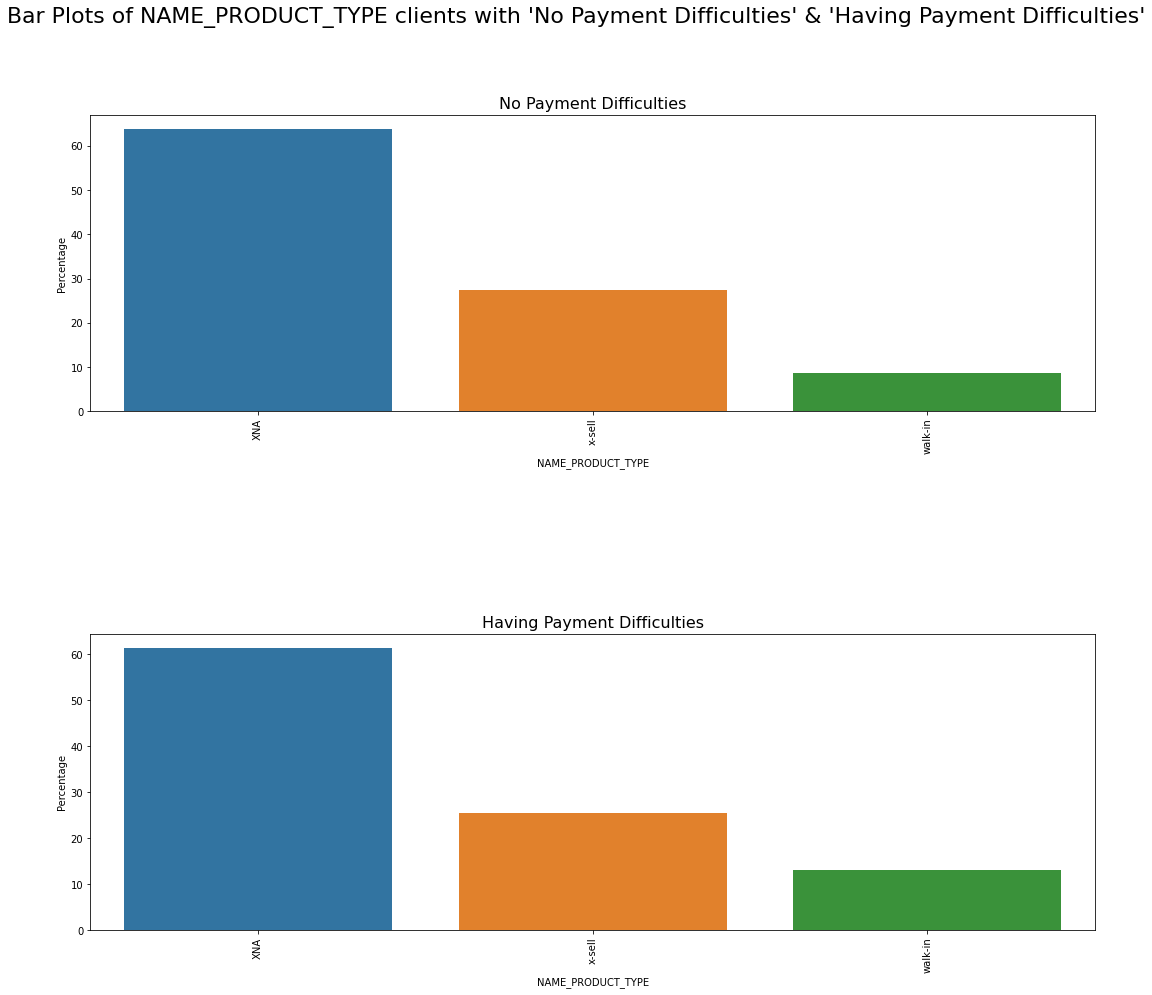

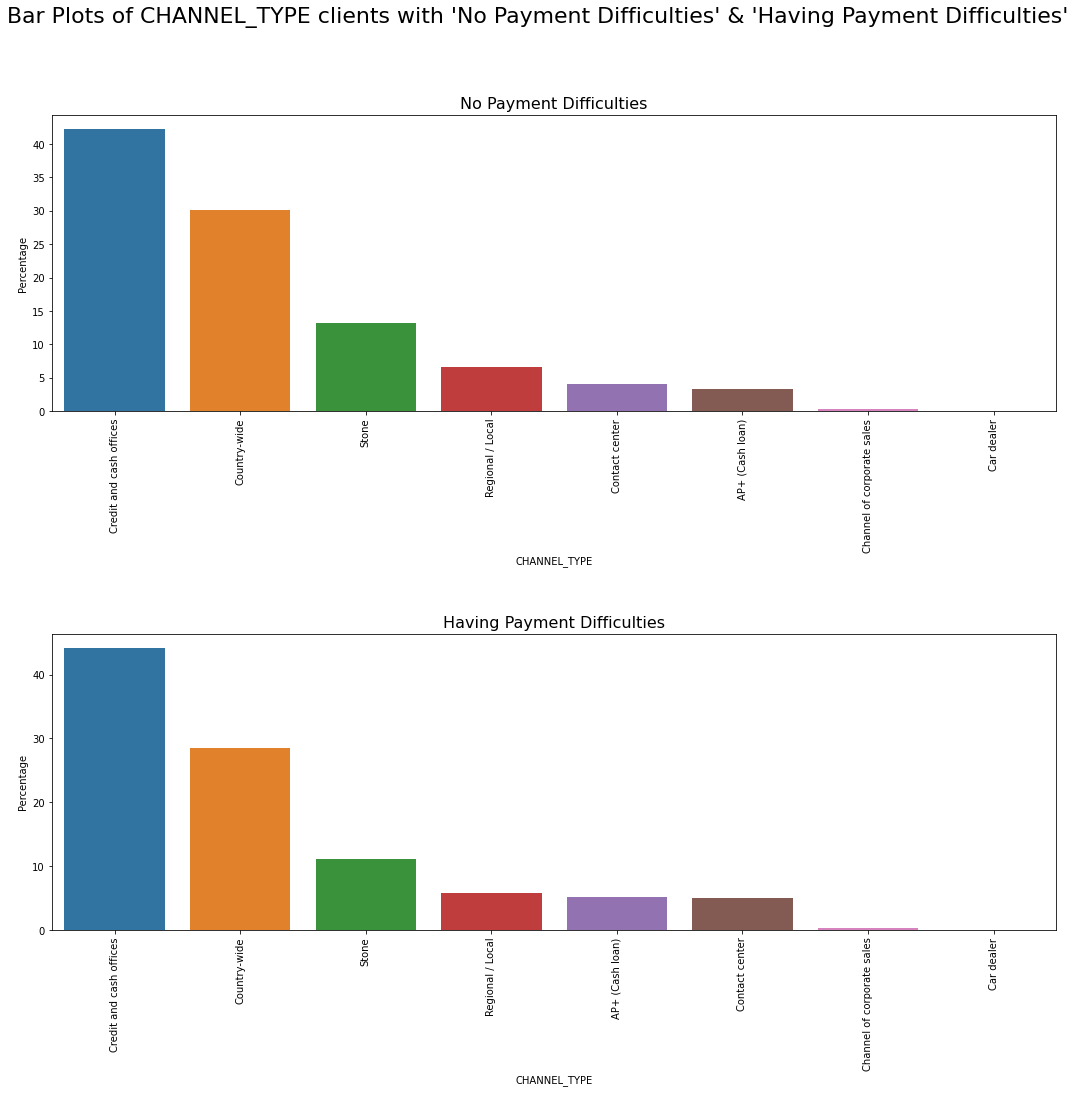

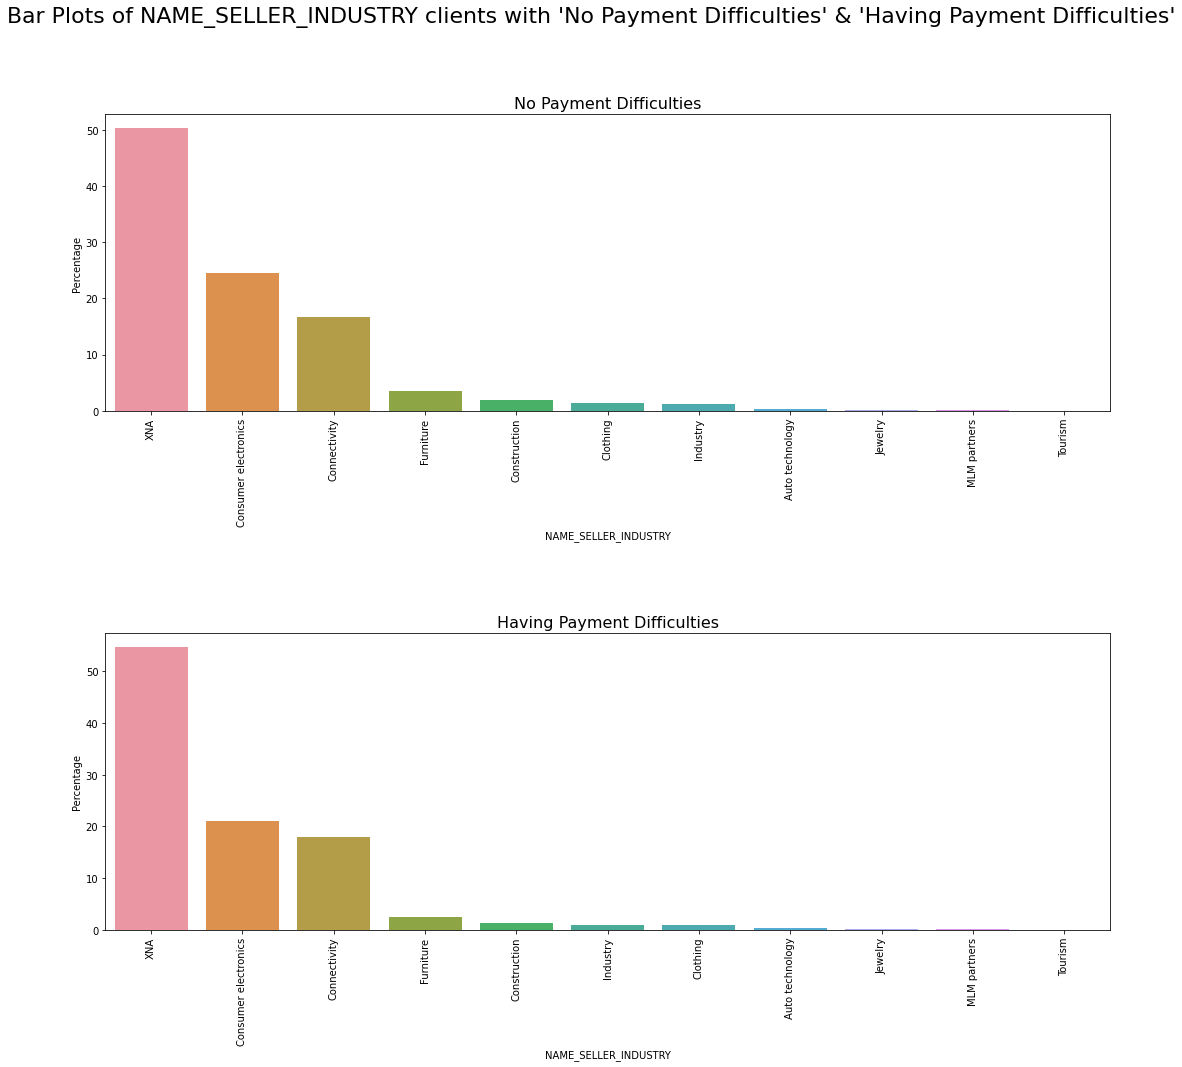

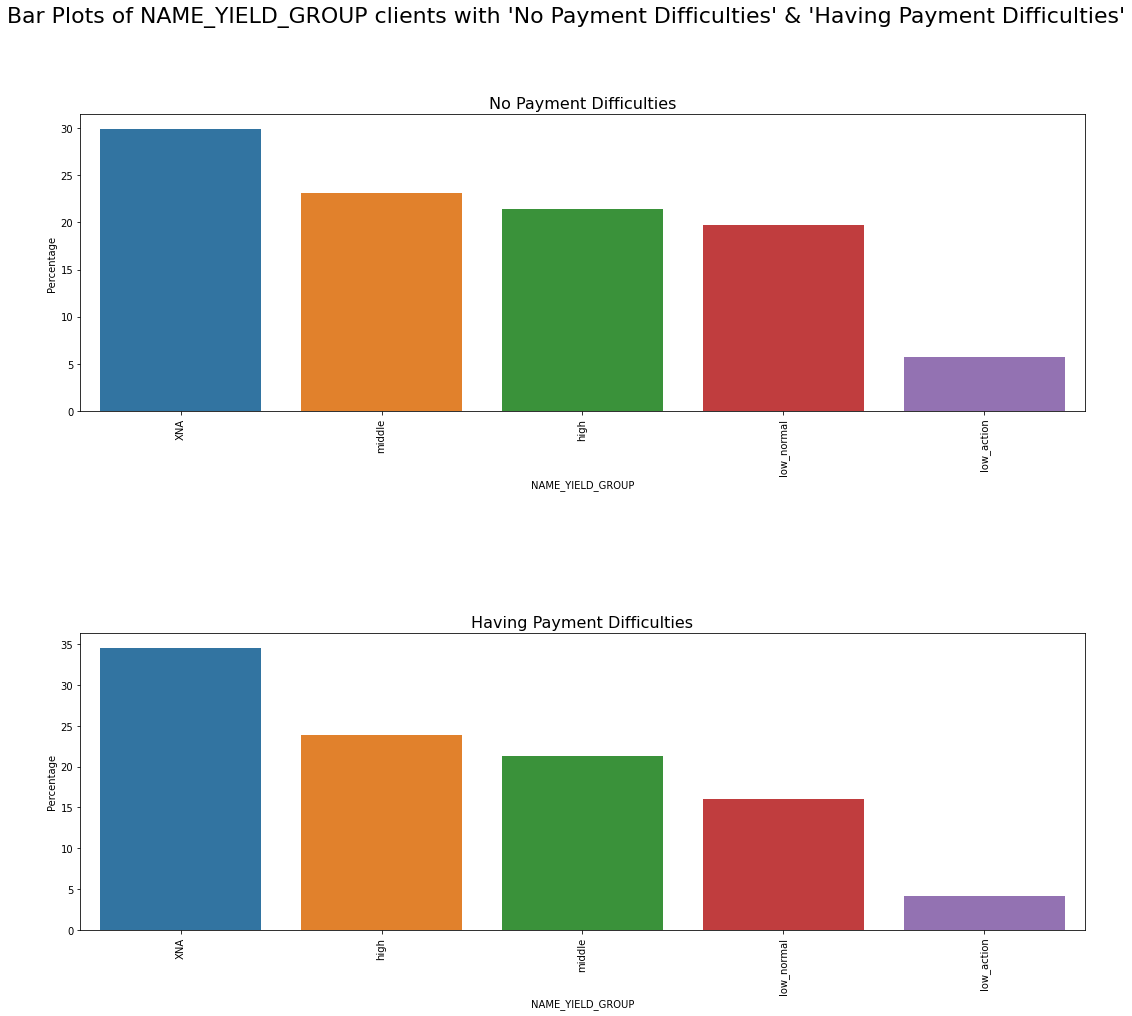

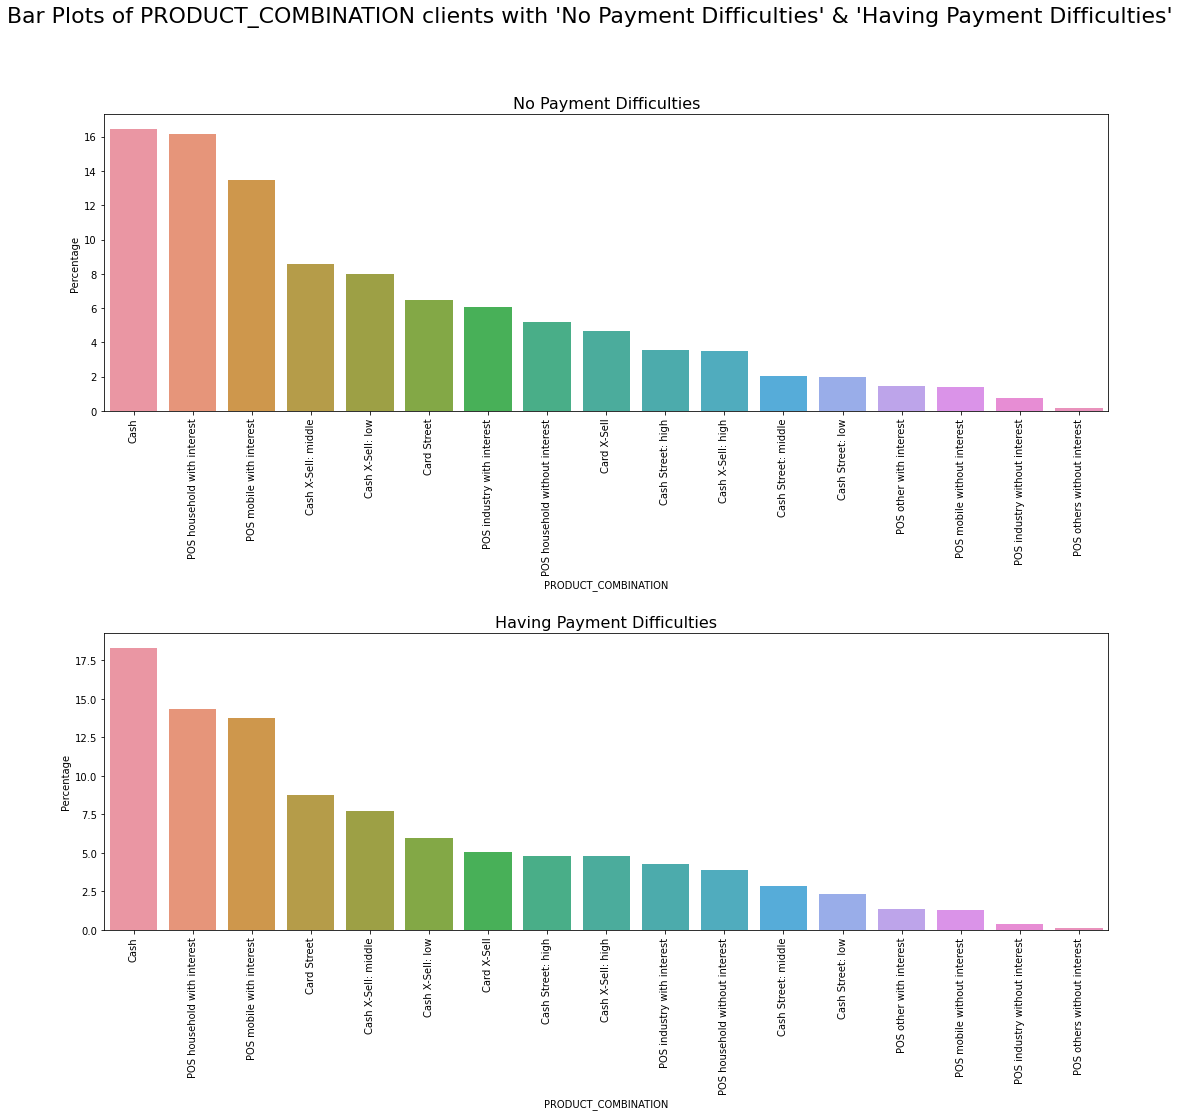

In [85]:
# Creating bar charts for the above categorical variables
for x in cat_vars:    
    fig,axs = plt.subplots(2,1,figsize=[18,15],constrained_layout=True)
    fig.suptitle('Bar Plots of '+x+' clients with \'No Payment Difficulties\' & \'Having Payment Difficulties\'',fontsize=22)
    
    t0 = target0[x].value_counts(normalize=True)*100
    sns.barplot(t0.index,t0.values,ax=axs[0])
    axs[0].set_xlabel(x)
    axs[0].set_ylabel('Percentage')
    axs[0].set_title('No Payment Difficulties',fontsize=16)
    axs[0].set_xticklabels(t0.index,rotation=90.0)

    t1 = target1[x].value_counts(normalize=True)*100
    sns.barplot(t1.index,t1.values,ax=axs[1])
    axs[1].set_xlabel(x)
    axs[1].set_ylabel('Percentage')
    axs[1].set_title('Having Payment Difficulties',fontsize=16)
    axs[1].set_xticklabels(t1.index,rotation=90.0)
    
    fig.subplots_adjust(hspace=0.75)
    fig.show()

__Insights__

1. For the variable NAME_CASH_LOAN_PURPOSE, the percentage of XAP and XNA are slightly higher for the category 'No Payment Difficulties', compared to the category 'No Payment Difficulties'.
2. For the variable NAME_CONTRACT_STATUS, the percentage of 'Approved' is higher and that of 'Refused' is lower for the category 'No Payment Difficulties', compared to the category 'Having Payment Difficulties'.
3. For the variable NAME_PAYMENT_TYPE, the percentage of 'Cash through the bank' is higher for the category 'No Payment Difficulties', compared to the ctaegory 'Having Payment Difficulties'.
4. For the variable CODE_REJECT_REASON, XAP is higher and HC is lower for the category 'No Payment Difficulties' compared to the category 'Having Payment Difficulties'.
5. For the variable NAME_CLIENT_TYPE, 'New' and XNA have higher percentages for the category 'Having Payment Difficulties', compared to the category 'No Payment Difficulties'.
6. For the variable NAME_GOODS_CATEGORY, 'Insurance', 'Vehicles' and XNA have higher percentages for the category 'Having Payment Difficulties', compared to the category 'No Payment Difficulties'.
7. For the variable NAME_PORTFOLIO, POS has a higher percentage for the category 'No Payment Difficulties', compared to the category 'Having Payment Difficulties'.
8. For the variable NAME_PRODUCT_TYPE, 'walk-in' has a higher percentage for the category 'Having Payment Difficulties', compared to the category 'No Payment Difficulties'.
9. For the variable CHANNEL_TYPE, 'Credit and cash offices' and 'Country wide' have roughly the same percentages for the categories 'No Payment Difficulties' and 'Having Payment Difficulties'.
10. For the variable NAME_SELLER_INDUSTRY, 'Consumer electronics' has a higher percentage for the category 'No Payment Difficulties', compared to the category 'Having Payment Difficulties'.
11. For the variable NAME_YIELD_GROUP, higher yields have higher percentages for the category 'Having Payment Difficulties' compared to the cateegory 'No Payment Difficulties'.
12. For the variable PRODUCT_COMBINATION, 'Cash' has a higher percentage and 'POS household with interest' has a lower percentage for the category 'No Payment Difficulties', compared to the category 'Having Payment Difficulties'.

#### 4.4.4 Univariate Analysis of Select Numeric Variables

In [86]:
# Listing numerical variables that can have an impact on TARGET by inspection
num_vars = ['DAYS_DECISION','SELLERPLACE_AREA','CNT_PAYMENT','DAYS_FIRST_DUE']

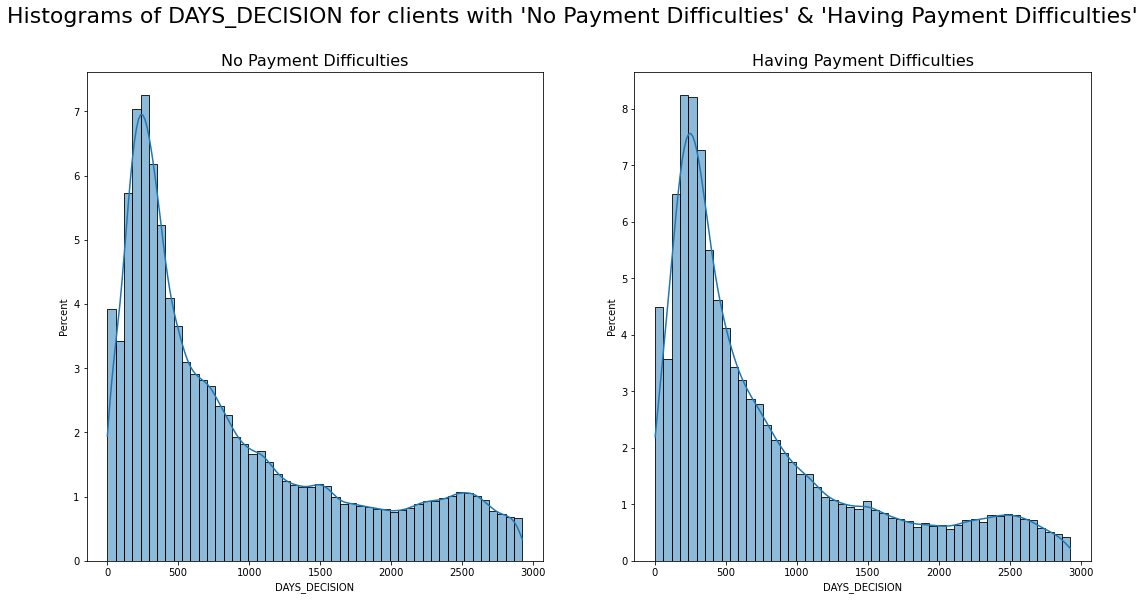

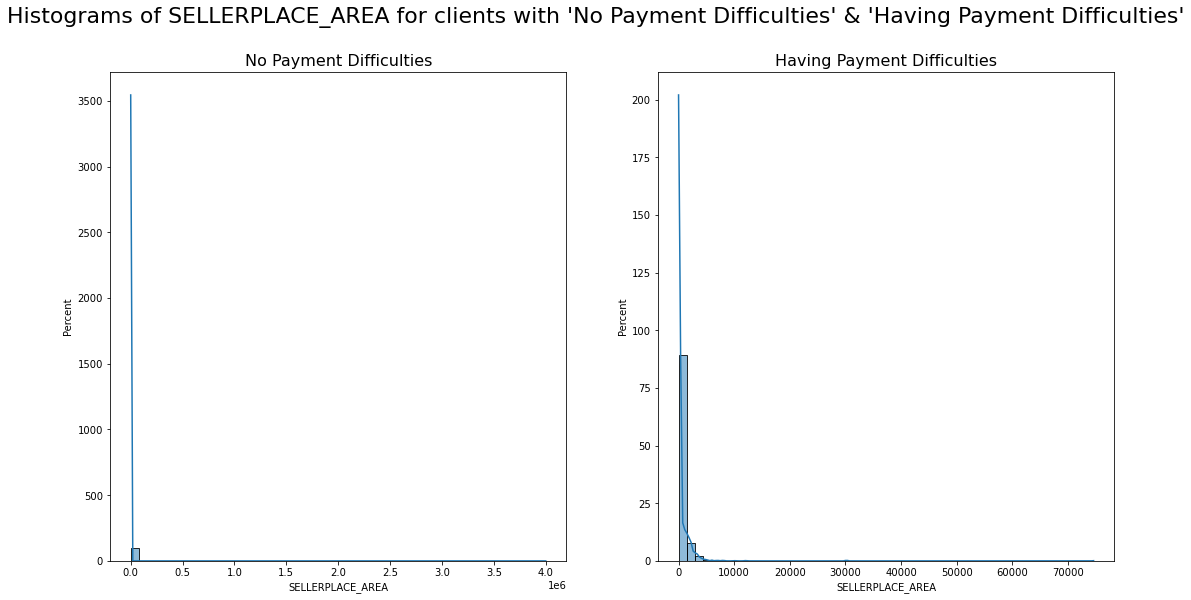

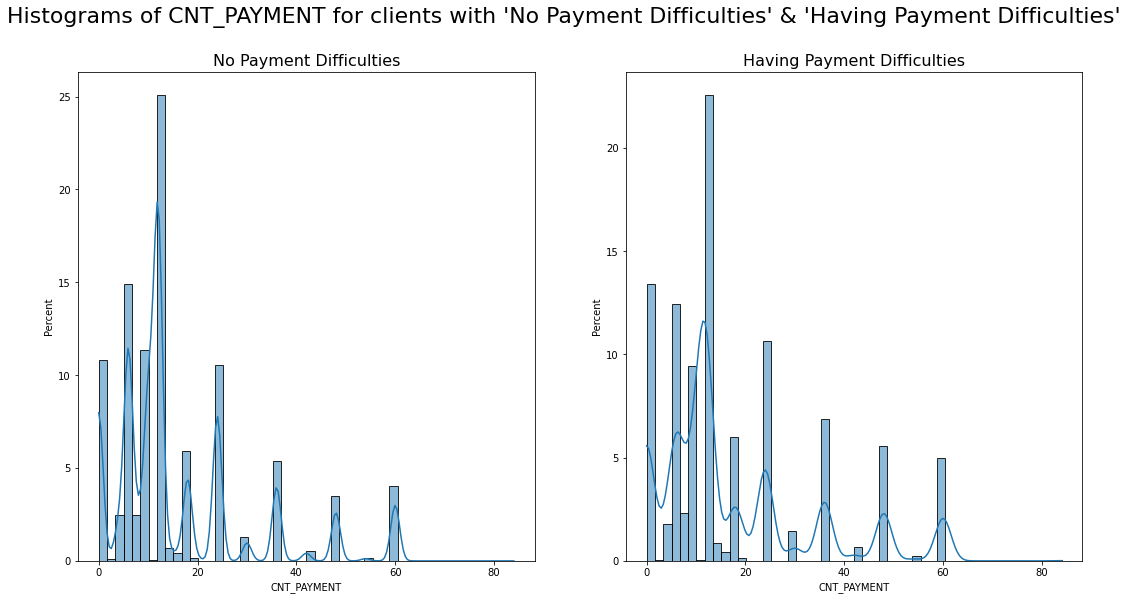

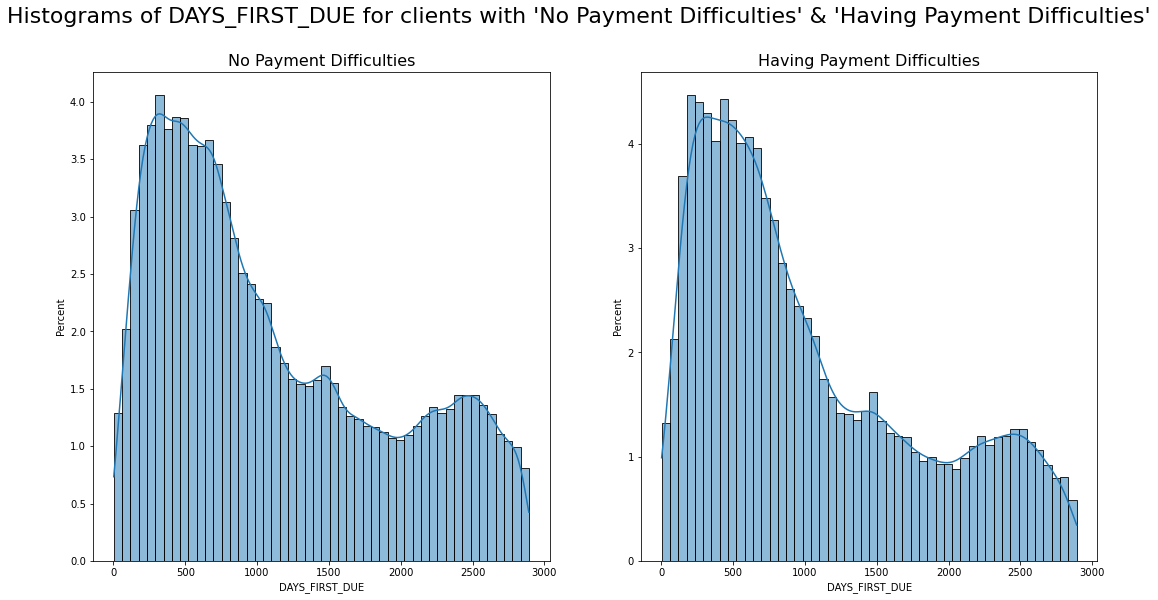

In [87]:
# Creating histograms for the above numeric variables
for x in num_vars:
    fig,axs = plt.subplots(1,2,figsize=[18,9],constrained_layout=True)
    fig.suptitle('Histograms of '+x+' for clients with \'No Payment Difficulties\' & \'Having Payment Difficulties\'',fontsize=22)
    
    sns.histplot(data=target0,x=x,stat='percent',bins=50,ax=axs[0],kde=True)
    axs[0].set_title('No Payment Difficulties',fontsize=16)
    
    sns.histplot(data=target1,x=x,stat='percent',bins=50,ax=axs[1],kde=True)
    axs[1].set_title('Having Payment Difficulties',fontsize=16)
    
    fig.subplots_adjust(hspace=0.35)
    fig.show()

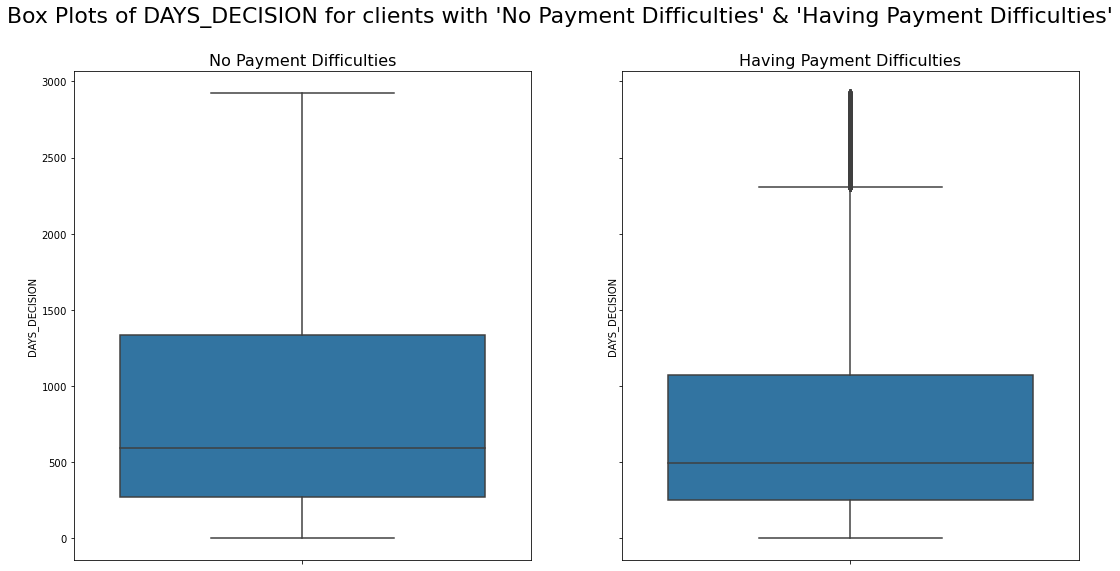

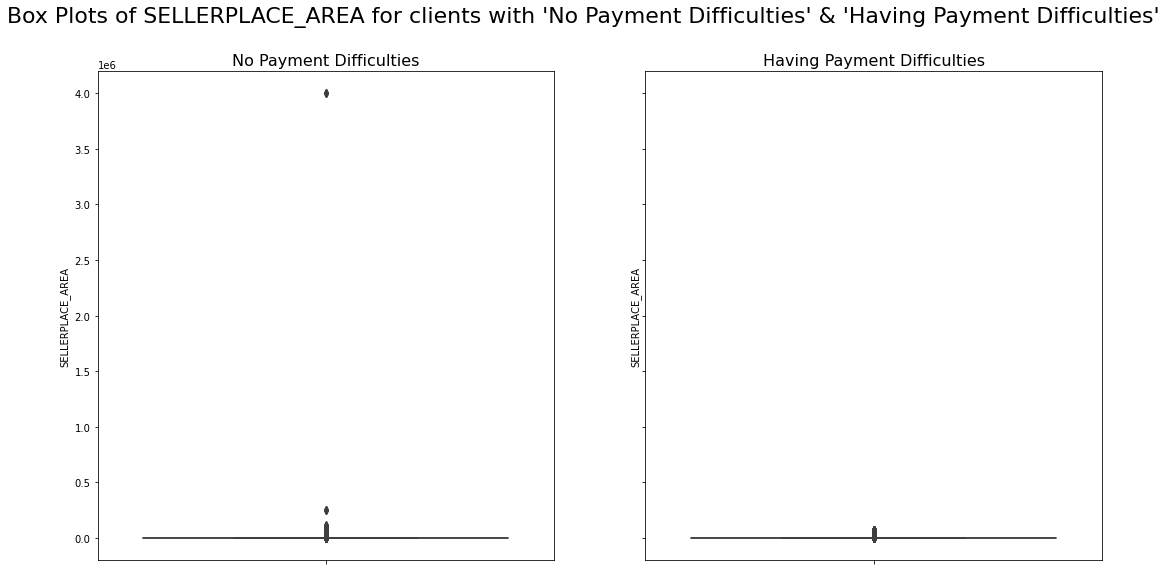

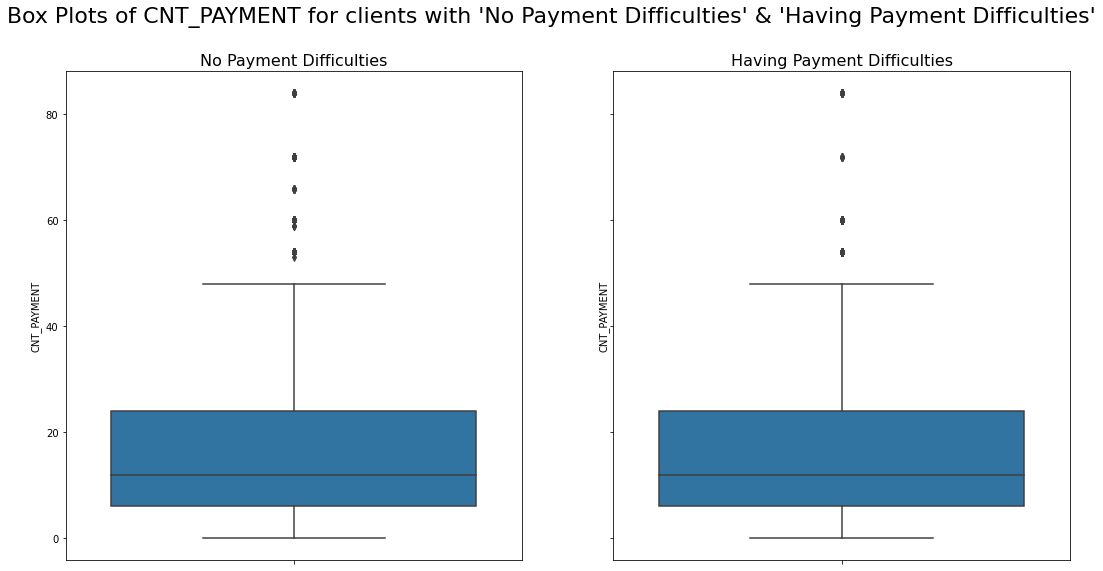

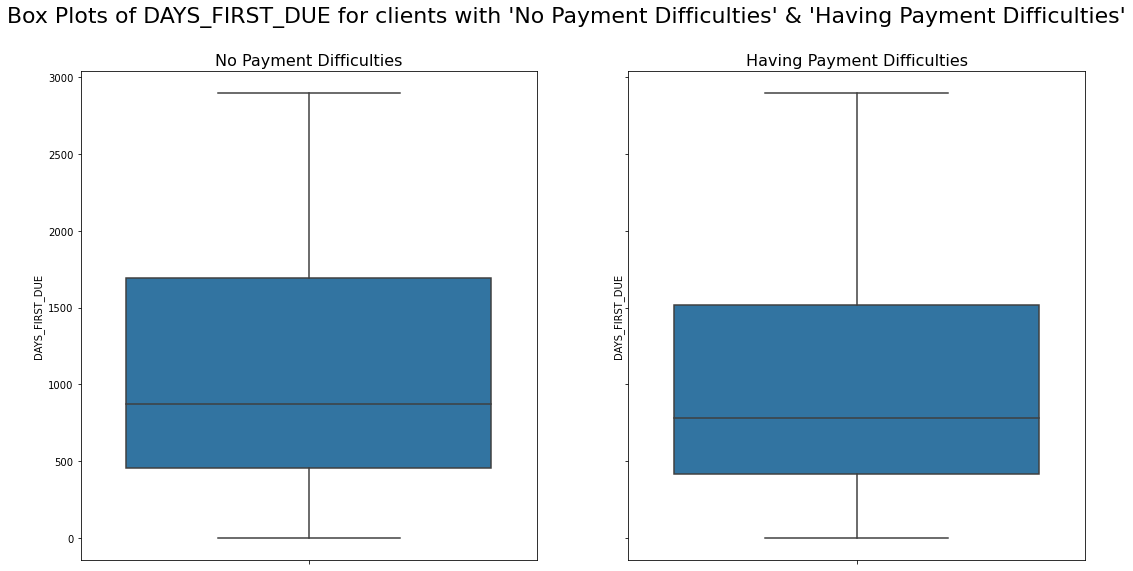

In [88]:
# Creating boxplots for the above numeric variables
for x in num_vars:
    fig,axs = plt.subplots(1,2,figsize=[18,9],constrained_layout=True,sharey=True)
    fig.suptitle('Box Plots of '+x+' for clients with \'No Payment Difficulties\' & \'Having Payment Difficulties\'',fontsize=22)
    
    sns.boxplot(data=target0,y=x,ax=axs[0])
    axs[0].set_title('No Payment Difficulties',fontsize=16)
    
    sns.boxplot(data=target1,y=x,ax=axs[1])
    axs[1].set_title('Having Payment Difficulties',fontsize=16)
    
    fig.subplots_adjust(hspace=0.35)
    fig.show()

__Insights__

1. For the variable DAYS_DECISION, the category 'Having Payment Difficulties' has lower values with a lower median and IQR than the category 'No Payment Difficulties'.
2. The variable SELLERPLACE_AREA has more outliers for the category 'No Payment Difficulties', compared to the category 'Having Payment Difficulties'.
3. For the variable CNT_PAYMENT, the categories 'Having Payment Difficulties' and 'No Payment Difficulties' have similar medians and IQRs.
4. For the variable DAYS_FIRST_DUE, the category 'Having Payment Difficulties' has lower values with a lower median and IQR than the category 'No Payment Difficulties'.

#### 4.4.5 Bivariate & Multivariate Analysis

##### 4.4.5.1 Numeric - Numeric Analysis

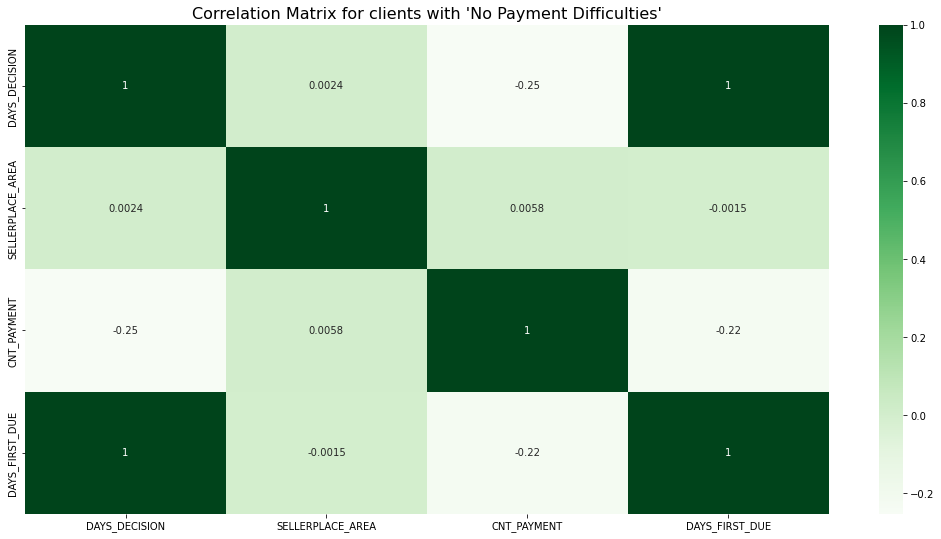

In [89]:
# Creating a correlation matrix for the relevant numeric variables identified above for clients having 'No Payment Difficulties'
corr0 = target0[num_vars].corr()
fig,ax = plt.subplots(figsize=[18,9])
sns.heatmap(corr0,cmap='Greens',annot=True)
ax.set_title('Correlation Matrix for clients with \'No Payment Difficulties\'',fontsize=16)
fig.show()

As seen above, the variable pairs with the highest correlations for clients with 'No Payment Difficulties' are:
1. CNT_PAYMENT & SELLERPLACE_AREA = 0.0058
2. SELLERPLACE_AREA & DAYS_DECISION = 0.0024

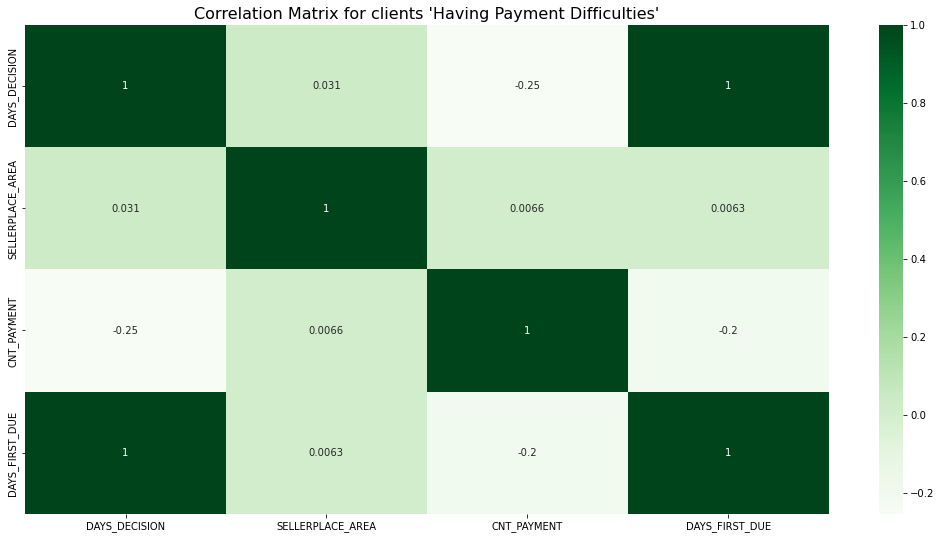

In [90]:
# Creating a correlation matrix for the relevant numeric variables identified above for clients 'Having Payment Difficulties'
corr1 = target1[num_vars].corr()
fig,ax = plt.subplots(figsize=[18,9])
sns.heatmap(corr1,cmap='Greens',annot=True)
ax.set_title('Correlation Matrix for clients \'Having Payment Difficulties\'',fontsize=16)
fig.show()

As seen above, the variable pairs with the highest correlations for clients 'Having Payment Difficulties' are:
1. CNT_PAYMENT & SELLERPLACE_AREA = 0.0066
2. DAYS_FIRST_DUE & SELLERPLACE_AREA = 0.0063

##### 4.4.5.2 Numeric - Categorical Analysis

In [91]:
# Creating a pivot table to compare means of numeric variables for TARGET=0 and TARGET=1
df3.pivot_table(num_vars,'TARGET')

CNT_PAYMENT  DAYS_DECISION  DAYS_FIRST_DUE  SELLERPLACE_AREA
TARGET                                                              
0         15.917984     889.995725     1110.821561        581.995983
1         17.522640     778.801757     1024.235696        482.827728

In [92]:
# Creating a pivot table to compare medians of numeric variables for TARGET=0 and TARGET=1
df3.pivot_table(num_vars,'TARGET',aggfunc='median')

CNT_PAYMENT  DAYS_DECISION  DAYS_FIRST_DUE  SELLERPLACE_AREA
TARGET                                                              
0              12.0            593           876.0              66.0
1              12.0            491           780.0              50.0

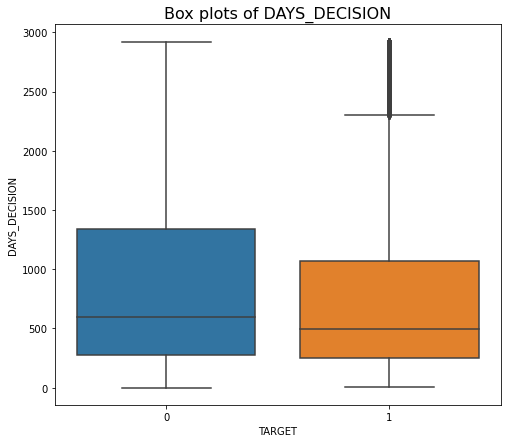

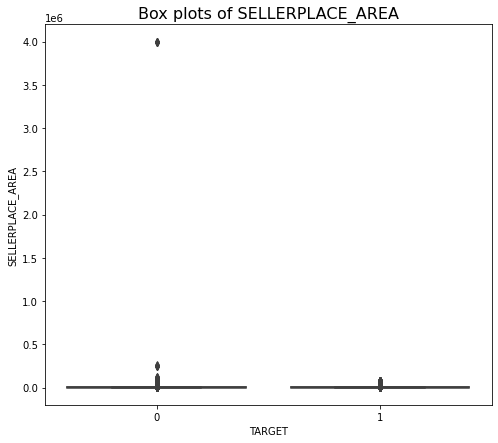

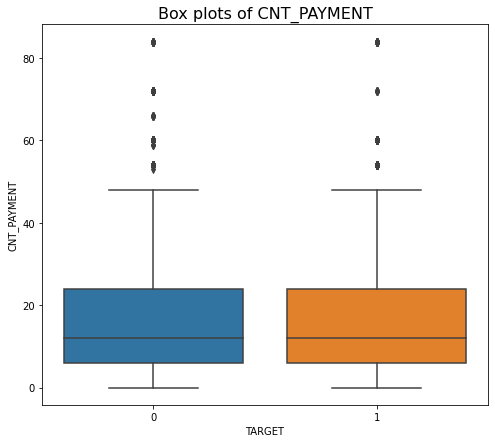

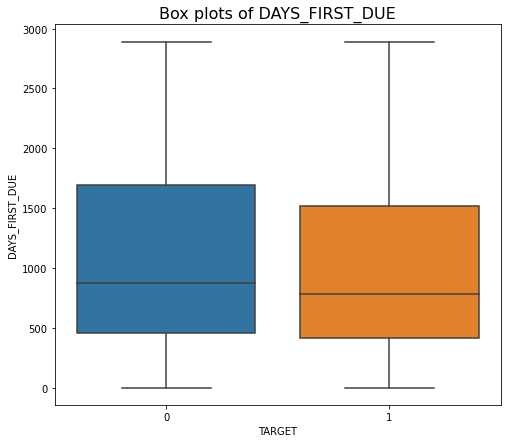

In [93]:
# Creating box plots for numeric-categorical analysis with the categorical variable TARGET
for x in num_vars:
    fig,ax = plt.subplots(figsize=[8,7])
    sns.boxplot(x='TARGET',y=x,data=df3,ax=ax)
    ax.set_title('Box plots of '+x,fontsize=16)
    fig.show()

__Insights__

1. Analysis of DAYS_DECISION indicates that clients having payment difficulties had fewer days between the decision regarding the previous application and the current application. Thus, clients who take multiple loans with fewer days in between are more likely to default.
2. Analysis of SELLERPLACE_AREA & CNT_PAYMENT yield no significant insights regarding likelihood of default.
3. Analysis of DAYS_FIRST_DUE indicates that clients having payment difficulties had fewer days between the first due date of the previous loan and the current application.

##### 4.4.5.3 Categorical - Categorical Analysis

Categorical - categorical analysis is done by calculating rates of default for relevant categorical variables

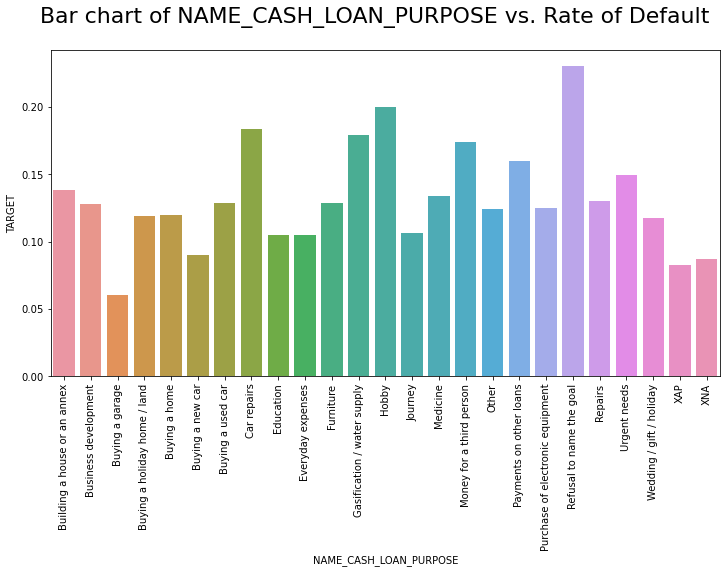

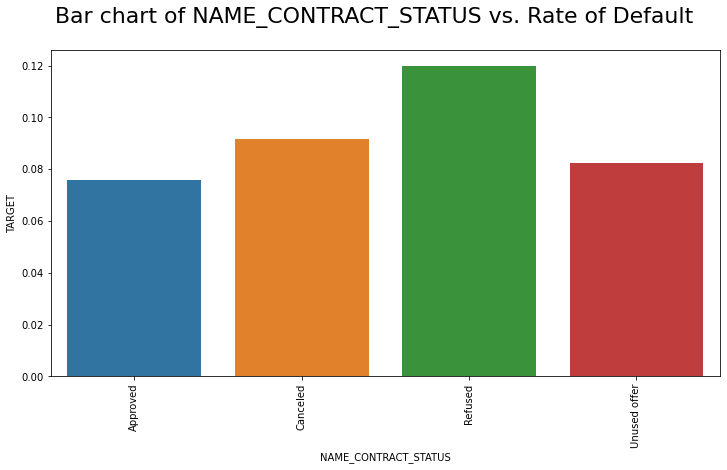

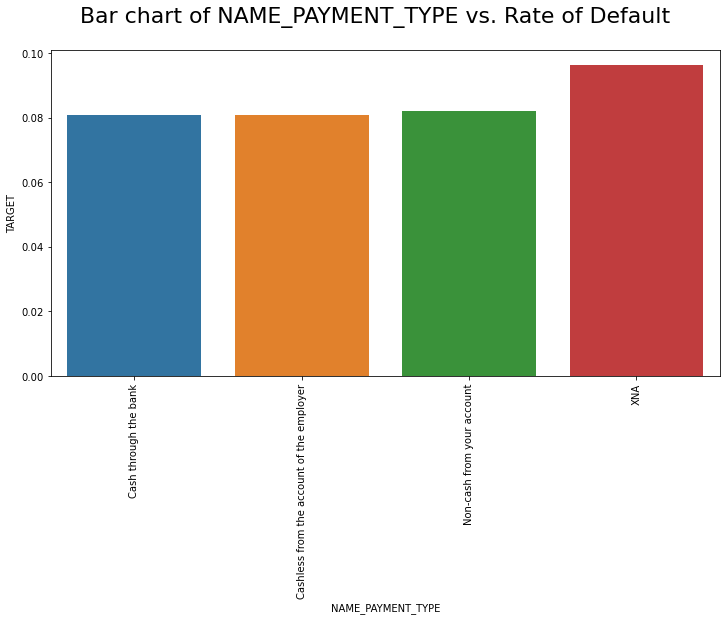

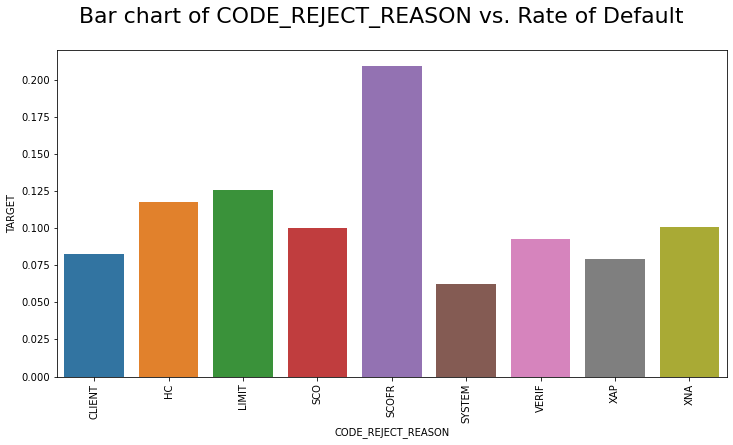

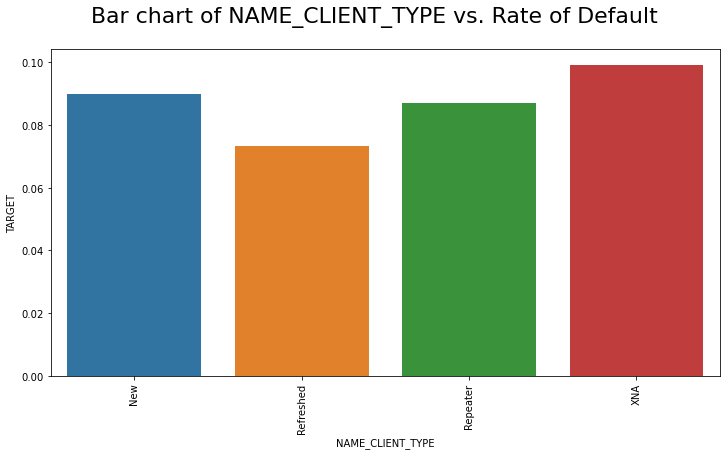

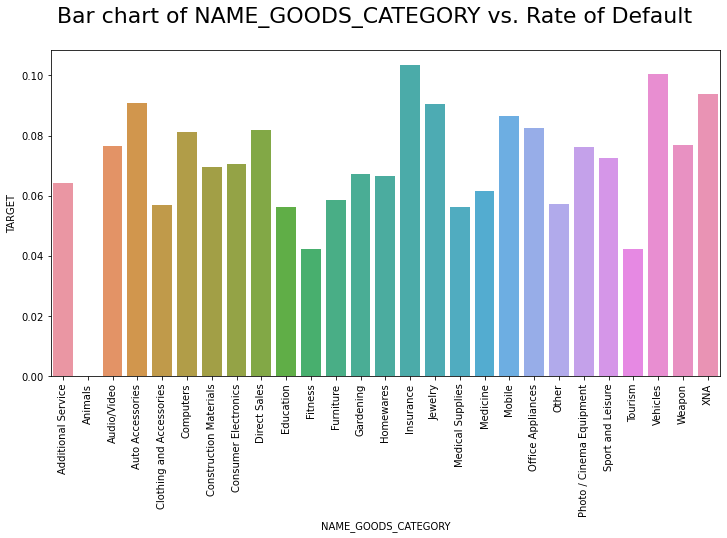

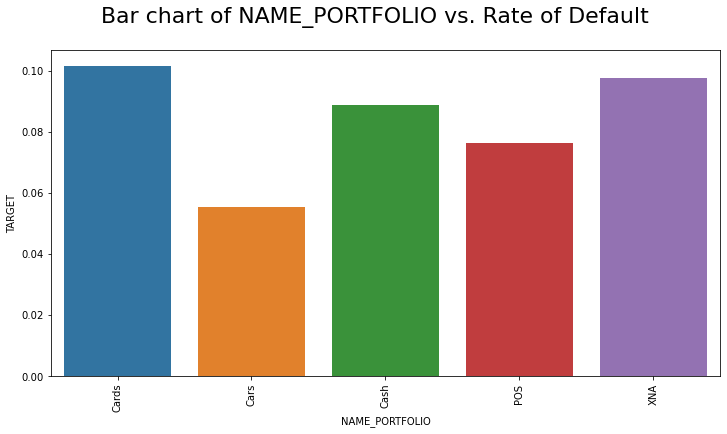

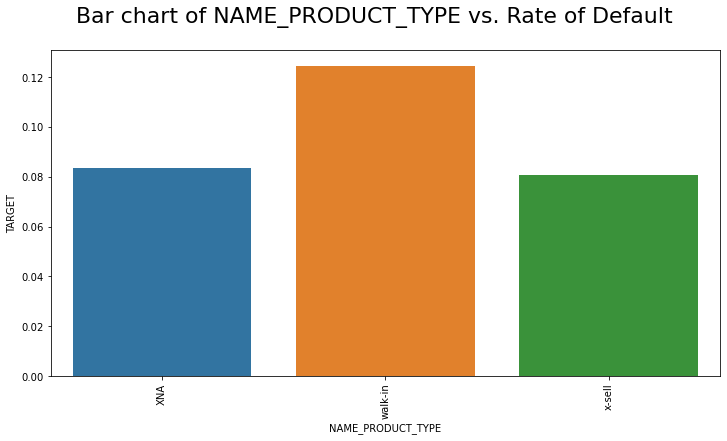

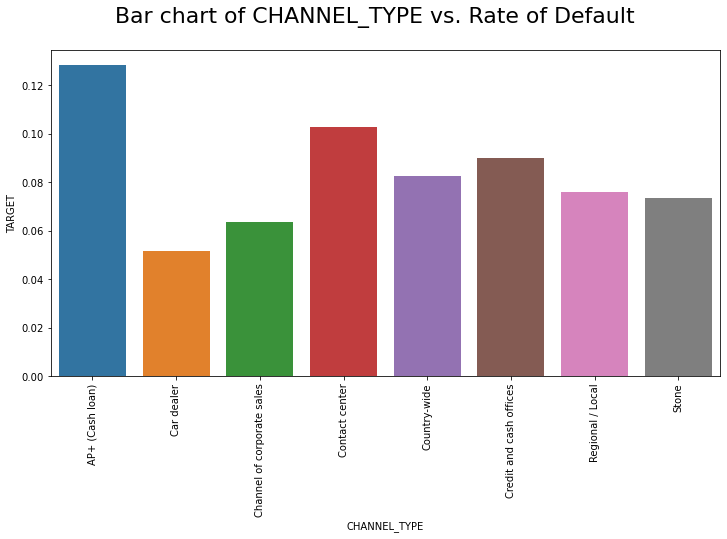

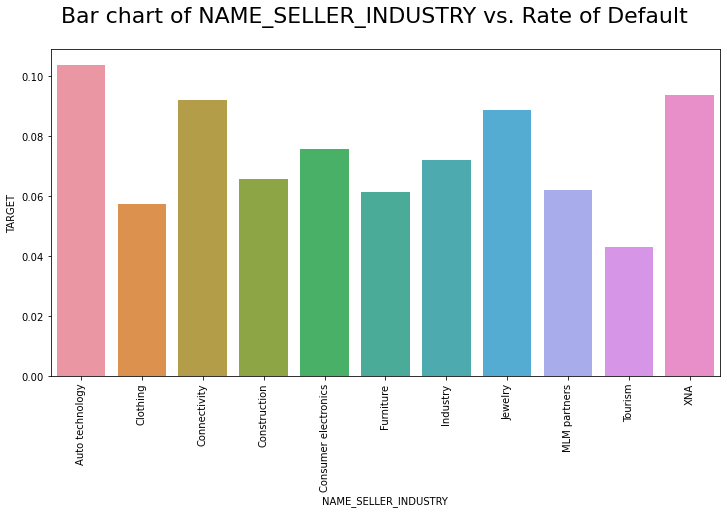

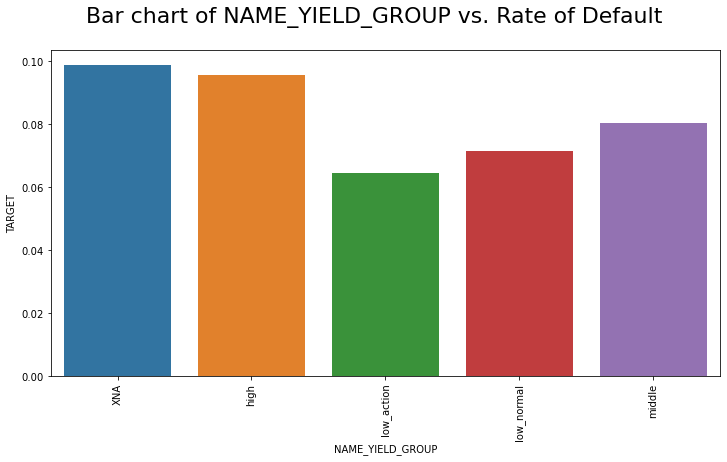

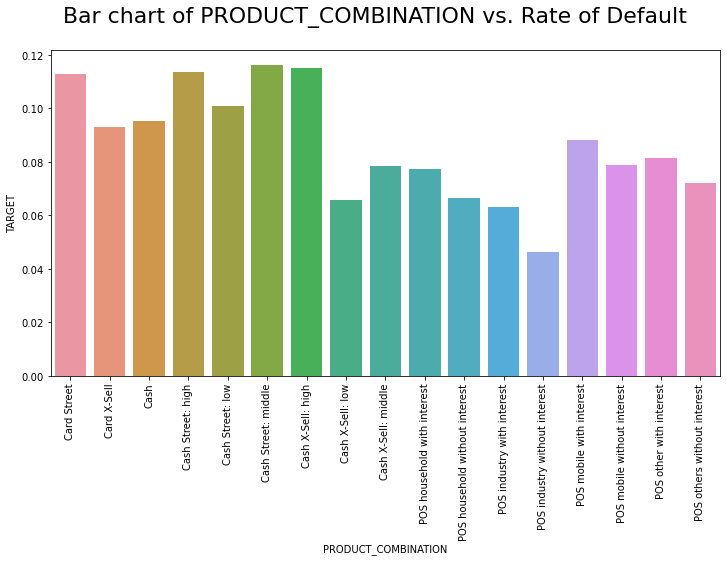

In [94]:
for x in cat_vars:
    fig,ax = plt.subplots(figsize=[12,6])
    fig.suptitle('Bar chart of '+x+' vs. Rate of Default',fontsize=22)
    
    pvt = df3.pivot_table(values='TARGET',index=x)
    sns.barplot(pvt.index,pvt['TARGET'])
    ax.set_xticklabels(pvt.index,rotation=90.0)
    
    fig.show()

__Insights__

1. For the variable NAME_CASH_LOAN_PURPOSE, 'Refusal to name the goal', 'Car repairs' & 'Hobby' have the highest default rates while 'Buying a garage' and XAP have the lowest default rates.
2. For the variable NAME_CONTRACT_STATUS, 'Refused' and 'Canceled' have higher default rates while 'Approved' has the lowest default rate. Thus, clients whose previous loan applications were refused or cancelled are at higher risk of default.
3. For the variable NAME_PAYMENT_TYPE, XNA has the highest rate of default.
4. For the variable CODE_REJECT_REASON, SCOFR and LIMIT have the highest rates of default while SYSTEM has the lowest rate of default.
5. For the variable NAME_CLIENT_TYPE, 'New' and XNA have the highest rates of default and 'Refreshed' and 'Repeater' have lower rates of default. Thus, the latter are ideal clients to make loans to.
6. For the variable NAME_GOODS_CATEGORY,  'Insurance', 'Vehicles' and XNA have the highest rates of default.
7. For the variable NAME_PORTFOLIO, 'Cards' and XNA have the highest rates of default while 'Cars' has the lowest rate of default.
8. For the variable NAME_PRODUCT_TYPE, 'walk-in' has the highest rate of default whereas the others types have lower rates.
9. For the variable CHANNEL_TYPE, 'AP+ (Cash loan)' and 'Contact center' have the highest rates of default.
10. For the variable NAME_SELLER_INDUSTRY, 'Auto technology' and 'Connectivity' have the highest rates of default while 'Clothing' and 'Tourism' have the lowest rates of default.
11. For the variable NAME_YIELD_GROUP, higher yields have higher default rates while lower yields have lower default rates.
12. For the variable PRODUCT_COMBINATION, 'Cash Street:high', 'Cash Street:middle' and 'Cash X-Sell:high' have the highest rates of default.